In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns

In [2]:
df_raw = pd.read_csv('kredit.csv')

In [3]:
df = df_raw.copy(deep=True)

## Bereinigung der Daten

In [4]:
# Prüfen, ob die Tabelle einen Nullwert enthält

df.isnull().sum()

kredit      0
laufkont    0
laufzeit    0
moral       0
verw        0
hoehe       0
sparkont    0
beszeit     0
rate        0
famges      0
buerge      0
wohnzeit    0
verm        0
alter       0
weitkred    0
wohn        0
bishkred    0
beruf       0
pers        0
telef       0
gastarb     0
dtype: int64

In [5]:
# Prüfen, ob duplizierte Daten in der Tabelle vorhanden sind

df.duplicated().value_counts()

False    1000
dtype: int64

### Zusammenfassung (1)

#### Es gibt keine "missing value" und duplizierte Daten in der Tabelle vorhanden

## Explorative Datenanalyse

In [6]:
df.head()

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [7]:
# Liste aller Spalten

df.columns

Index(['kredit', 'laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont',
       'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter',
       'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb'],
      dtype='object')

In [8]:
# Beschreibung der DataFrame

df.describe()

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [9]:
def summary_df(df):

  columns = df.columns.to_list()

  dtypes = []
  unique_counts = []
  missing_counts = []
  missing_percentages = []
  total_counts = [df.shape[0]] * len(columns)

  for column in columns:
      dtype = str(df[column].dtype)
      dtypes.append(dtype)
        
      unique_count = df[column].nunique()
      unique_counts.append(unique_count)

      missing_count = df[column].isnull().sum()
      missing_counts.append(missing_count)
        
      missing_percentage = round((missing_count/df.shape[0]) * 100, 2)
      missing_percentages.append(missing_percentage)
        
  df_summary = pd.DataFrame({
      "column": columns,
      "dtype": dtypes,
      "unique_count": unique_counts,
      "missing_count": missing_counts,
      "missing_percentage": missing_percentages,
      "total_count": total_counts,
  })
    
  df_summary = df_summary.sort_values(by="missing_percentage", ascending=False).reset_index(drop=True)
    
  return df_summary

In [10]:
summary_df(df)

,column,dtype,unique_count,missing_count,missing_percentage,total_count
0,kredit,int64,2,0,0.0,1000
1,wohnzeit,int64,4,0,0.0,1000
2,telef,int64,2,0,0.0,1000
3,pers,int64,2,0,0.0,1000
4,beruf,int64,4,0,0.0,1000
5,bishkred,int64,4,0,0.0,1000
6,wohn,int64,3,0,0.0,1000
7,weitkred,int64,3,0,0.0,1000
8,alter,int64,53,0,0.0,1000
9,verm,int64,4,0,0.0,1000


In [11]:
df['kredit'].nunique()

2

In [12]:
# die Anzahl der abhängigen Variablen berechnen

df['kredit'].value_counts()

1    700
0    300
Name: kredit, dtype: int64

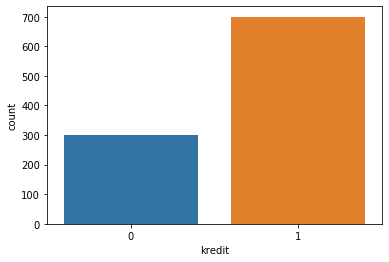

In [13]:
sns.countplot(df['kredit'])

### Zusammenfassung (2)
#### - Der Datensatz ist ungleichmäßig (Im Vergleich zu Klasse 0 ist die Zahl der Klasse 1 um 400 höher). Diese Daten selbst sind vielleicht eine Stichprobe aus größeren Daten.
#### - Wie wir sehen können, haben unsere Daten keinen anderen Typ als int64, die fast alle numerisch sind, und für kategorisch wird auch mit Zahlen dargestellt.
#### - Echter kontinuierlicher Wert sind in 'alter', 'hoehe', 'laufzeit' Spalten befinden

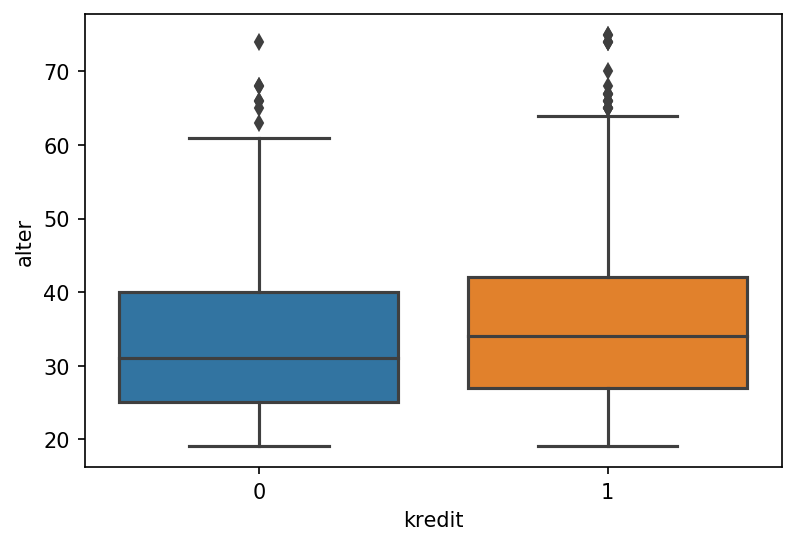

In [14]:
# Distribution features per category

plt.figure(dpi=150)
sns.boxplot(x='kredit', y='alter', data=df)

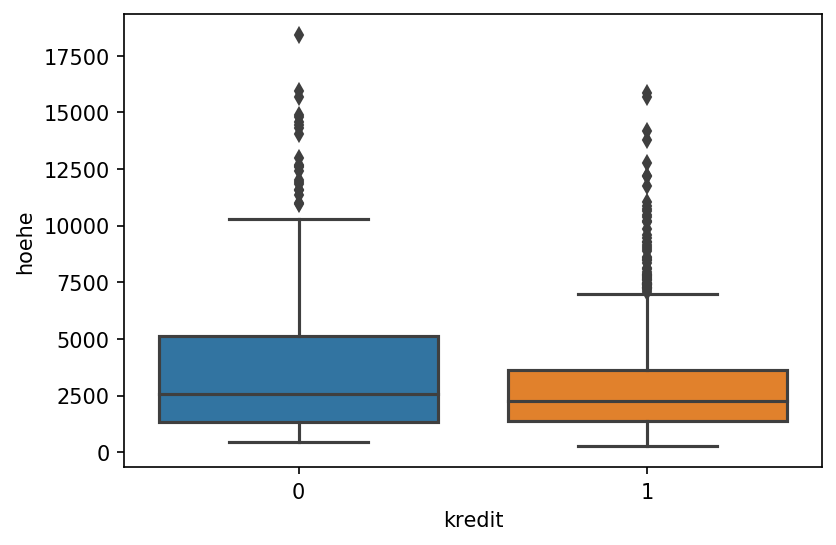

In [15]:
plt.figure(dpi=150)
sns.boxplot(x='kredit', y='hoehe', data=df)

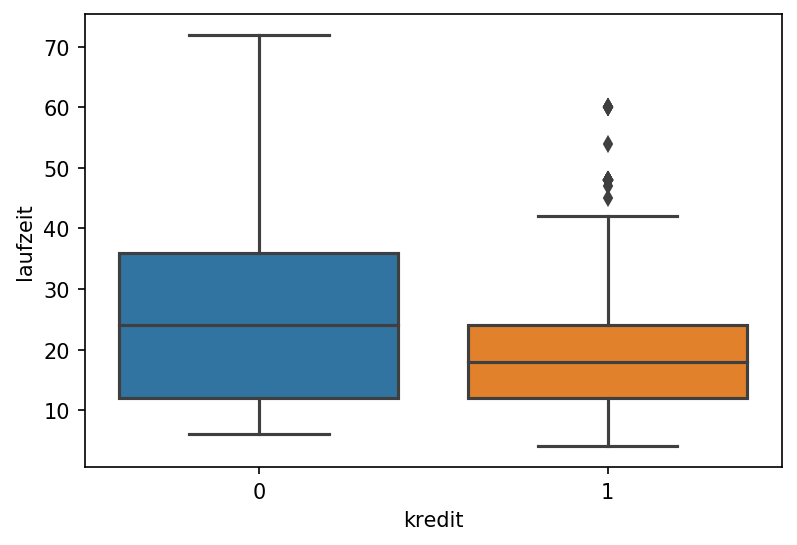

In [16]:
plt.figure(dpi=150)
sns.boxplot(x='kredit', y='laufzeit', data=df)

In [17]:
#################################################################################################

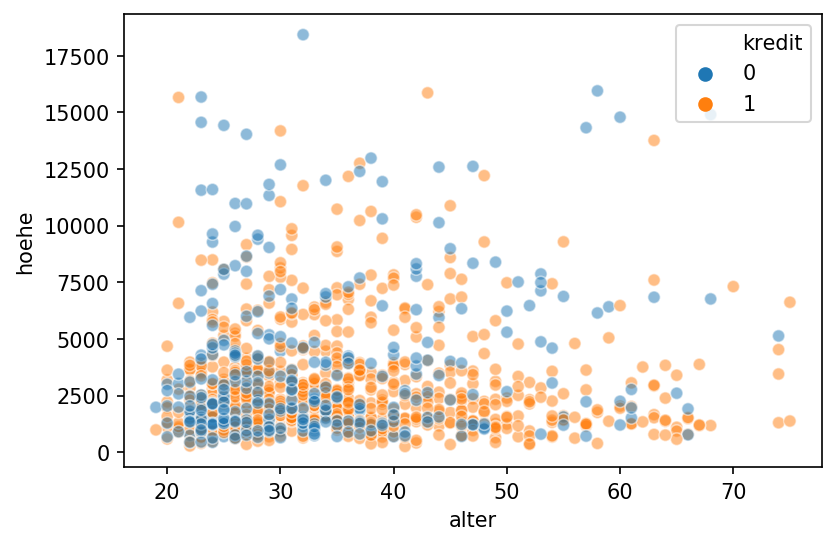

In [18]:
plt.figure(dpi=150)
sns.scatterplot(x='alter', y='hoehe', data=df, hue='kredit', alpha=0.5)

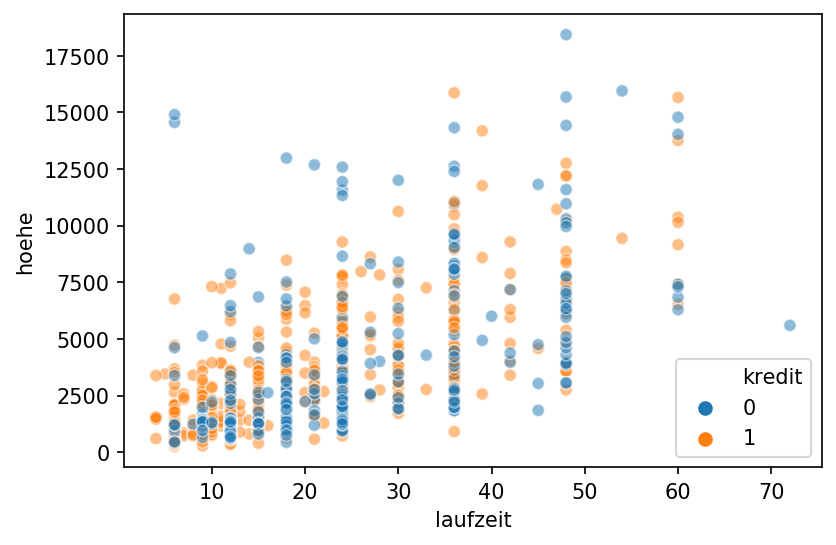

In [19]:
plt.figure(dpi=150)
sns.scatterplot(x='laufzeit', y='hoehe', data=df, hue='kredit', alpha=0.5)

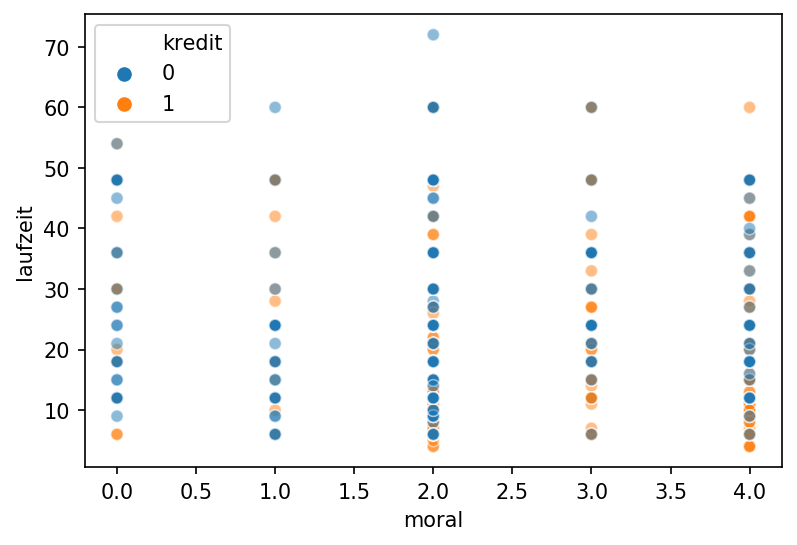

In [5]:
plt.figure(dpi=150)
sns.scatterplot(x='moral', y='laufzeit', data=df, hue='kredit', alpha=0.5)

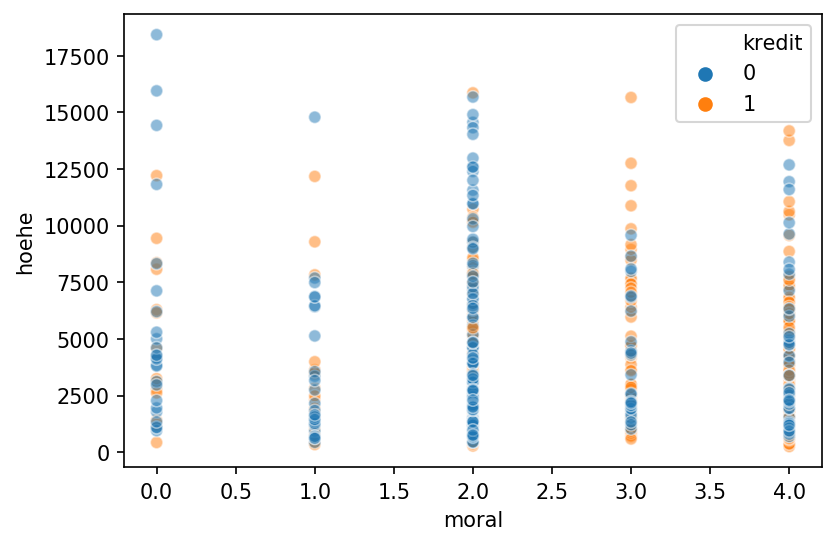

In [6]:
plt.figure(dpi=150)
sns.scatterplot(x='moral', y='hoehe', data=df, hue='kredit', alpha=0.5)

In [10]:
df.groupby(by='moral')['moral']['hoehe']

IndexError: Column(s) moral already selected

<Figure size 900x600 with 0 Axes>

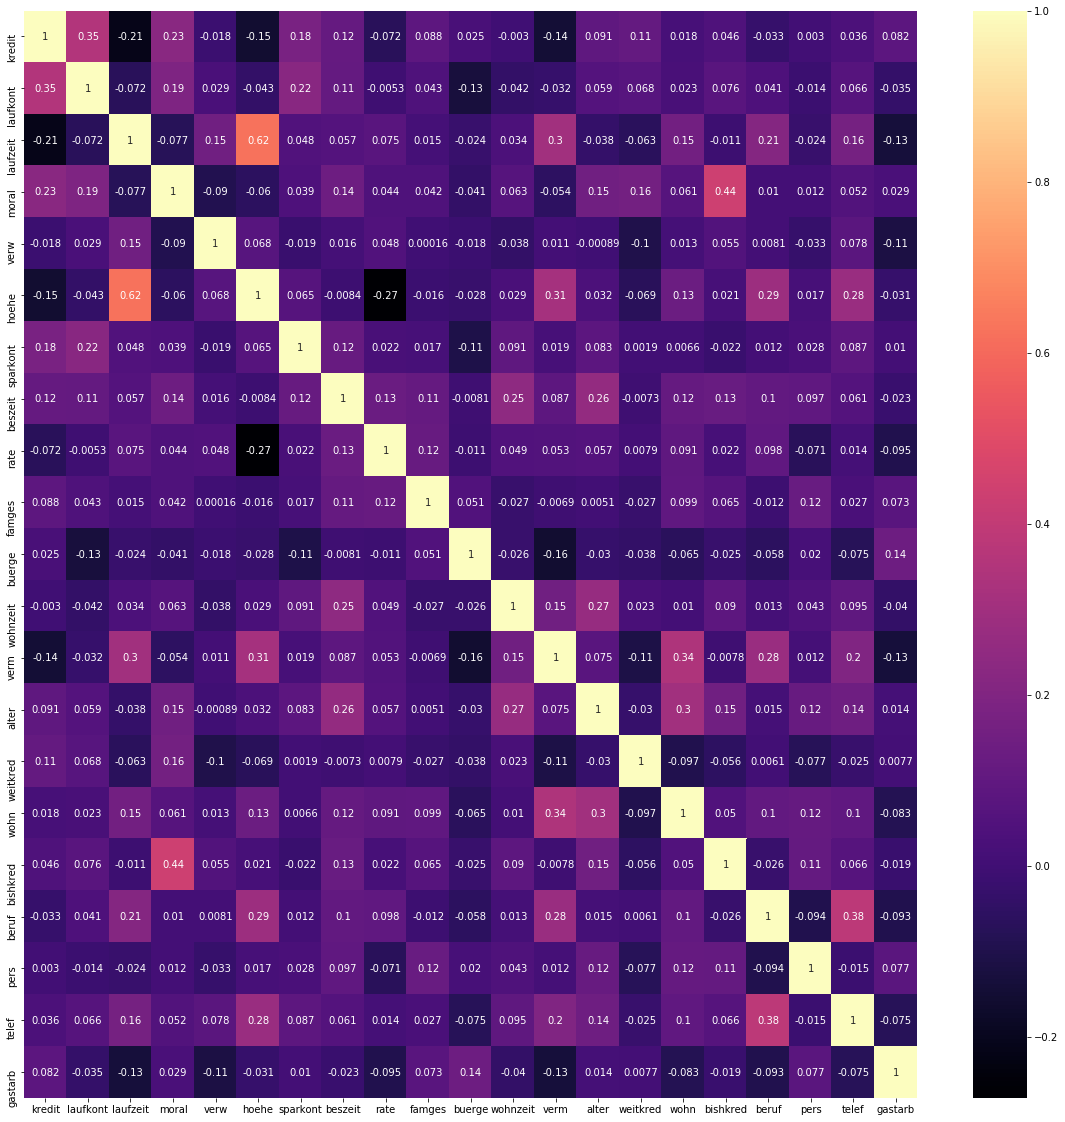

In [20]:
plt.figure(dpi=150)
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap='magma',annot=True)

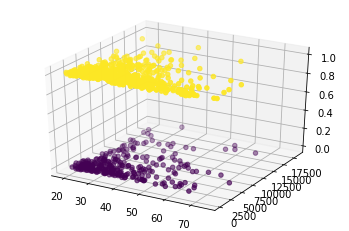

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['alter'], df['hoehe'], df['kredit'],c=df['kredit'])

### Hoehe

...<=500................	10	
500 < ... <= 1000	9	
1000 < ... <= 1500	8	
1500 < ... <= 2500	7	
2500 < ... <= 5000	6	
5000 < ... <= 7500	5	
7500 < ... <= 10000	4	
10000 < ... <= 15000 3 	
15000 < ... <= 20000 2	
...> 20000.........	1

In [22]:
df['hoehe'].describe()

count     1000.00000
mean      3271.24800
std       2822.75176
min        250.00000
25%       1365.50000
50%       2319.50000
75%       3972.25000
max      18424.00000
Name: hoehe, dtype: float64

### Laufkont (bestehendes lfd. Konto bei der Bank)
kein Kontostand bzw. Debetsaldo -> 2	
0 <= ... < 200 DM -> 3	
... >= 200 DM oder Gehaltskonto seit mind. 1 Jahr -> 4	
kein lfd. Konto -> 1

In [23]:
df['laufkont'].nunique()

4

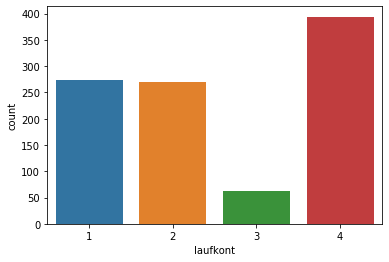

In [160]:
sns.countplot(df['laufkont'])

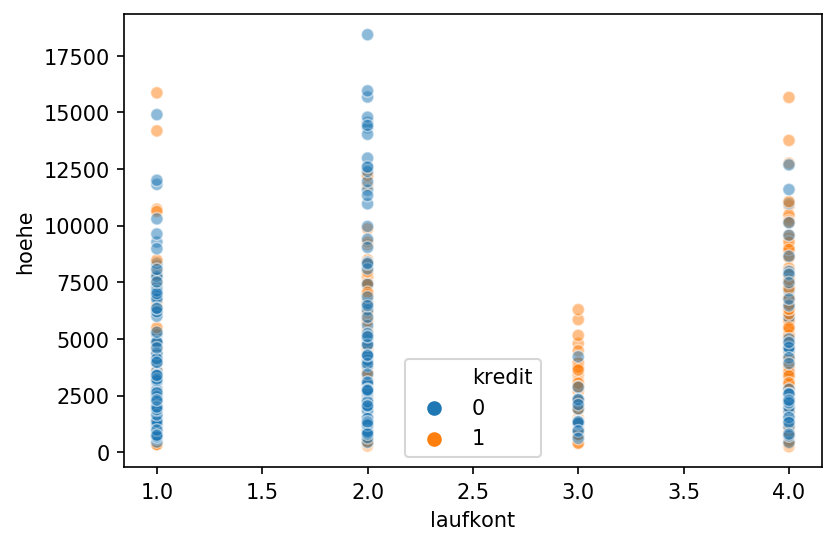

In [161]:
plt.figure(dpi=150)
sns.scatterplot(x='laufkont', y='hoehe', data=df, hue='kredit', alpha=0.5)

### Sparkont (Sparkonto oder Wertpapiere)
< 100,- DM .........................................2

100,- <= ... < 500,- DM .......................3

500,- <= ... < 1000,- DM .....................4

.>= 1000,- DM ....................................5

.nicht ermittelbar / kein Sparkonto .....1

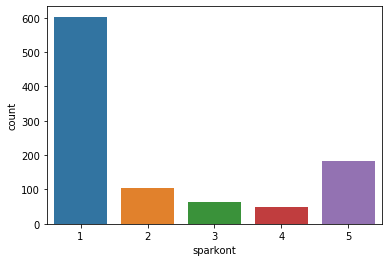

In [162]:
sns.countplot(df['sparkont'])

In [ ]:
!pip install jupyter_contrib_nbextensions

### Grouping by analysis

#### Alter
 0 <= ... <= 25	: 1
 
 26 <= ... <= 39	: 2
 
 40 <= ... <= 59	: 3
 
 60 <= ... <= 64	: 5
 
 .>= 65	: 4

In [5]:
df['altersgruppe'] = np.nan

lst = [df]

for col in lst:
    col.loc[(col['alter'] > 18) & (col['alter'] <= 25), 'altersgruppe'] = 'Young Adults'
    col.loc[(col['alter'] > 25) & (col['alter'] <= 39), 'altersgruppe'] = 'Adults'
    col.loc[(col['alter'] > 39) & (col['alter'] <= 59), 'altersgruppe'] = 'Senior'
    col.loc[col['alter'] > 59, 'altersgruppe'] = 'Elder' 
    
df.head()

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,altersgruppe
0,1,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,1,1,1,Young Adults
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,2,1,1,Adults
2,1,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,1,1,1,Young Adults
3,1,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,2,1,2,Adults
4,1,1,12,4,0,2171,1,3,4,3,...,2,38,1,2,2,2,1,1,2,Adults


In [26]:
df['altersgruppe'].value_counts()

Adults          511
Senior          248
Young Adults    190
Elder            51
Name: altersgruppe, dtype: int64

In [27]:
df.groupby(['altersgruppe','kredit'])['hoehe'].sum()

altersgruppe  kredit
Adults        0          545177
              1         1153605
Elder         0           63355
              1          105805
Senior        0          298040
              1          534619
Young Adults  0          274866
              1          295781
Name: hoehe, dtype: int64

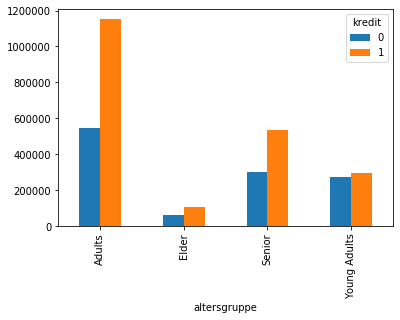

In [28]:
df.groupby(['altersgruppe','kredit'])['hoehe'].sum().unstack().plot(kind='bar')

#### + Die Summe der Kredite an 'Young Adult' in Kreditkategorie 1 und Kredit 0 ist fast gleich
#### + bei  'Adults', dass das Kreditvolumen bei Darlehen der Kategorie 1 fast 2-mal so hoch ist wie bei Darlehen der Kategorie 0

In [29]:
df.groupby(['altersgruppe','kredit'])['hoehe'].count()

altersgruppe  kredit
Adults        0         142
              1         369
Elder         0          13
              1          38
Senior        0          65
              1         183
Young Adults  0          80
              1         110
Name: hoehe, dtype: int64

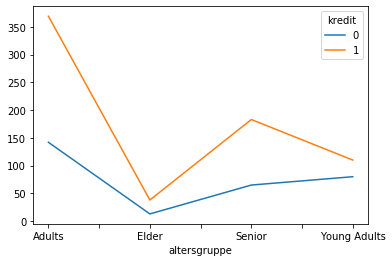

In [30]:
df.groupby(['altersgruppe','kredit'])['hoehe'].count().unstack().plot()

#### + die Alterskategorie, für die die meisten Kredite gemacht werden, ist die Kategorie der 'Young Adult'

#### in der Spalte 'verw' gab es keine Personen, die Kredite für die Kategorie 7 (Ausbildung) vergaben.

In [31]:
# Verwendung zur Ausbildung

df[df['verw'] == 7]

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,altersgruppe


In [32]:
# Verwendung zum Betrieb

df[(df['verw'] == 10) & (df['altersgruppe'] == 'Young Adults')]

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,altersgruppe


In [33]:
df.groupby(['altersgruppe','verw'])['verw'].count()

altersgruppe  verw
Adults        0       124
              1        53
              2        85
              3       141
              4         5
              5         7
              6        20
              8         6
              9        64
              10        6
Elder         0        16
              1         7
              2         2
              3        11
              4         1
              5         3
              6         4
              9         6
              10        1
Senior        0        62
              1        29
              2        42
              3        64
              4         2
              5         6
              6        19
              8         2
              9        17
              10        5
Young Adults  0        32
              1        14
              2        52
              3        64
              4         4
              5         6
              6         7
              8         1
              9    

<Figure size 60000x40000 with 0 Axes>

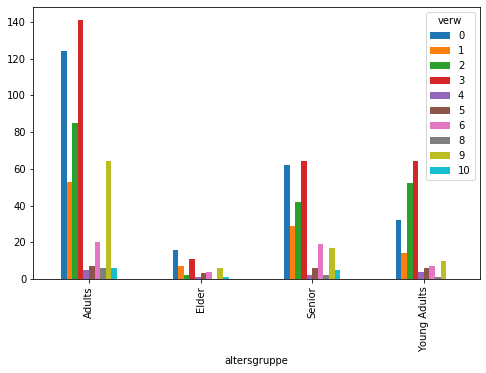

In [43]:

alt_verw_gr = df.groupby(['altersgruppe','verw'])['verw'].count().unstack()
plt.figure(dpi=10000)
alt_verw_gr.plot.bar(figsize=(8,5))
#plt.text(1, 130, 'boxed italics text in data coords',
#        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
plt.show()


#### + Bei jungen Erwachsenen gibt es keine Bedarf, Kredite an Kategorie 10 (Betrieb) zu vergeben.
#### + Der Zweck des Kredits für die Kategorie 3 (Einrichtungsgegenstände/Möbel) ist für Erwachsene, jungen Erwachsenen und Senioren insgesamt am höchsten aber bei Ältere ist die Kategorie 0 (Sonstiges)
#### + in der Spalte 'verw' gab es keine Personen, die Kredite für die Kategorie 7 (Ausbildung) vergaben, trotzdem verwenden einige immer noch Kredite für Kategorie 9 (Umschulung)

In [173]:
df.groupby(['altersgruppe','beruf'])['hoehe'].sum()

altersgruppe  beruf
Adults        1          11504
              2         224834
              3        1010408
              4         452036
Elder         1           8446
              2          21155
              3          58119
              4          81440
Senior        1          10833
              2         128981
              3         451969
              4         240876
Young Adults  1          29610
              2          96716
              3         414220
              4          30101
Name: hoehe, dtype: int64

<Figure size 1200x800 with 0 Axes>

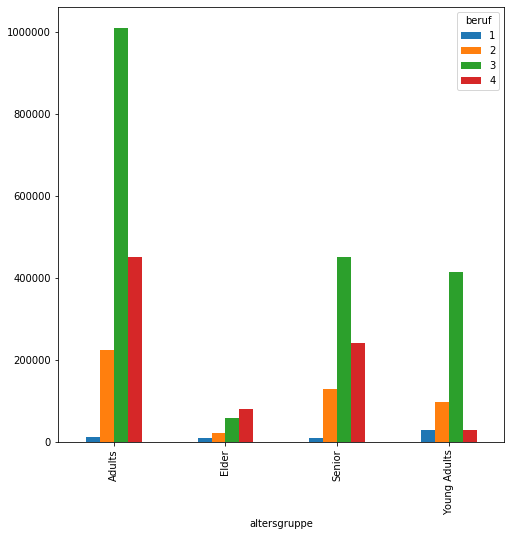

In [174]:
alt_beruf_gr = df.groupby(['altersgruppe','beruf'])['hoehe'].sum().unstack()
plt.figure(dpi=200)
alt_beruf_gr.plot.bar(figsize=(8,8))
plt.show()


#### ? Da niemand den Kredit für die Kategorie 7 (Ausbildung) verwendet, überprüfen wir die Kategorie 9 (Umschulung). In diesem Fall bedeutet dies, dass die Person etwas gelernt hat oder über bestimmte Kenntnisse verfügt. Schauen wir uns ihre Arbeitsart an.

<Figure size 60000x40000 with 0 Axes>

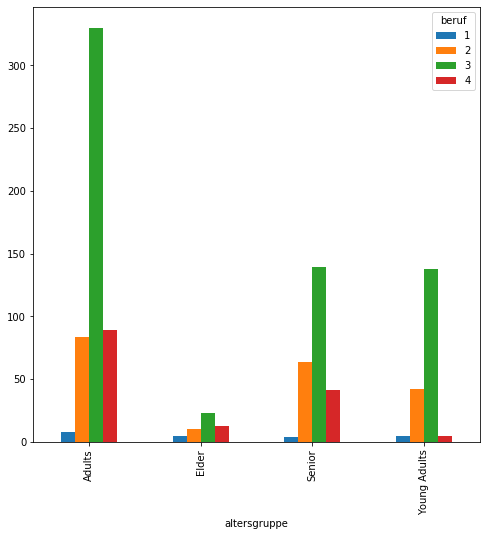

In [44]:
alt_beruf_gr = df.groupby(['altersgruppe','beruf'])['beruf'].count().unstack()
plt.figure(dpi=10000)
alt_beruf_gr.plot.bar(figsize=(8,8))
plt.show()


In [176]:
df.groupby(['altersgruppe','beruf'])['beruf'].count()

altersgruppe  beruf
Adults        1          8
              2         84
              3        330
              4         89
Elder         1          5
              2         10
              3         23
              4         13
Senior        1          4
              2         64
              3        139
              4         41
Young Adults  1          5
              2         42
              3        138
              4          5
Name: beruf, dtype: int64

In [45]:
# verw 9 beruf?

#df[df['verw'] == 9]['beruf'].count()

df.groupby(['verw','beruf'])['beruf'].count()

verw  beruf
0     1         11
      2         59
      3        130
      4         34
1     1          1
      2          7
      3         60
      4         35
2     1          1
      2         33
      3        126
      4         21
3     1          2
      2         57
      3        195
      4         26
4     1          1
      2          1
      3         10
5     1          2
      2          7
      3         13
6     1          1
      2         10
      3         32
      4          7
8     2          5
      3          3
      4          1
9     1          2
      2         20
      3         60
      4         15
10    1          1
      2          1
      3          1
      4          9
Name: beruf, dtype: int64

In [46]:
df[df['verw'] == 9]['beruf'].count()

97

<Figure size 6000x4000 with 0 Axes>

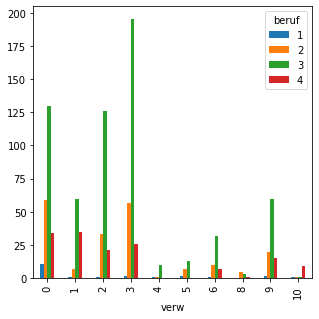

In [7]:
alt_beruf_gr = df.groupby(['verw','beruf'])['beruf'].count().unstack()
plt.figure(dpi=1000)
alt_beruf_gr.plot.bar(figsize=(5,5))
plt.show()


#### + Die Art von Arbeit, bei der die meisten Kredite für Kategorie 9 (Umschulung) verwendet werden, ist Kategorie 3 (Facharbeiter / gelernte Angestellte / Beamte)

In [178]:
df.groupby(['altersgruppe','beruf','kredit'])['beruf'].count()

altersgruppe  beruf  kredit
Adults        1      0           4
                     1           4
              2      0          23
                     1          61
              3      0          89
                     1         241
              4      0          26
                     1          63
Elder         1      1           5
              2      0           3
                     1           7
              3      0           5
                     1          18
              4      0           5
                     1           8
Senior        1      0           1
                     1           3
              2      0          12
                     1          52
              3      0          35
                     1         104
              4      0          17
                     1          24
Young Adults  1      0           2
                     1           3
              2      0          18
                     1          24
              3      0     

<Figure size 6000x4000 with 0 Axes>

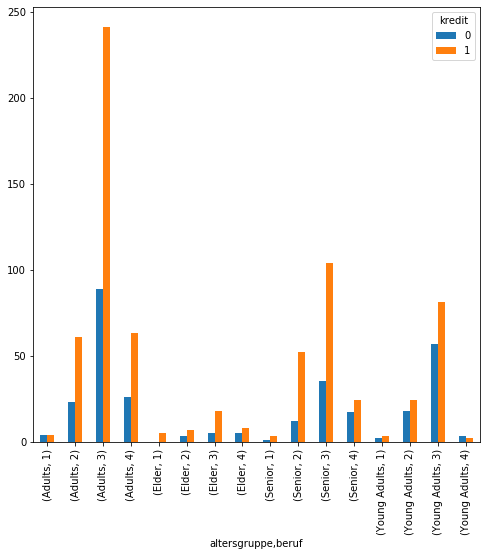

In [9]:
alt_beruf_gr = df.groupby(['altersgruppe','beruf','kredit'])['beruf'].count().unstack()
plt.figure(dpi=1000)
alt_beruf_gr.plot.bar(figsize=(8,8))
plt.show()


In [22]:


df[(df['beruf']==1) & (df['kredit']==0)].shape[0]

7

In [23]:
df[(df['beruf']==1)].shape[0]

22

In [24]:
df[(df['beruf']==1) & (df['kredit']==1)].shape[0]

15

#### + Anzahl der Personen, die selbstandig arbeiten und die Kredit nicht rückzahlen können, betrag 51

#### + die Art der Arbeit, für die am häufigsten Kredite vergeben werden, ist eine Kategorie 3 (Facharbeiter / gelernte Angestellte / Beamte)

#### + Es zeigt sich, dass für junge Erwachsene mit Berufskategorie 4 (Führungskraft / selbständig / gehobener Beamter) mehr Personen keinen Kredit bezahlen können als Personen, die einen Kredit bezahlen können.

In [180]:
df['beruf'].value_counts()

3    630
2    200
4    148
1     22
Name: beruf, dtype: int64

In [181]:
df.pivot_table(['beruf','verw'],['altersgruppe'],aggfunc='sum')

,beruf,verw
altersgruppe,,
Adults,1522,1505
Elder,146,151
Senior,713,676
Young Adults,523,496


#### ? Vergleichen wir nun das Alter mit dem Familienstand

In [182]:
df['famges'].value_counts()

3    548
2    310
4     92
1     50
Name: famges, dtype: int64

In [183]:
df.groupby(['altersgruppe','famges'])['famges'].count()

altersgruppe  famges
Adults        1          27
              2         136
              3         299
              4          49
Elder         1           4
              2          12
              3          34
              4           1
Senior        1          17
              2          57
              3         159
              4          15
Young Adults  1           2
              2         105
              3          56
              4          27
Name: famges, dtype: int64

<Figure size 1200x800 with 0 Axes>

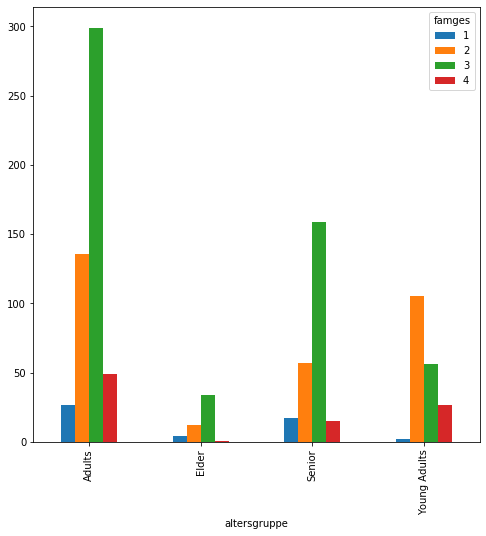

In [184]:
alt_famges_gr = df.groupby(['altersgruppe','famges'])['famges'].count().unstack()
plt.figure(dpi=200)
alt_famges_gr.plot.bar(figsize=(8,8))
plt.show()


#### Die meisten Kredite werden in fast allen Altersgruppen von "famges" der Kategorie 3 (männlich: verheiratet / verwitwet) vergeben, mit Ausnahme junger Erwachsener, bei denen die Kategorie 2 (weiblich: geschieden / getrennt lebend / verheiratet oder männlich: ledig) dominiert.

In [185]:
df.groupby(['altersgruppe','famges','kredit'])['famges'].count()

altersgruppe  famges  kredit
Adults        1       0          13
                      1          14
              2       0          49
                      1          87
              3       0          70
                      1         229
              4       0          10
                      1          39
Elder         1       0           1
                      1           3
              2       0           2
                      1          10
              3       0           9
                      1          25
              4       0           1
Senior        1       0           6
                      1          11
              2       0          11
                      1          46
              3       0          45
                      1         114
              4       0           3
                      1          12
Young Adults  1       1           2
              2       0          47
                      1          58
              3       0          22

<Figure size 1200x800 with 0 Axes>

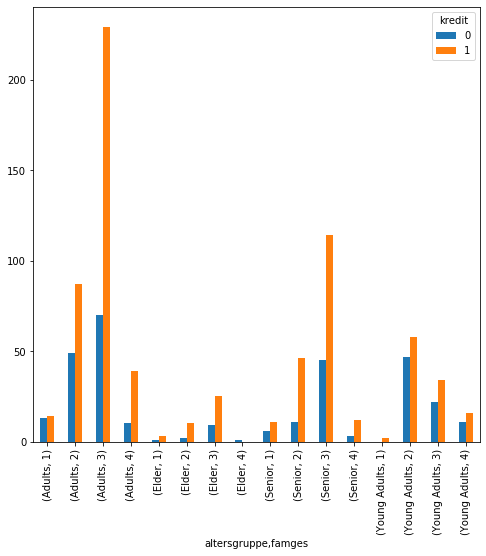

In [188]:
alt_famges_gr = df.groupby(['altersgruppe','famges','kredit'])['famges'].count().unstack()
plt.figure(dpi=200)
alt_famges_gr.plot.bar(figsize=(8,8))
plt.show()


Text(0.5, 1.0, 'welche Kategorien geben die Young Adults am häufigsten aus?')

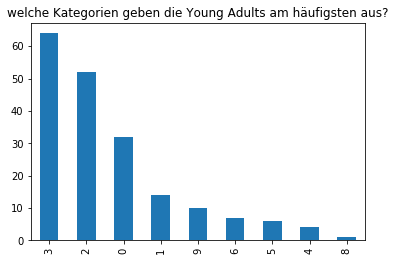

In [189]:
# welche Kategorien geben die Young Adults am häufigsten aus?

df[(df['altersgruppe'] == 'Young Adults')]['verw'].value_counts().plot(kind='bar')
plt.title('welche Kategorien geben die Young Adults am häufigsten aus?')

In [190]:
df[(df['altersgruppe'] == 'Young Adults') & (df['famges'] == 2) & (df['beruf'] == 3)]['verw'].value_counts()

2    26
3    22
0    12
6     6
4     4
1     4
5     2
9     1
Name: verw, dtype: int64

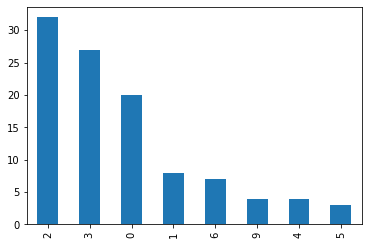

In [25]:
# welche Kategorien geben die Young Adults mit famges 2 am häufigsten aus?

df[(df['altersgruppe'] == 'Young Adults') & (df['famges'] == 2)]['verw'].value_counts().plot(kind='bar')
#plt.title('welche Kategorien geben die Young Adults mit famges 2 am häufigsten aus?')

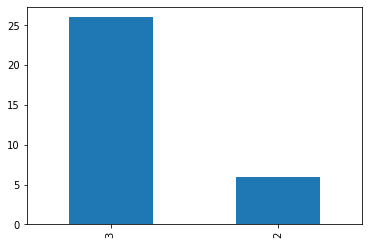

In [26]:
# YA, famges 2, verw 2, beruf?

df[(df['altersgruppe'] == 'Young Adults') & (df['famges'] == 2) & (df['verw'] == 2)]['beruf'].value_counts().plot(kind='bar')
#plt.title('welche Beruf hat die Young Adults mit famges 2 und Verwendungszweck 2 am häufigsten?')

#### + Zwar nehmen junge Erwachsene generell Kredite für Bedürfnisse der Kategorie 3 (Einrichtungsgegenstände / Möbel) auf, aber junge Erwachsene mit 'famges' 2 nehmen Kredite für Zwecke der Kategorie 2 (PKW gebraucht)

#### + Es stellt sich heraus, dass die Arbeitsplätze junger Erwachsener mit Familiestand Kategori 2 eher als 3 (Facharbeiter / gelernte Angestellte / Beamte) arbeiten, obwohl es auch diejenigen gibt, die nicht arbeiten, die ebenfalls einen Kredit für Gebrauchtwagen auch aufnehmen

In [193]:
df.groupby(['altersgruppe','famges','beruf'])['famges'].count()

altersgruppe  famges  beruf
Adults        1       2          3
                      3         20
                      4          4
              2       1          6
                      2         20
                      3         91
                      4         19
              3       1          1
                      2         53
                      3        185
                      4         60
              4       1          1
                      2          8
                      3         34
                      4          6
Elder         1       2          2
                      3          1
                      4          1
              2       1          1
                      2          1
                      3          6
                      4          4
              3       1          4
                      2          7
                      3         15
                      4          8
              4       3          1
Senior        1       2    

<Figure size 1200x800 with 0 Axes>

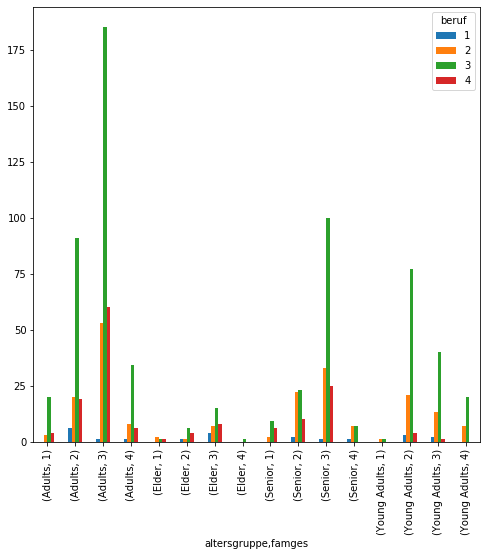

In [194]:
alt_famges_ber = df.groupby(['altersgruppe','famges','beruf'])['famges'].count().unstack()
plt.figure(dpi=200)
alt_famges_ber.plot.bar(figsize=(8,8))
plt.show()

#### ? jetzt sehen wir die Zahl der Abhängigen Person

In [195]:
df['pers'].value_counts()

1    845
2    155
Name: pers, dtype: int64

In [196]:
df.groupby(['altersgruppe','pers'])['pers'].count()

altersgruppe  pers
Adults        1       430
              2        81
Elder         1        48
              2         3
Senior        1       183
              2        65
Young Adults  1       184
              2         6
Name: pers, dtype: int64

<Figure size 1200x800 with 0 Axes>

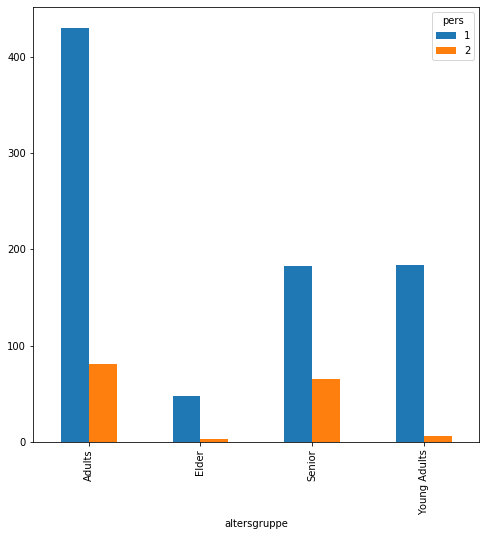

In [197]:
alt_famges_pers = df.groupby(['altersgruppe','pers'])['pers'].count().unstack()
plt.figure(dpi=200)
alt_famges_pers.plot.bar(figsize=(8,8))
plt.show()

#### + die Anzahl der unterhaltsberechtigten Personen für junge Erwachsene fast gleich ist wie die Anzahl der unterhaltsberechtigten Personen für Senioren

In [30]:
# df.groupby(['altersgruppe','famges','pers'])['pers'].count()

In [199]:
df[(df['altersgruppe'] == 'Young Adults') & (df['famges'] == 2)]['pers'].value_counts()

1    103
2      2
Name: pers, dtype: int64

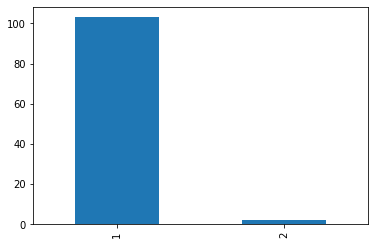

In [200]:
# Young Adults mit Familienstand 2 hat wie viele unterhaltsberechtigten Personen?

df[(df['altersgruppe'] == 'Young Adults') & (df['famges'] == 2)]['pers'].value_counts().plot(kind='bar')

In [29]:
df[(df['altersgruppe'] == 'Young Adults') & (df['famges'] == 2)]['kredit'].value_counts()

1    58
0    47
Name: kredit, dtype: int64

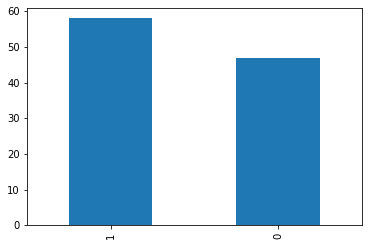

In [28]:
df[(df['altersgruppe'] == 'Young Adults') & (df['famges'] == 2)]['kredit'].value_counts().plot(kind='bar')

In [202]:
# df[(df['altersgruppe'] == 'Young Adults') & (df['famges'] == 2)][['kredit','laufzeit']]

In [203]:
df[(df['altersgruppe'] == 'Young Adults') & (df['famges'] == 2)][['kredit','laufzeit']].describe()

,kredit,laufzeit
count,105.000000,105.000000
mean,0.552381,19.561905
std,0.499634,11.097404
min,0.000000,4.000000
25%,0.000000,12.000000
50%,1.000000,18.000000
75%,1.000000,24.000000
max,1.000000,60.000000


#### + Viele junge Erwachsene, die Unterhaltsberechtigte von mehr als 2 Personen haben, nehmen einen Kredit auf, um Gebrauchtwagen zu kaufen

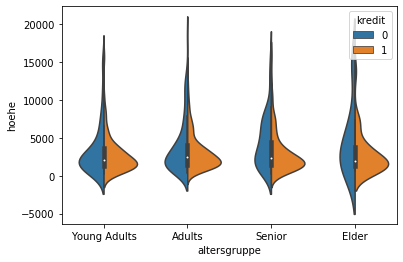

In [204]:
sns.violinplot(x='altersgruppe',y='hoehe',data=df,hue='kredit',split=True)

#### By Laufkonto

kein Kontostand bzw. Debetsaldo -> 2	
0 <= ... < 200 DM -> 3	
... >= 200 DM oder Gehaltskonto seit mind. 1 Jahr -> 4	
kein lfd. Konto -> 1


#### Sparkont (Sparkonto oder Wertpapiere)
< 100,- DM .........................................2

100,- <= ... < 500,- DM .......................3

500,- <= ... < 1000,- DM .....................4

.>= 1000,- DM ....................................5

.nicht ermittelbar / kein Sparkonto .....1

In [205]:
df['laufkont'].value_counts()

4    394
1    274
2    269
3     63
Name: laufkont, dtype: int64

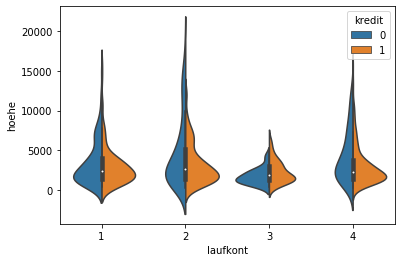

In [206]:
sns.violinplot(x='laufkont',y='hoehe',data=df,hue='kredit',split=True)

In [207]:
df.groupby(['laufkont', 'kredit'])['hoehe'].count()

laufkont  kredit
1         0         135
          1         139
2         0         105
          1         164
3         0          14
          1          49
4         0          46
          1         348
Name: hoehe, dtype: int64

<Figure size 1200x800 with 0 Axes>

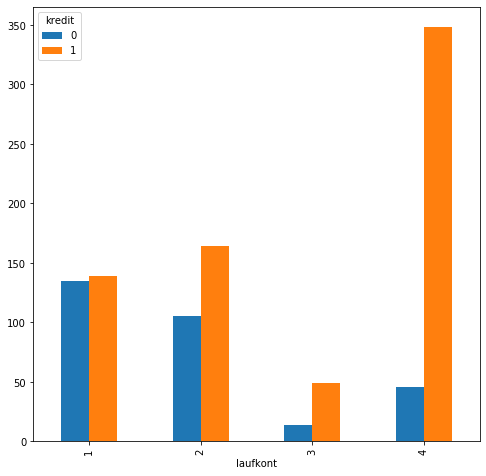

In [208]:
# laufkont vs credit

laufk_kredit_gr = df.groupby(['laufkont','kredit'])['hoehe'].count().unstack()
plt.figure(dpi=200)
laufk_kredit_gr.plot.bar(figsize=(8,8))
plt.show()

#### + Wie wir sehen können, befindet sich die größte Anzahl der Beobachtungsdaten in der Kategorie der 'laufkont' der Kategorie 4 (>= 200 DM oder Gehaltskonto seit mind. 1 Jahr), mit Kredit Ratios von 1 und 0 fast 7 Mal gröser.

#### + während für Kategorie 1 das Verhältnis von Kredit 1 und 0 fast gleich ist.

#### ? untersuchen wir die Kategorie 1 von 'laufkont' und 'beruf'

In [209]:
# laufkont  vs beruf


df.groupby(['laufkont', 'beruf'])['hoehe'].count()

laufkont  beruf
1         1          6
          2         59
          3        172
          4         37
2         1          9
          2         57
          3        155
          4         48
3         1          4
          2         14
          3         37
          4          8
4         1          3
          2         70
          3        266
          4         55
Name: hoehe, dtype: int64

<Figure size 1200x800 with 0 Axes>

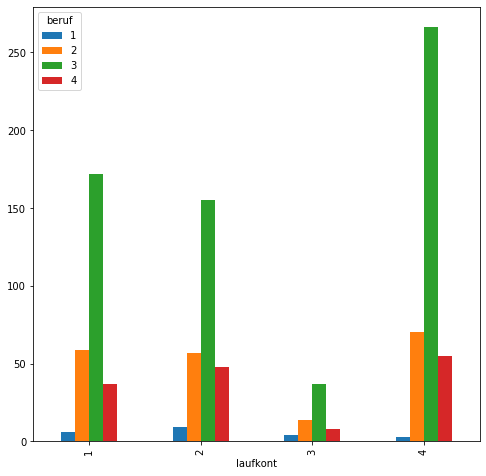

In [210]:
laufk_beruf_gr = df.groupby(['laufkont','beruf'])['hoehe'].count().unstack()
plt.figure(dpi=200)
laufk_beruf_gr.plot.bar(figsize=(8,8))
plt.show()

#### + Menschen, die kein Konto laufende haben, sind die meisten Menschen, die als Kategorie 3 (Facharbeiter / gelernte Angestellte / Beamte) arbeiten, während bei laufende Konto Kategorie 4 (>= 200 DM oder Gehaltskonto seit mind. 1 Jahr) von dem Job Kategorie 3 dominiert wird.

#### ? In 'laufkont' hat die Spalte 'beruf' die höchste Anzahl von Personen in Kategorie 3, sehen wir uns die Verteilung der Kredite 1 und 0 an

In [211]:
# laufkont 1 vs beruf

df[(df['laufkont'] == 1) & (df['beruf'] == 1)]['kredit'].value_counts()


0    4
1    2
Name: kredit, dtype: int64

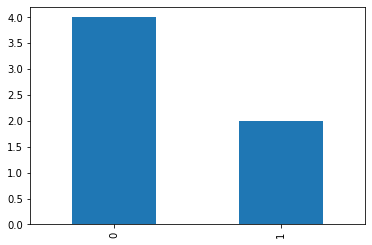

In [212]:
df[(df['laufkont'] == 1) & (df['beruf'] == 1)]['kredit'].value_counts().plot(kind='bar')

In [213]:
df.groupby(['laufkont','beruf','kredit'])['hoehe'].count()

laufkont  beruf  kredit
1         1      0           4
                 1           2
          2      0          23
                 1          36
          3      0          96
                 1          76
          4      0          12
                 1          25
2         1      0           2
                 1           7
          2      0          19
                 1          38
          3      0          57
                 1          98
          4      0          27
                 1          21
3         1      0           1
                 1           3
          2      0           5
                 1           9
          3      0           6
                 1          31
          4      0           2
                 1           6
4         1      1           3
          2      0           9
                 1          61
          3      0          27
                 1         239
          4      0          10
                 1          45
Name: hoehe, dt

<Figure size 1200x800 with 0 Axes>

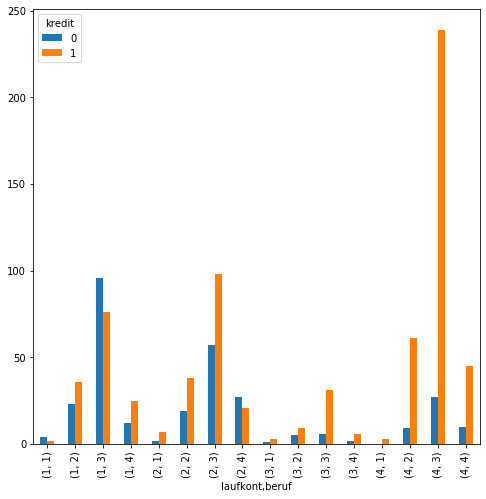

In [214]:
# laufkont vs credit

laufk_kredit_ber = df.groupby(['laufkont','beruf','kredit'])['hoehe'].count().unstack()
plt.figure(dpi=200)
laufk_kredit_ber.plot.bar(figsize=(8,8))
plt.show()

#### ? Da die Ausfälle in der Laufkont-Kategorie 1 hoch waren, lassen Sie uns untersuchen

In [215]:
# laufkont 1 vs beruf 3

df[(df['laufkont'] == 1) & (df['beruf'] == 3)]['kredit'].value_counts()

0    96
1    76
Name: kredit, dtype: int64

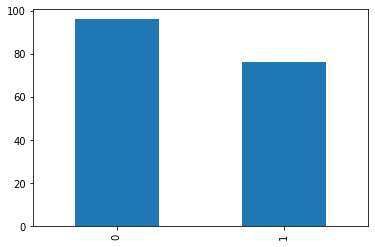

In [216]:

df[(df['laufkont'] == 1) & (df['beruf'] == 3)]['kredit'].value_counts().plot(kind='bar')

#### + es stellt sich heraus, dass die Zahl der Menschen mit Laufkonto Kategorie 2 mit Beruf Kategorie 3, die keinen Kredit bezahlen können, größer ist als die Zahl der Menschen, die auf Kredit bezahlen können.

In [217]:
# laufkont 1 vs beruf 2
df[(df['laufkont'] == 1) & (df['beruf'] == 2)]['kredit'].value_counts()

1    36
0    23
Name: kredit, dtype: int64

In [218]:
# laufkont 1 vs beruf 4
df[(df['laufkont'] == 1) & (df['beruf'] == 4)]['kredit'].value_counts()

1    25
0    12
Name: kredit, dtype: int64

In [219]:
# laufkont 1 vs beruf 1
df[(df['laufkont'] == 1) & (df['beruf'] == 1)]['kredit'].value_counts()

0    4
1    2
Name: kredit, dtype: int64

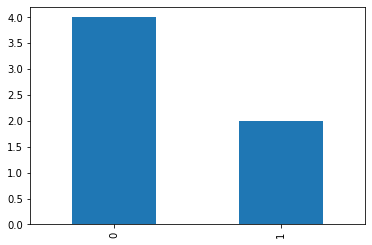

In [220]:
df[(df['laufkont'] == 1) & (df['beruf'] == 1)]['kredit'].value_counts().plot(kind='bar')

#### + Neben kein lfd. Konto-Menschen, die als Kategorie 3 (Facharbeiter / gelernte Angestellte / Beamte) arbeiten, gibt es auch Menschen, die keine Arbeit haben, um sich einen Kredit zu leihen, und die ihre Schulden nicht zurückzahlen können.

In [221]:
####################################################################

In [222]:
df['sparkont'].value_counts()

1    603
5    183
2    103
3     63
4     48
Name: sparkont, dtype: int64

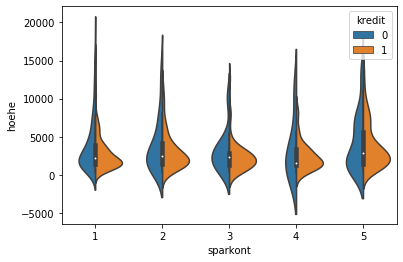

In [223]:
sns.violinplot(x='sparkont',y='hoehe',data=df,hue='kredit',split=True)

In [224]:
df.groupby(['sparkont', 'kredit'])['kredit'].count()

sparkont  kredit
1         0         217
          1         386
2         0          34
          1          69
3         0          11
          1          52
4         0           6
          1          42
5         0          32
          1         151
Name: kredit, dtype: int64

<Figure size 1200x800 with 0 Axes>

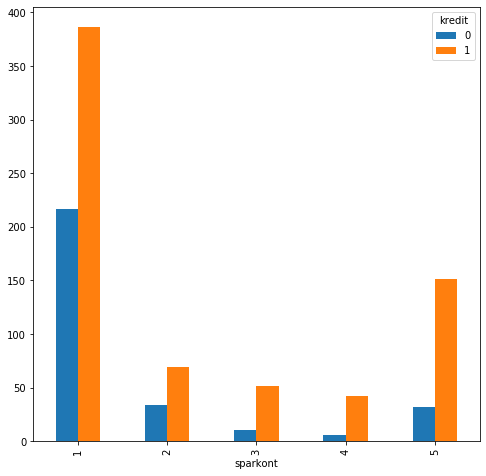

In [225]:
spark_kredit_gr = df.groupby(['sparkont','kredit'])['kredit'].count().unstack()
plt.figure(dpi=200)
spark_kredit_gr.plot.bar(figsize=(8,8))
plt.show()

## Features Engineering

In [31]:
df['zahlung pro monat'] = df['hoehe'] / df['laufzeit']

In [32]:
df['zahlung pro monat']

0       58.277778
1      311.000000
2       70.083333
3      176.833333
4      180.916667
          ...    
995     82.791667
996     95.958333
997    603.809524
998    539.000000
999    211.666667
Name: zahlung pro monat, Length: 1000, dtype: float64

In [34]:
df.head()

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,altersgruppe,zahlung pro monat
0,1,1,18,4,2,1049,1,2,4,2,...,21,3,1,1,3,1,1,1,Young Adults,58.277778
1,1,1,9,4,0,2799,1,3,2,3,...,36,3,1,2,3,2,1,1,Adults,311.000000
2,1,2,12,2,9,841,2,4,2,2,...,23,3,1,1,2,1,1,1,Young Adults,70.083333
3,1,1,12,4,0,2122,1,3,3,3,...,39,3,1,2,2,2,1,2,Adults,176.833333
4,1,1,12,4,0,2171,1,3,4,3,...,38,1,2,2,2,1,1,2,Adults,180.916667


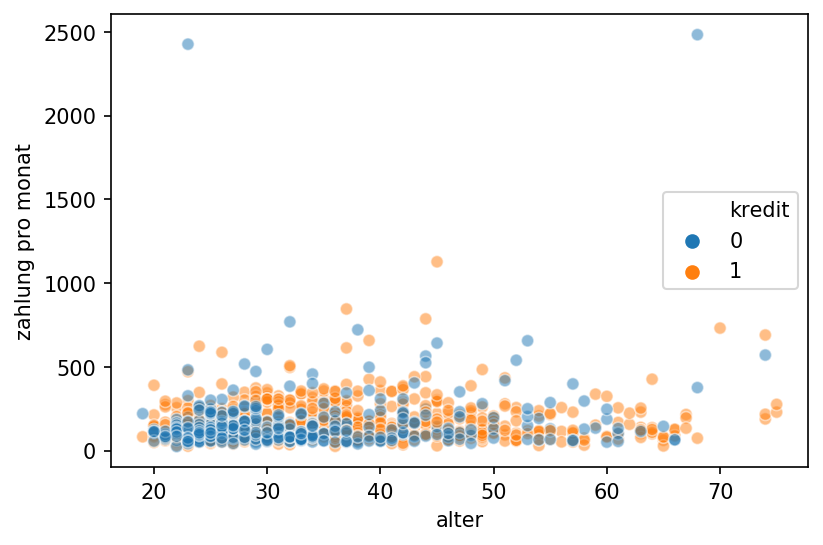

In [35]:
plt.figure(dpi=150)
sns.scatterplot(x='alter', y='zahlung pro monat', data=df, hue='kredit', alpha=0.5)

In [40]:
df['zahlung pro monat'].sort_values(ascending=True)

872      24.055556
267      25.250000
164      26.133333
597      27.190476
300      28.250000
          ...     
24      786.000000
536     845.000000
196    1126.833333
754    2425.833333
977    2482.666667
Name: zahlung pro monat, Length: 1000, dtype: float64

In [47]:
df[(df['zahlung pro monat'] > 2400)][['verw','beruf','famges','pers']]

,verw,beruf,famges,pers
754,0,1,3,1
977,0,4,3,1


In [59]:
df_eval = df.copy(deep=True)

In [60]:
df_eval.head()

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,altersgruppe,zahlung pro monat
0,1,1,18,4,2,1049,1,2,4,2,...,21,3,1,1,3,1,1,1,Young Adults,58.277778
1,1,1,9,4,0,2799,1,3,2,3,...,36,3,1,2,3,2,1,1,Adults,311.000000
2,1,2,12,2,9,841,2,4,2,2,...,23,3,1,1,2,1,1,1,Young Adults,70.083333
3,1,1,12,4,0,2122,1,3,3,3,...,39,3,1,2,2,2,1,2,Adults,176.833333
4,1,1,12,4,0,2171,1,3,4,3,...,38,1,2,2,2,1,1,2,Adults,180.916667


## Modellierung

### Bevor Evaluation

#### OHE -> Split -> Scale -> Modeling

In [58]:
df.head()

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,altersgruppe,zahlung pro monat
0,1,1,18,4,2,1049,1,2,4,2,...,21,3,1,1,3,1,1,1,Young Adults,58.277778
1,1,1,9,4,0,2799,1,3,2,3,...,36,3,1,2,3,2,1,1,Adults,311.000000
2,1,2,12,2,9,841,2,4,2,2,...,23,3,1,1,2,1,1,1,Young Adults,70.083333
3,1,1,12,4,0,2122,1,3,3,3,...,39,3,1,2,2,2,1,2,Adults,176.833333
4,1,1,12,4,0,2171,1,3,4,3,...,38,1,2,2,2,1,1,2,Adults,180.916667


In [232]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [233]:
X = df.drop('kredit', axis=1)

In [234]:
y = df['kredit']

In [235]:
X.shape

(1000, 22)

In [236]:
y.shape

(1000,)

In [237]:
X.columns

Index(['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'altersgruppe',
       'zahlung pro monat'],
      dtype='object')

In [238]:
categorical_columns = ['laufkont', 'moral', 'verw', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'altersgruppe']

numerical_columns = ['laufzeit', 'hoehe', 'alter', 'zahlung pro monat']

X_cat = df[categorical_columns]
X_num = df[numerical_columns].values

#### Scalling numerical before splitting

#### One Hot Encoder

In [239]:
# One Hot Encoder before split

ohe = OneHotEncoder()
ohe.fit(X_cat)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [240]:
X_cat = ohe.transform(X_cat).toarray()

In [241]:
X_cat.shape, X_num.shape

((1000, 72), (1000, 4))

In [242]:
X = np.hstack((X_cat, X_num))

In [243]:
X.shape

(1000, 76)

#### Scaling

In [244]:
from sklearn.model_selection import train_test_split

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [246]:
X_train.shape, X_test.shape

((800, 76), (200, 76))

In [247]:
scaler = StandardScaler()

In [248]:
scaled_X_train = scaler.fit_transform(X_train)

In [249]:
scaled_X_test = scaler.transform(X_test)

In [253]:
y_test

733    1
536    1
445    1
310    1
861    0
      ..
106    1
331    1
121    1
244    1
538    1
Name: kredit, Length: 200, dtype: int64

In [251]:
y_train

485    1
510    1
7      1
630    1
590    1
      ..
214    1
618    0
638    1
469    1
504    1
Name: kredit, Length: 800, dtype: int64

### Logistic Regression v1

In [254]:
from sklearn.linear_model import LogisticRegression

In [255]:
log_model_baseline = LogisticRegression()

In [256]:
log_model_baseline.fit(scaled_X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [257]:
log_model_baseline.coef_

array([[-0.35000287, -0.1424983 ,  0.09557665,  0.40502237, -0.16948107,
        -0.22989831, -0.10866868,  0.04605159,  0.27461489, -0.28710343,
         0.28386863,  0.02662363,  0.09611434, -0.01199241,  0.00513638,
        -0.12738048,  0.13472699, -0.03544137,  0.03010177, -0.25097885,
        -0.07066452,  0.01512507,  0.29764865,  0.19850643, -0.07756079,
        -0.15149699,  0.02376263,  0.22491678, -0.04809707,  0.19038589,
         0.08820672, -0.01486353, -0.19491808, -0.15785584, -0.08499676,
         0.14240456,  0.00574923, -0.03073206, -0.11136631,  0.14043738,
         0.13472071, -0.16629789, -0.07081418,  0.11180289,  0.10151937,
         0.02308063, -0.012029  , -0.13735157, -0.06561937, -0.03131086,
         0.07537982, -0.17892069,  0.07292157,  0.1100361 ,  0.08288613,
        -0.0823562 ,  0.00160162, -0.01981162,  0.10929913, -0.02253291,
        -0.01747051,  0.00110237,  0.02862918, -0.02862918, -0.05124553,
         0.05124553, -0.18466416,  0.18466416,  0.0

In [258]:
y_pred = log_model_baseline.predict(scaled_X_test)

In [259]:
y_pred

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1], dtype=int64)

In [260]:
y_pred_proba = log_model_baseline.predict_proba(scaled_X_test)

In [261]:
y_pred_proba

array([[0.75527676, 0.24472324],
       [0.03225917, 0.96774083],
       [0.13289542, 0.86710458],
       [0.01618831, 0.98381169],
       [0.91879757, 0.08120243],
       [0.07936967, 0.92063033],
       [0.59450228, 0.40549772],
       [0.87695774, 0.12304226],
       [0.24477199, 0.75522801],
       [0.01186567, 0.98813433],
       [0.37621535, 0.62378465],
       [0.90512216, 0.09487784],
       [0.10475561, 0.89524439],
       [0.33055646, 0.66944354],
       [0.70893258, 0.29106742],
       [0.11649941, 0.88350059],
       [0.27546621, 0.72453379],
       [0.23754105, 0.76245895],
       [0.04997027, 0.95002973],
       [0.29316325, 0.70683675],
       [0.0805739 , 0.9194261 ],
       [0.02550322, 0.97449678],
       [0.64233978, 0.35766022],
       [0.72576785, 0.27423215],
       [0.16743001, 0.83256999],
       [0.05571742, 0.94428258],
       [0.01089391, 0.98910609],
       [0.82911406, 0.17088594],
       [0.23248121, 0.76751879],
       [0.90490482, 0.09509518],
       [0.

In [262]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [263]:
accuracy_score(y_test, y_pred)

0.8

In [264]:
confusion_matrix(y_test, y_pred)

array([[ 37,  23],
       [ 17, 123]], dtype=int64)

In [265]:
from sklearn.metrics import plot_confusion_matrix

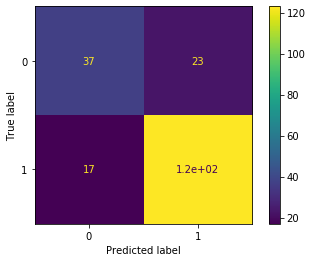

In [266]:
plot_confusion_matrix(log_model_baseline, scaled_X_test, y_test)

In [267]:
len(y_test)

200

In [268]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        60
           1       0.84      0.88      0.86       140

    accuracy                           0.80       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.80      0.80      0.80       200



In [269]:
from sklearn.metrics import precision_score, recall_score

In [270]:
precision_score(y_test, y_pred)

0.8424657534246576

In [271]:
recall_score(y_test, y_pred)

0.8785714285714286

In [272]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

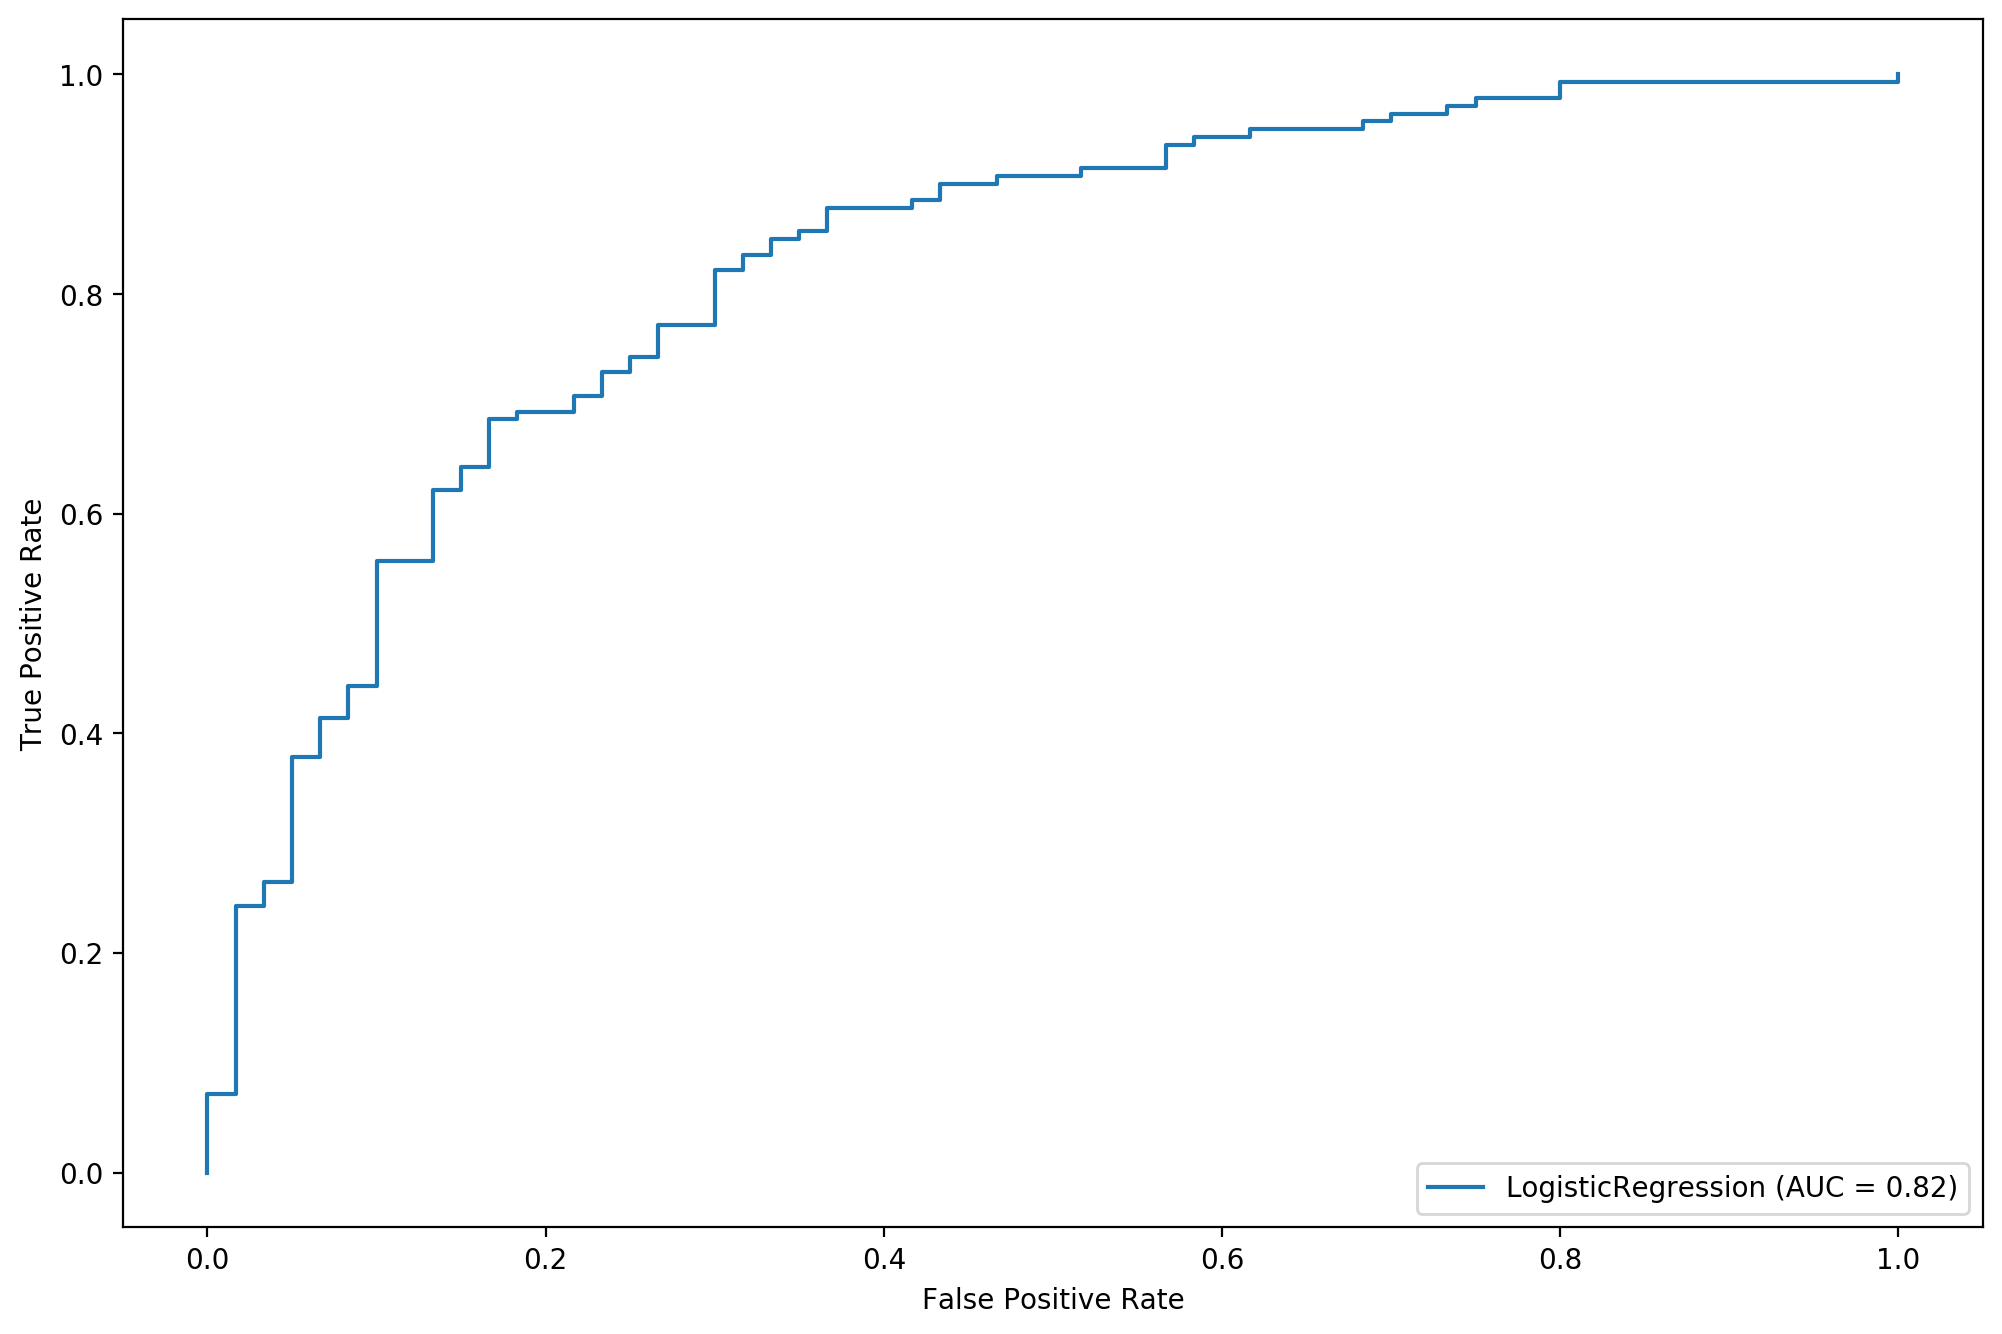

In [273]:
fig,ax = plt.subplots(figsize=(12,8), dpi=200)

plot_roc_curve(log_model_baseline, scaled_X_test, y_test, ax=ax)

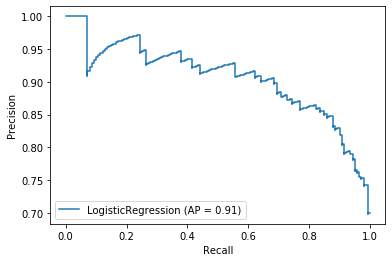

In [274]:
plot_precision_recall_curve(log_model_baseline, scaled_X_test, y_test)

### K-Nearest Neighbors v1

In [275]:
from sklearn.neighbors import KNeighborsClassifier

In [276]:
knn_model_baseline = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [277]:
knn_model_baseline.fit(scaled_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [279]:
y_pred = knn_model_baseline.predict(scaled_X_test)

In [280]:
y_pred_proba = knn_model_baseline.predict_proba(scaled_X_test)

In [281]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [282]:
y_pred_proba

array([[0.6, 0.4],
       [0. , 1. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.2, 0.8],
       [0. , 1. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.4, 0.6],
       [0. , 1. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.2, 0.8],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.2,

In [283]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [284]:
accuracy_score(y_test, y_pred)

0.735

In [288]:
confusion_matrix(y_test, y_pred)

array([[ 21,  39],
       [ 14, 126]], dtype=int64)

In [289]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.35      0.44        60
           1       0.76      0.90      0.83       140

    accuracy                           0.73       200
   macro avg       0.68      0.62      0.63       200
weighted avg       0.71      0.73      0.71       200



In [286]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

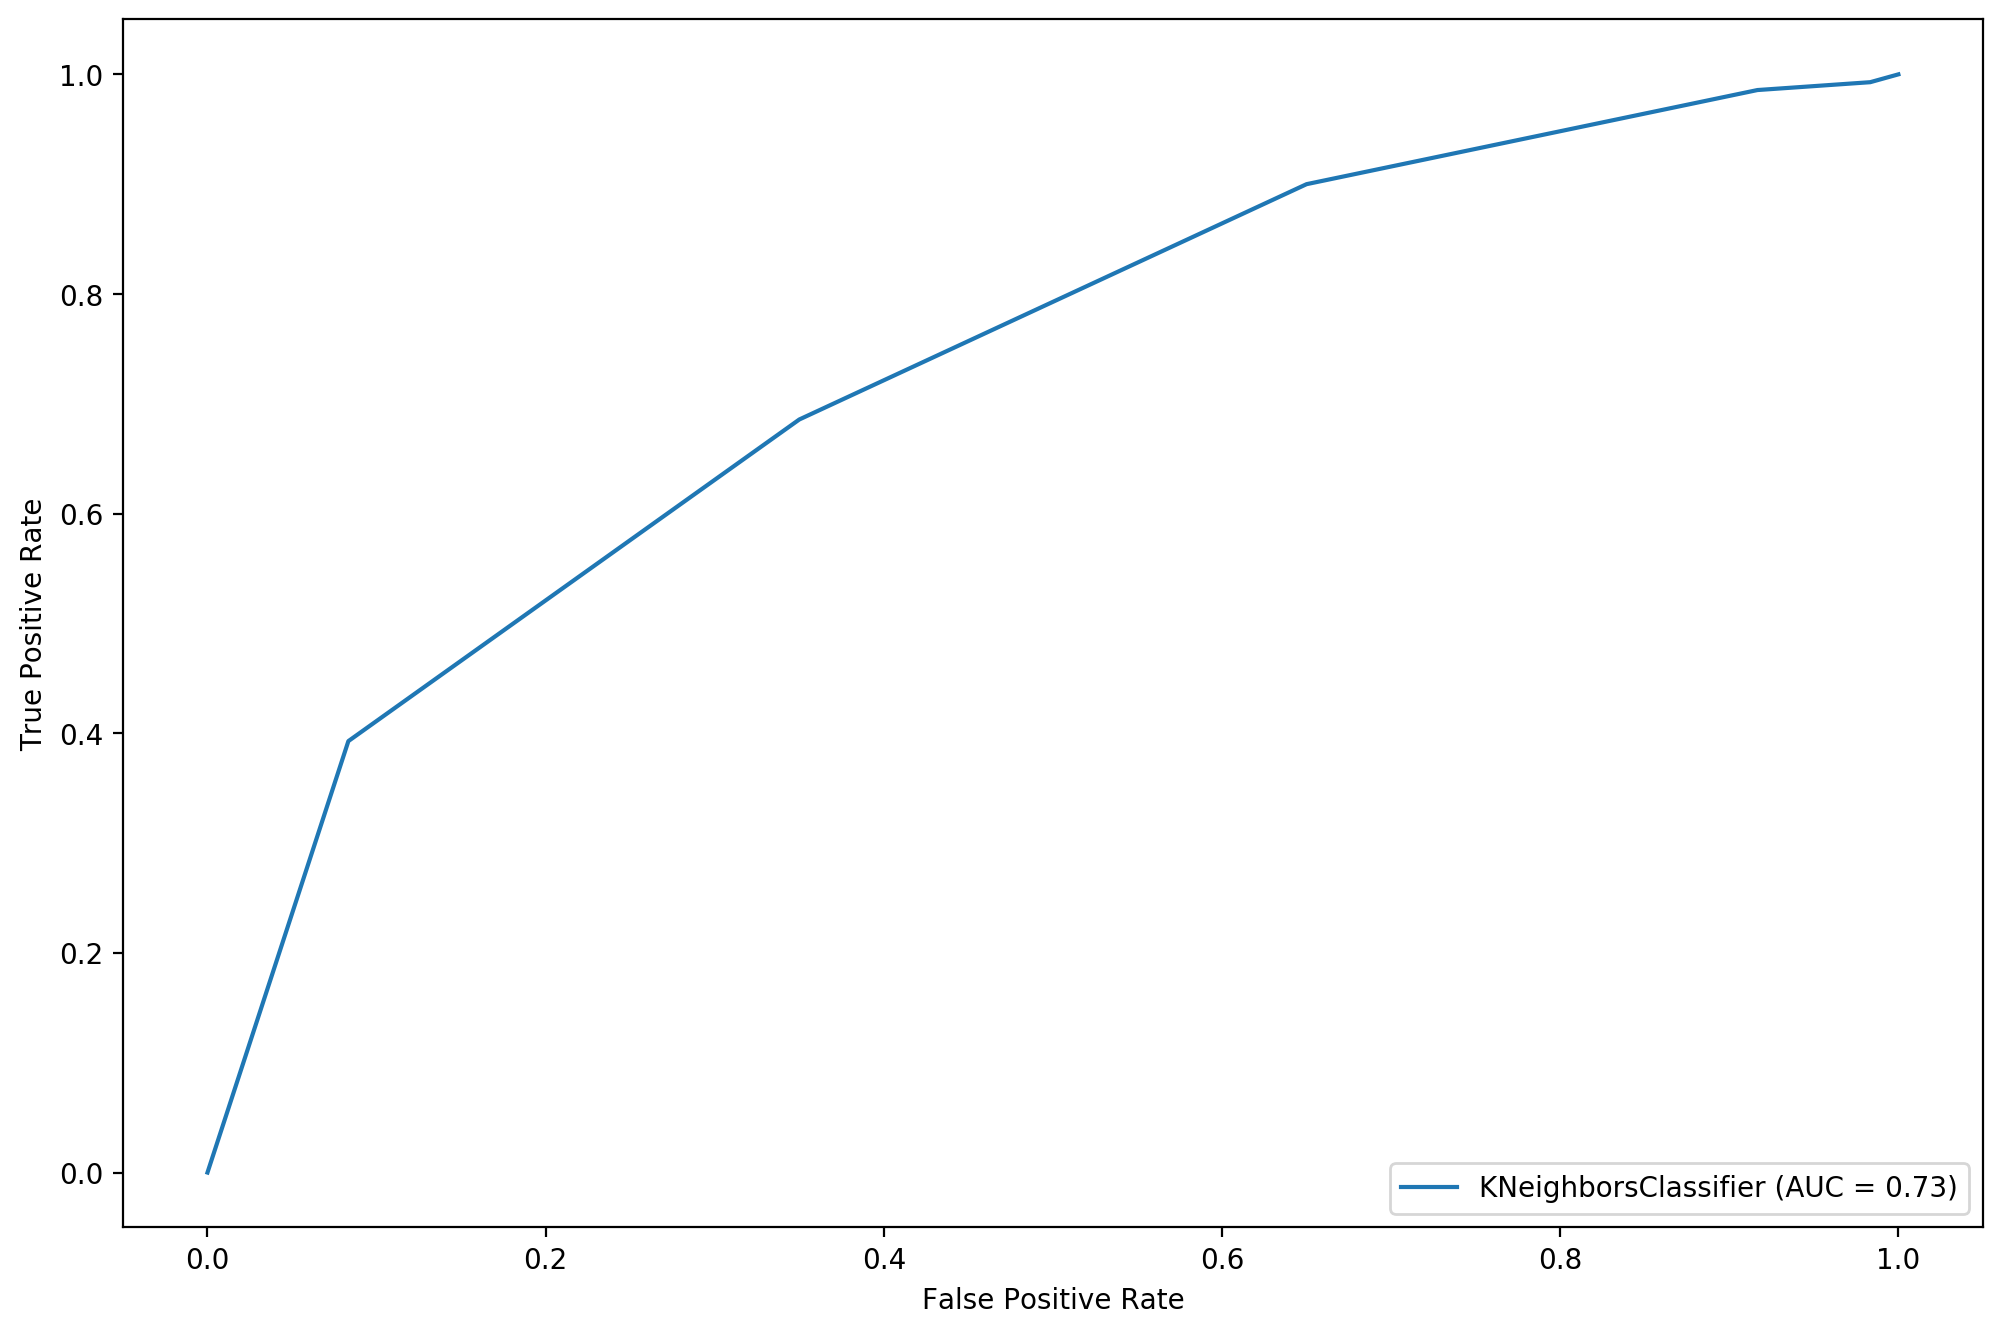

In [287]:
fig,ax = plt.subplots(figsize=(12,8), dpi=200)

plot_roc_curve(knn_model_baseline, scaled_X_test, y_test, ax=ax)

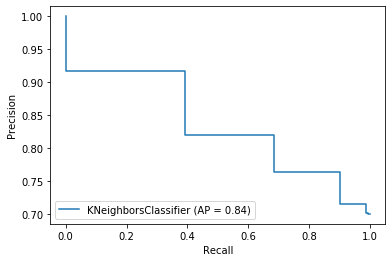

In [291]:
plot_precision_recall_curve(knn_model_baseline, scaled_X_test, y_test)

### SVC v1

In [8]:
from sklearn.svm import SVC

In [298]:
svc_model_baseline = SVC(kernel='linear',probability= True)

In [299]:
svc_model_baseline.fit(scaled_X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [300]:
y_pred = svc_model_baseline.predict(scaled_X_test)

In [301]:
y_pred_proba = svc_model_baseline.predict_proba(scaled_X_test)

In [302]:
y_pred

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1], dtype=int64)

In [303]:
y_pred_proba

array([[0.62359443, 0.37640557],
       [0.09368906, 0.90631094],
       [0.22034654, 0.77965346],
       [0.095261  , 0.904739  ],
       [0.75289204, 0.24710796],
       [0.14673064, 0.85326936],
       [0.49185293, 0.50814707],
       [0.71134997, 0.28865003],
       [0.27875273, 0.72124727],
       [0.05544586, 0.94455414],
       [0.3545546 , 0.6454454 ],
       [0.76422979, 0.23577021],
       [0.21685681, 0.78314319],
       [0.30858346, 0.69141654],
       [0.54602156, 0.45397844],
       [0.20317816, 0.79682184],
       [0.25726025, 0.74273975],
       [0.26074969, 0.73925031],
       [0.10198263, 0.89801737],
       [0.31524923, 0.68475077],
       [0.16809752, 0.83190248],
       [0.08322348, 0.91677652],
       [0.57496079, 0.42503921],
       [0.56935152, 0.43064848],
       [0.21672057, 0.78327943],
       [0.11832807, 0.88167193],
       [0.05050836, 0.94949164],
       [0.66274741, 0.33725259],
       [0.21898377, 0.78101623],
       [0.73595776, 0.26404224],
       [0.

In [304]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [305]:
accuracy_score(y_test, y_pred)

0.78

In [308]:
recall_score(y_test, y_pred)

0.8642857142857143

In [309]:
confusion_matrix(y_test, y_pred)

array([[ 35,  25],
       [ 19, 121]], dtype=int64)

In [307]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.58      0.61        60
           1       0.83      0.86      0.85       140

    accuracy                           0.78       200
   macro avg       0.74      0.72      0.73       200
weighted avg       0.77      0.78      0.78       200



In [310]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

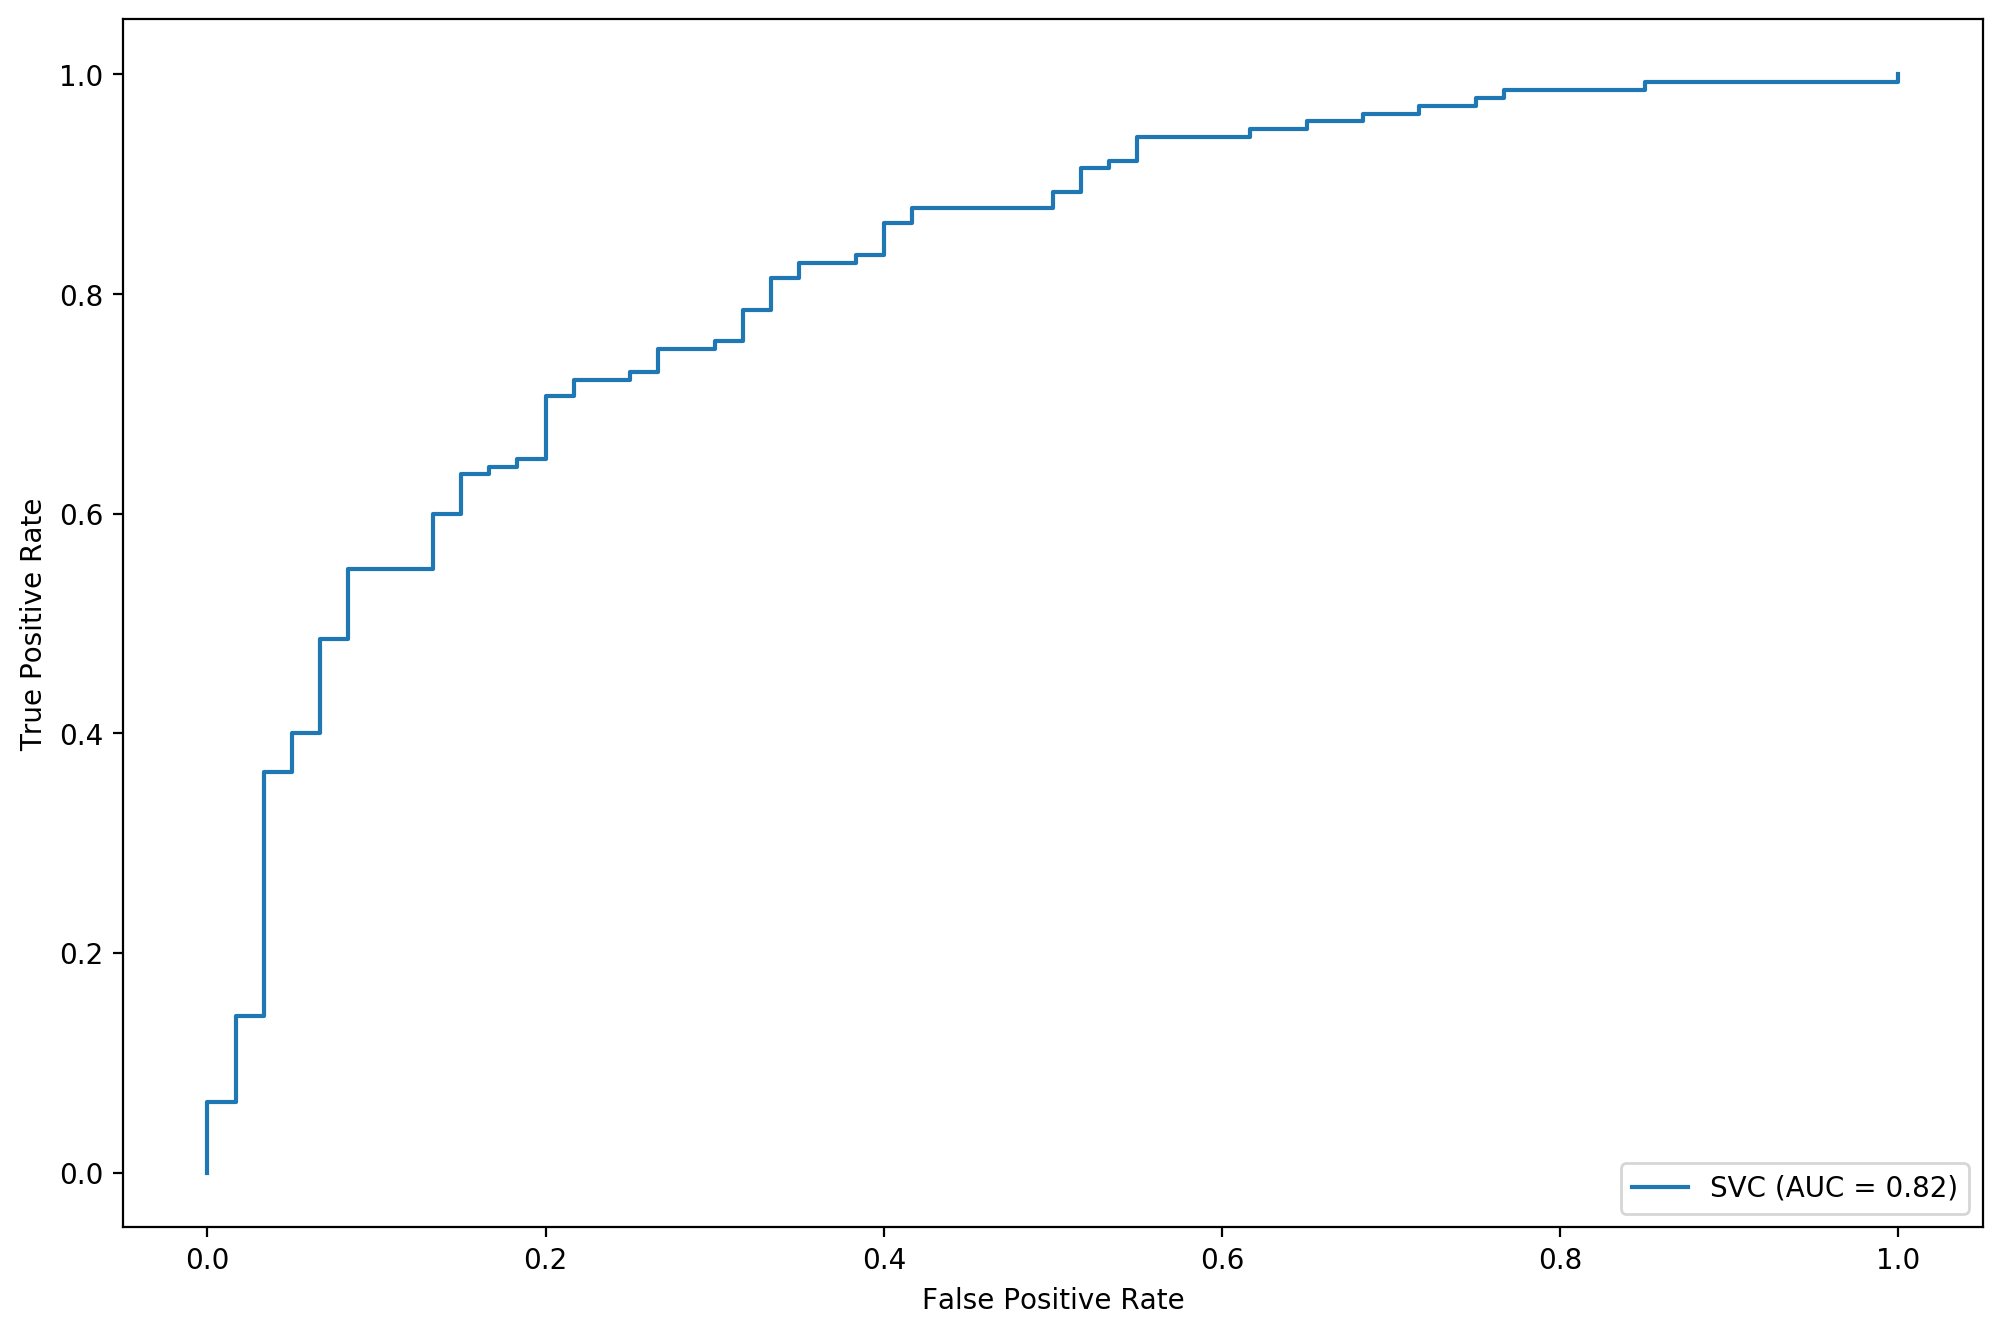

In [311]:
fig,ax = plt.subplots(figsize=(12,8), dpi=200)

plot_roc_curve(svc_model_baseline, scaled_X_test, y_test, ax=ax)

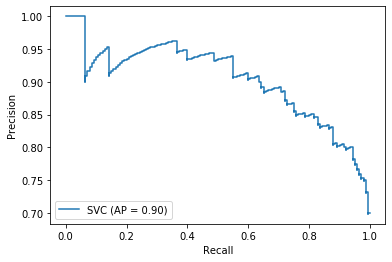

In [312]:
plot_precision_recall_curve(svc_model_baseline, scaled_X_test, y_test)

### Features Selection

In [61]:
df_eval.head()

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,altersgruppe,zahlung pro monat
0,1,1,18,4,2,1049,1,2,4,2,...,21,3,1,1,3,1,1,1,Young Adults,58.277778
1,1,1,9,4,0,2799,1,3,2,3,...,36,3,1,2,3,2,1,1,Adults,311.000000
2,1,2,12,2,9,841,2,4,2,2,...,23,3,1,1,2,1,1,1,Young Adults,70.083333
3,1,1,12,4,0,2122,1,3,3,3,...,39,3,1,2,2,2,1,2,Adults,176.833333
4,1,1,12,4,0,2171,1,3,4,3,...,38,1,2,2,2,1,1,2,Adults,180.916667


In [62]:
X = df_eval.drop('kredit', axis=1)
y = df_eval['kredit']

In [63]:
X.columns

Index(['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'altersgruppe',
       'zahlung pro monat'],
      dtype='object')

In [64]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: kredit, Length: 1000, dtype: int64

#### bevor OHE und Scaling

#### Correlation Matrix

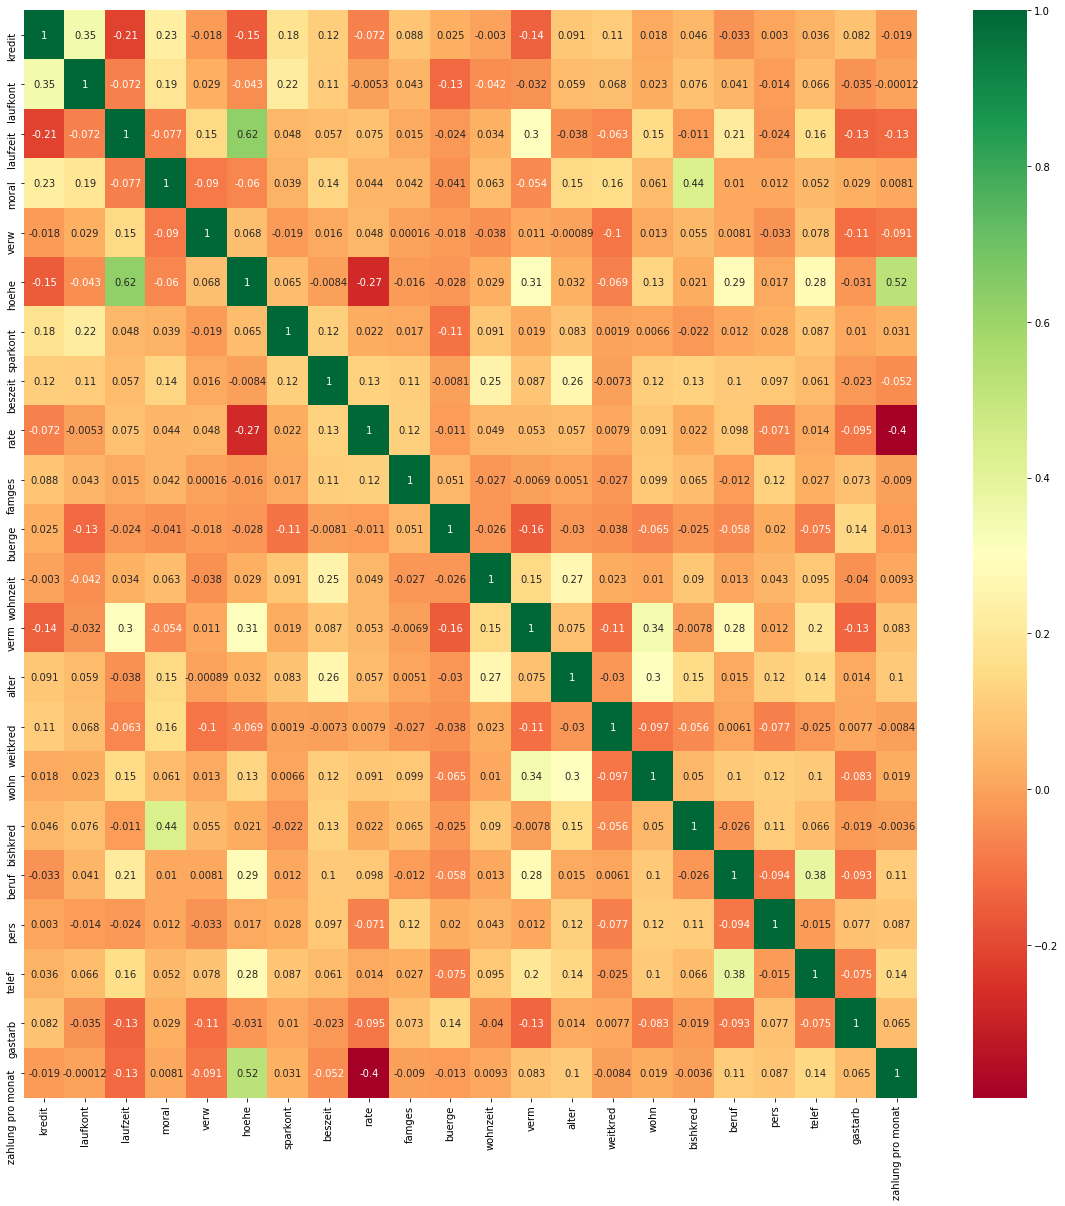

In [129]:
# Correlation Matrix

# Bei Correlatiion Matrix wird das Object type Features nicht angennomen.
# Und eigentlich wird Correlation Matrix nich für Categorical oder Ordinal Features geeignet.

corrmat = df_eval.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_eval[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### Nachdem OHE und Scaling

In [65]:
categorical_columns = ['laufkont', 'moral', 'verw', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'altersgruppe']

numerical_columns = ['laufzeit', 'hoehe', 'alter', 'zahlung pro monat']

X_cat = df_eval[categorical_columns]
X_num = df_eval[numerical_columns].values

In [66]:
X_cat.shape

(1000, 18)

In [67]:
X_num.shape

(1000, 4)

In [68]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [69]:
# One Hot Encoder before split

ohe = OneHotEncoder(sparse=False)
ohe.fit(X_cat)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [70]:
X_cat = ohe.transform(X_cat)

In [71]:
X_cat.shape, X_num.shape

((1000, 72), (1000, 4))

In [72]:
X = np.hstack((X_cat, X_num))

In [73]:
X.shape

(1000, 76)

In [118]:
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.04900000e+03, 2.10000000e+01, 5.82777778e+01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.79900000e+03, 3.60000000e+01, 3.11000000e+02],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        8.41000000e+02, 2.30000000e+01, 7.00833333e+01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.26800000e+04, 3.00000000e+01, 6.03809524e+02],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        6.46800000e+03, 5.20000000e+01, 5.39000000e+02],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.35000000e+03, 3.10000000e+01, 2.11666667e+02]])

In [77]:
X_train[:, -4:]

array([[1.20000000e+01, 1.18500000e+03, 2.70000000e+01, 9.87500000e+01],
       [6.00000000e+00, 2.08000000e+03, 2.40000000e+01, 3.46666667e+02],
       [6.00000000e+00, 1.36100000e+03, 4.00000000e+01, 2.26833333e+02],
       ...,
       [2.00000000e+01, 4.27200000e+03, 2.40000000e+01, 2.13600000e+02],
       [1.20000000e+01, 1.39300000e+03, 4.70000000e+01, 1.16083333e+02],
       [2.40000000e+01, 7.81400000e+03, 3.80000000e+01, 3.25583333e+02]])

In [74]:
# scaling after split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [78]:
scaler = StandardScaler()
X_train[:, -4:] = scaler.fit_transform(X_train[:, -4:])

In [123]:
#scaled_X_train = scaler.fit_transform(X_train)

In [124]:
#scaled_X_test = scaler.transform(X_test)

#### Chi Quadrat

In [80]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [81]:
best_features = SelectKBest(chi2, k=10)

In [82]:
best_features.fit(X_train[:, :-4], y_train)

SelectKBest(k=10, score_func=<function chi2 at 0x0000026971ED4048>)

In [83]:
df_best_features = pd.DataFrame()

In [84]:
df_best_features['Features'] = np.hstack((ohe.get_feature_names(categorical_columns)))
df_best_features['Scores'] = best_features.scores_

In [86]:
df_best_features.sort_values(by='Scores', ascending=False).head(10)

,Features,Scores
3,laufkont_4,44.199148
0,laufkont_1,42.290959
5,moral_1,14.734694
8,moral_4,14.556391
23,sparkont_5,12.190476
4,moral_0,11.311987
19,sparkont_1,10.159122
22,sparkont_4,9.241758
67,gastarb_2,8.595238
47,verm_4,8.009524


##### X_train and X_test OH encoded, scaled, and only best features from categorical + all numerical value

In [87]:
X_train_cat = best_features.transform(X_train[:, :-4])

In [88]:
X_train_new = np.hstack((X_train_cat, X_train[:, -4:]))

In [89]:
X_train_new.shape

(800, 14)

In [90]:
X_test[:, -4:] = scaler.fit_transform(X_test[:, -4:])

In [91]:
X_test_cat = best_features.transform(X_test[:, :-4])

In [92]:
X_test_new = np.hstack((X_test_cat, X_test[:, -4:]))

In [93]:
X_test_new.shape

(200, 14)

### Evaluation

In [313]:
df_eval = df.copy(deep=True)

In [314]:
df_eval.head()

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,altersgruppe,zahlung pro monat
0,1,1,18,4,2,1049,1,2,4,2,...,21,3,1,1,3,1,1,1,Young Adults,58.277778
1,1,1,9,4,0,2799,1,3,2,3,...,36,3,1,2,3,2,1,1,Adults,311.000000
2,1,2,12,2,9,841,2,4,2,2,...,23,3,1,1,2,1,1,1,Young Adults,70.083333
3,1,1,12,4,0,2122,1,3,3,3,...,39,3,1,2,2,2,1,2,Adults,176.833333
4,1,1,12,4,0,2171,1,3,4,3,...,38,1,2,2,2,1,1,2,Adults,180.916667


In [316]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X = df.drop('kredit', axis=1)
y = df['kredit']

In [317]:
categorical_columns = ['laufkont', 'moral', 'verw', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'altersgruppe']

numerical_columns = ['laufzeit', 'hoehe', 'alter', 'zahlung pro monat']

X_cat = df[categorical_columns]
X_num = df[numerical_columns].values

In [318]:
# One Hot Encoder before split

ohe = OneHotEncoder()
ohe.fit(X_cat)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [319]:
X_cat = ohe.transform(X_cat).toarray()

In [320]:
X = np.hstack((X_cat, X_num))

In [321]:
X.shape

(1000, 76)

In [322]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [323]:
scaler = StandardScaler()

In [324]:
scaled_X_train = scaler.fit_transform(X_train)

In [325]:
scaled_X_test = scaler.transform(X_test)

In [23]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kFoldCV = KFold(n_splits=5,shuffle=True,random_state=4)


#### Logistic Regression with K-Fold

In [327]:
logit_model_kf = LogisticRegression()

In [328]:
scores = cross_val_score(logit_model_kf, scaled_X_train, y_train, scoring="accuracy", cv= kFoldCV)

In [329]:
scores

array([0.75  , 0.725 , 0.75  , 0.7375, 0.725 ])

In [330]:
scores.mean()

0.7375

In [332]:
logit_model_kf.fit(scaled_X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [333]:
y_final_test_pred = logit_model_kf.predict(scaled_X_test)

In [334]:
accuracy_score(y_test, y_final_test_pred)

0.8

In [335]:
y_final_test_pred_proba = logit_model_kf.predict_proba(scaled_X_test)

In [337]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import plot_confusion_matrix

In [338]:
confusion_matrix(y_test, y_final_test_pred)

array([[ 37,  23],
       [ 17, 123]], dtype=int64)

In [339]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        60
           1       0.84      0.88      0.86       140

    accuracy                           0.80       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.80      0.80      0.80       200



In [341]:
roc_auc_score(y_test, y_final_test_pred_proba[:,1])

0.8244047619047619

In [342]:
precision_score(y_test, y_final_test_pred)

0.8424657534246576

In [343]:
recall_score(y_test, y_final_test_pred)

0.8785714285714286

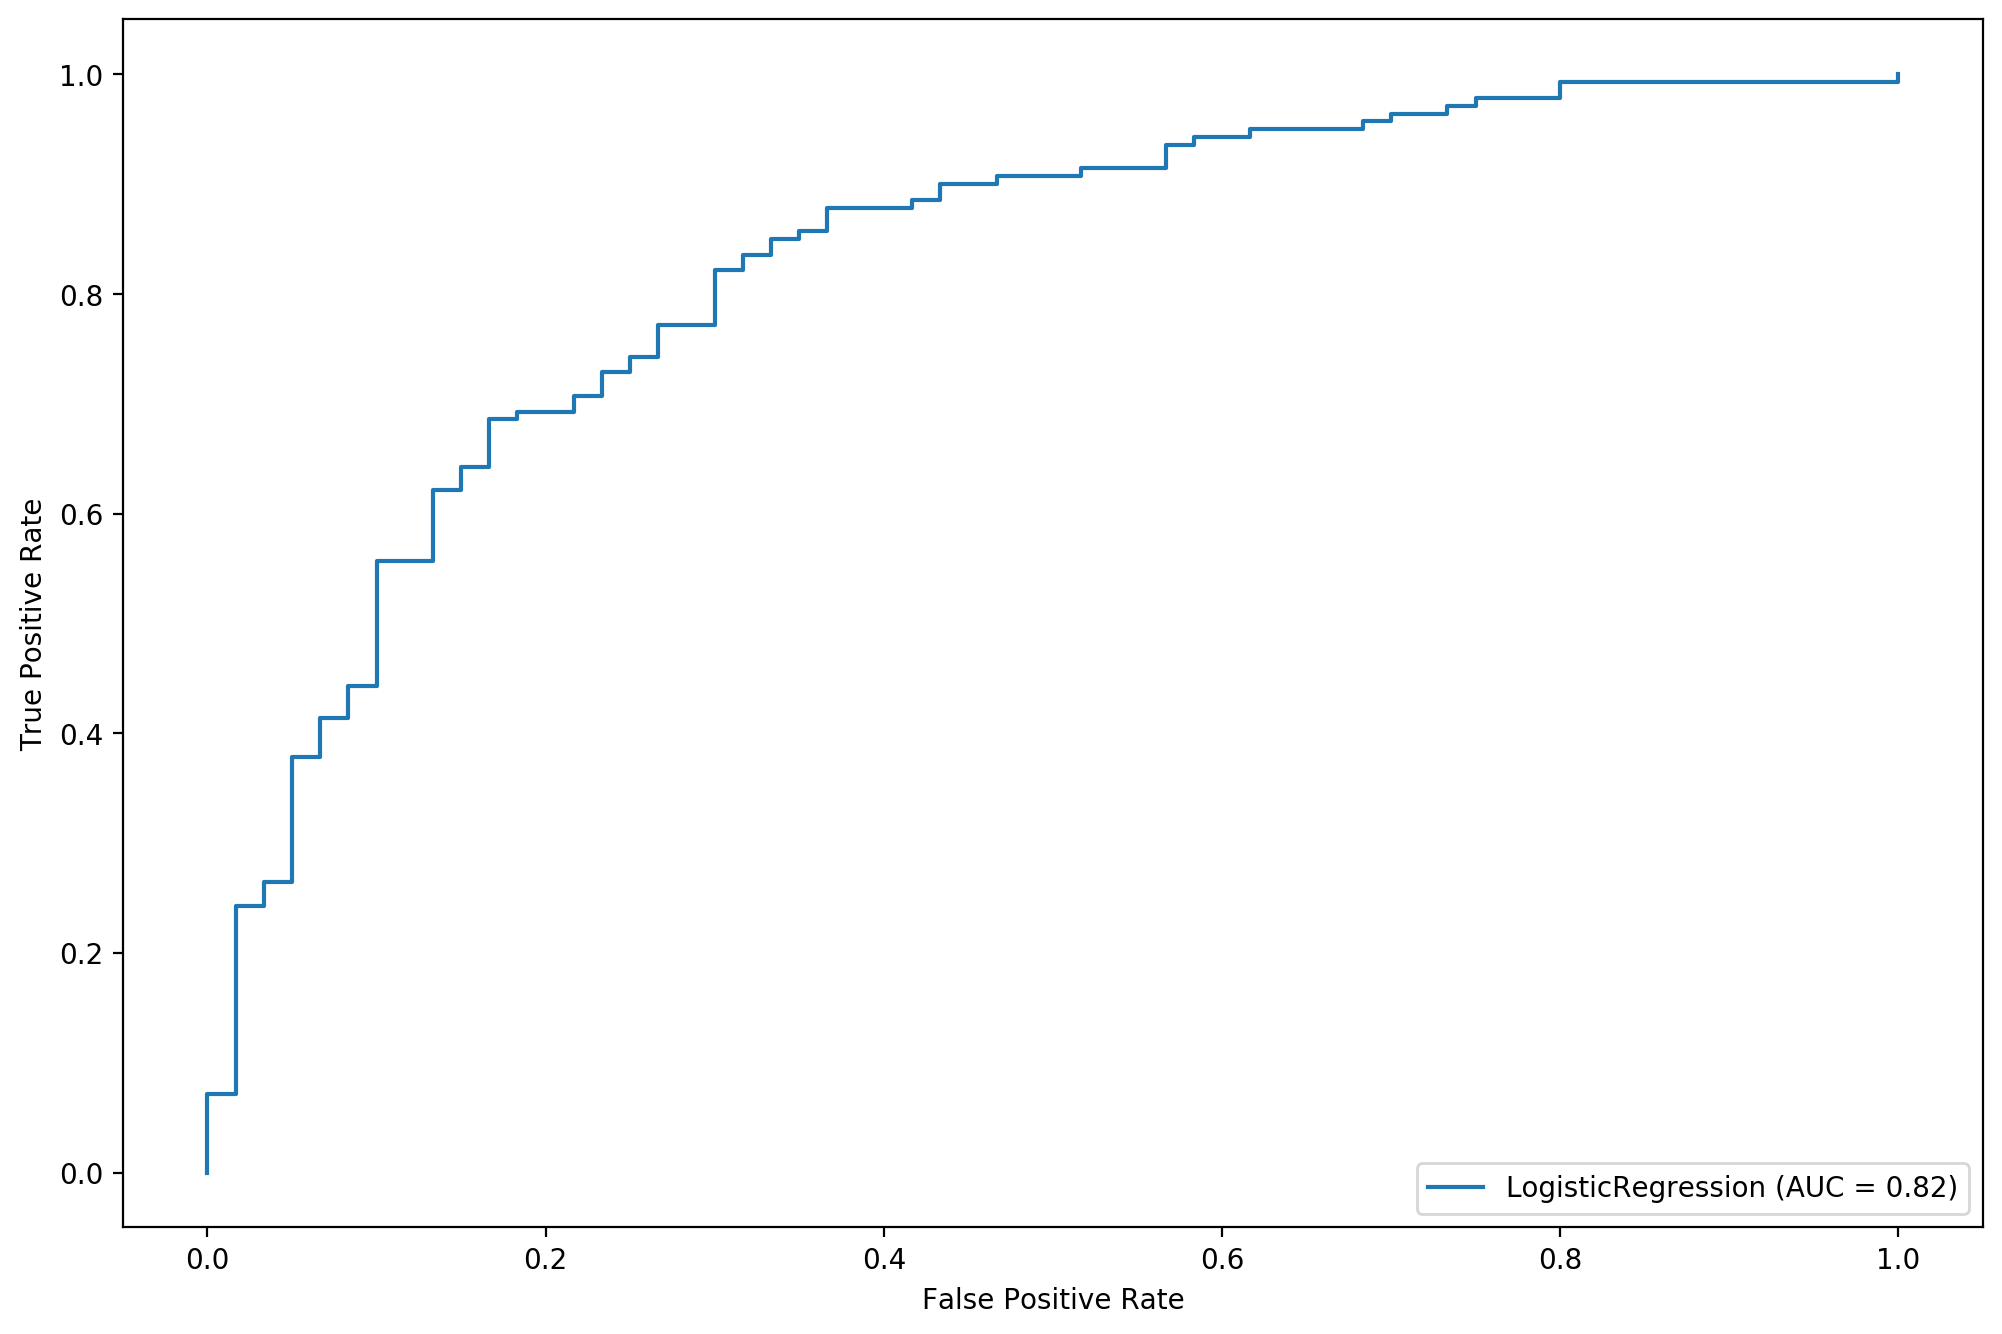

In [344]:
fig,ax = plt.subplots(figsize=(12,8), dpi=200)

plot_roc_curve(logit_model_kf, scaled_X_test, y_test, ax=ax)

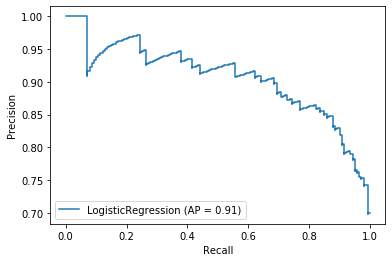

In [345]:
plot_precision_recall_curve(logit_model_kf, scaled_X_test, y_test)

#### K-Nearest Neighbors with K-Fold

In [346]:
knn_model_kf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [347]:
scores_knn = cross_val_score(knn_model_kf, scaled_X_train, y_train, scoring="accuracy", cv= kFoldCV)

In [348]:
scores_knn

array([0.69375, 0.7    , 0.73125, 0.7125 , 0.75625])

In [349]:
scores_knn.mean()

0.71875

In [350]:
knn_model_kf.fit(scaled_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [351]:
y_final_test_pred = knn_model_kf.predict(scaled_X_test)

In [352]:
accuracy_score(y_test, y_final_test_pred)

0.735

In [353]:
y_final_test_pred_proba = knn_model_kf.predict_proba(scaled_X_test)

In [354]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import plot_confusion_matrix

In [355]:
confusion_matrix(y_test, y_final_test_pred)

array([[ 21,  39],
       [ 14, 126]], dtype=int64)

In [356]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.60      0.35      0.44        60
           1       0.76      0.90      0.83       140

    accuracy                           0.73       200
   macro avg       0.68      0.62      0.63       200
weighted avg       0.71      0.73      0.71       200



In [357]:
roc_auc_score(y_test, y_final_test_pred_proba[:,1])

0.7320238095238096

In [358]:
precision_score(y_test, y_final_test_pred)

0.7636363636363637

In [359]:
recall_score(y_test, y_final_test_pred)

0.9

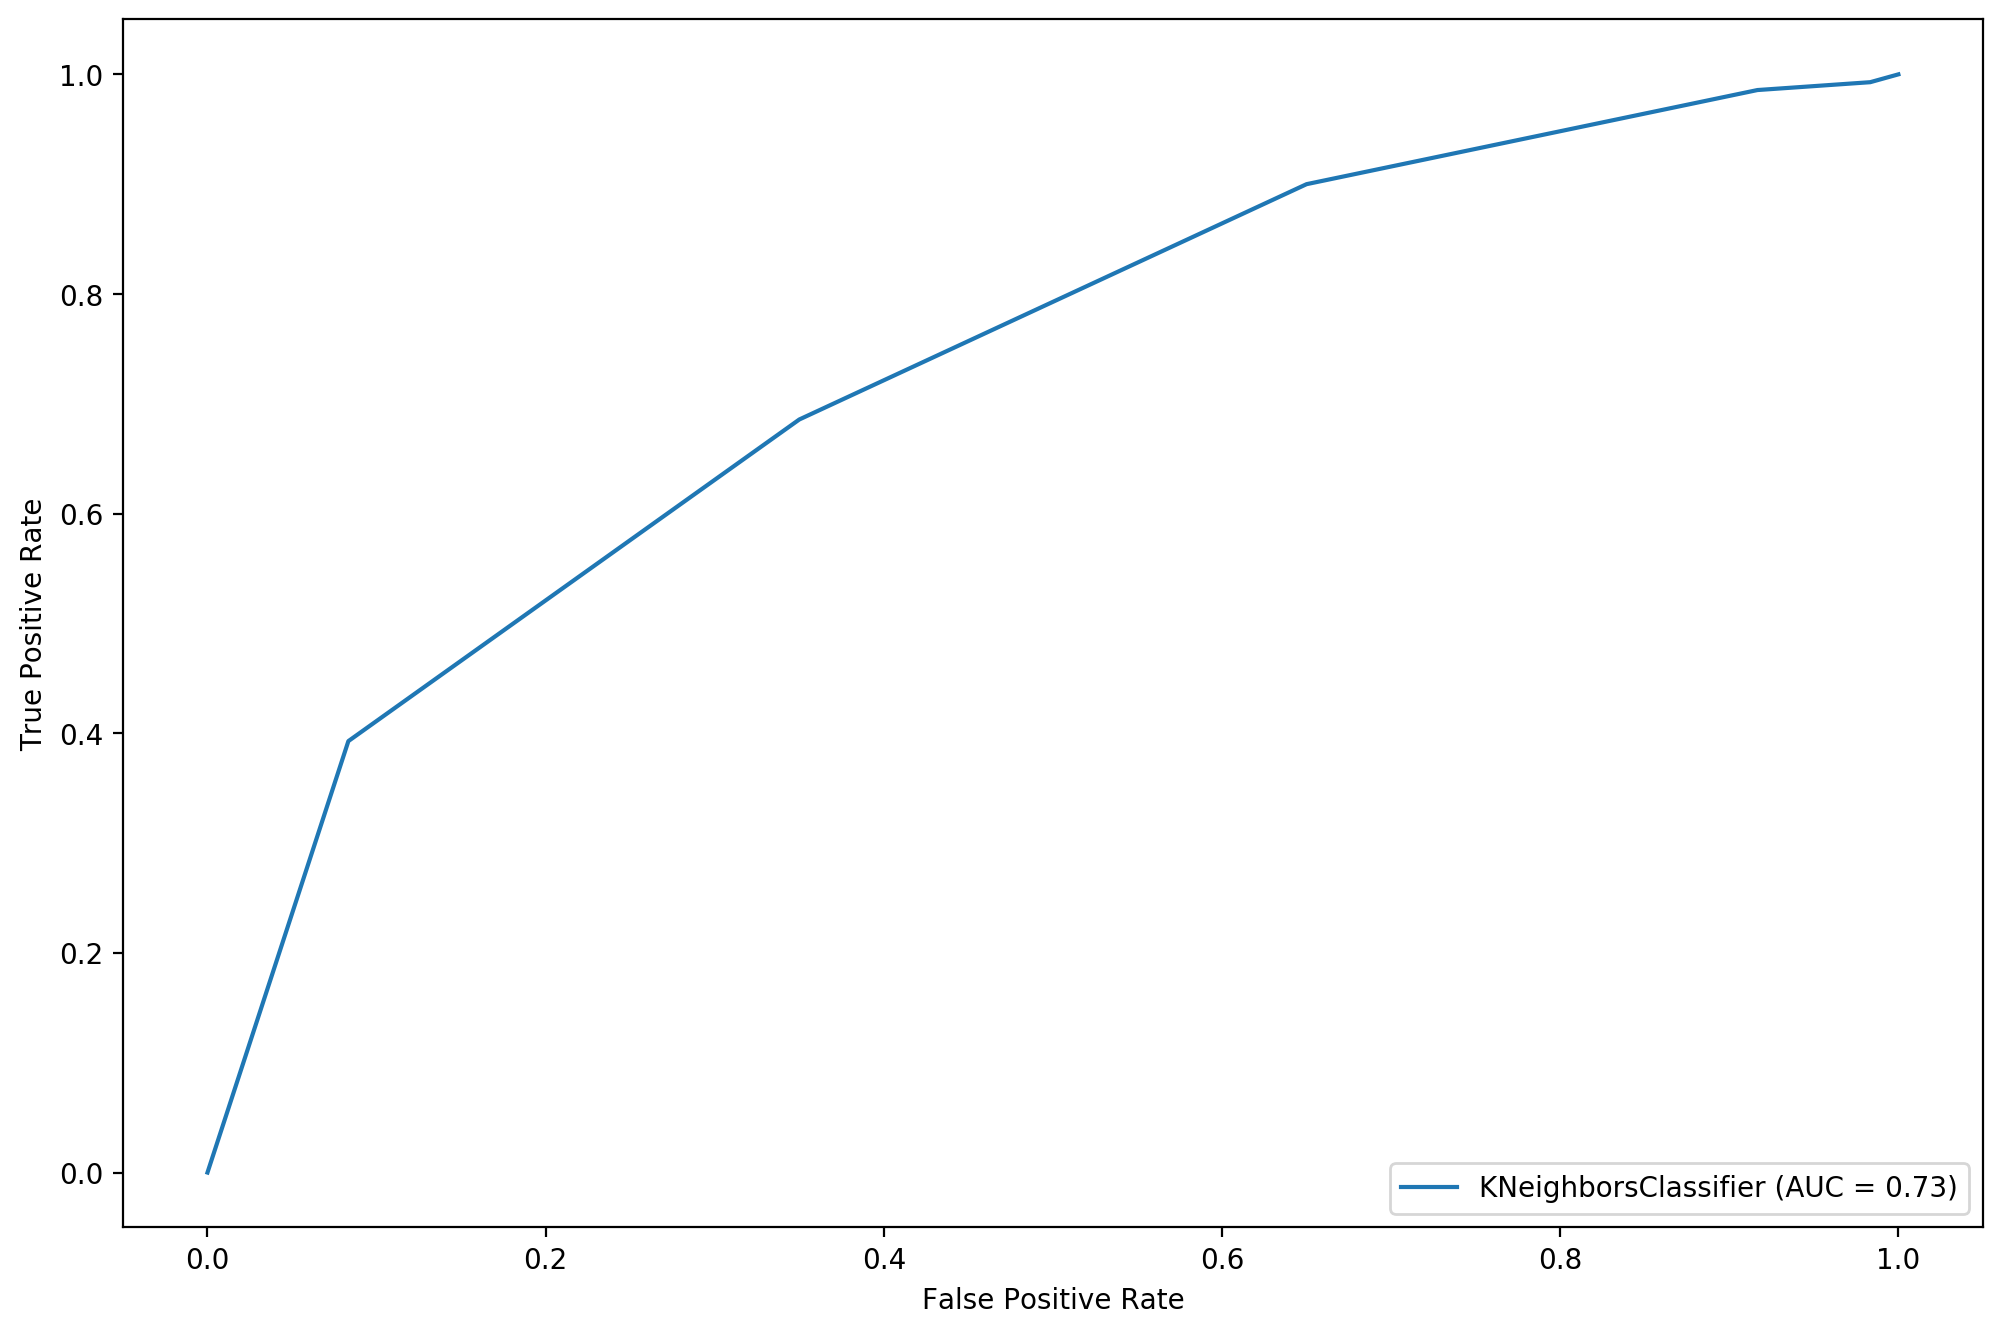

In [360]:
fig,ax = plt.subplots(figsize=(12,8), dpi=200)

plot_roc_curve(knn_model_kf, scaled_X_test, y_test, ax=ax)

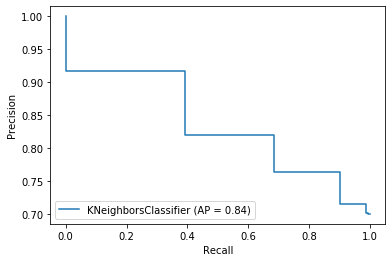

In [361]:
plot_precision_recall_curve(knn_model_kf, scaled_X_test, y_test)

#### SVC with K-Fold

In [362]:
svc_model_kf = SVC(kernel='linear',probability= True)

In [363]:
scores_svc = cross_val_score(svc_model_kf, scaled_X_train, y_train, scoring="accuracy", cv= kFoldCV)

In [364]:
scores_svc

array([0.74375, 0.70625, 0.74375, 0.7125 , 0.75625])

In [365]:
scores_svc.mean()

0.7325

In [366]:
svc_model_kf.fit(scaled_X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [367]:
y_final_test_pred = svc_model_kf.predict(scaled_X_test)

In [368]:
accuracy_score(y_test, y_final_test_pred)

0.78

In [369]:
y_final_test_pred_proba = svc_model_kf.predict_proba(scaled_X_test)

In [370]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import plot_confusion_matrix

In [371]:
confusion_matrix(y_test, y_final_test_pred)

array([[ 35,  25],
       [ 19, 121]], dtype=int64)

In [372]:
print(classification_report(y_test, y_final_test_pred))

              precision    recall  f1-score   support

           0       0.65      0.58      0.61        60
           1       0.83      0.86      0.85       140

    accuracy                           0.78       200
   macro avg       0.74      0.72      0.73       200
weighted avg       0.77      0.78      0.78       200



In [373]:
roc_auc_score(y_test, y_final_test_pred_proba[:,1])

0.8192857142857144

In [374]:
precision_score(y_test, y_final_test_pred)

0.8287671232876712

In [375]:
recall_score(y_test, y_final_test_pred)

0.8642857142857143

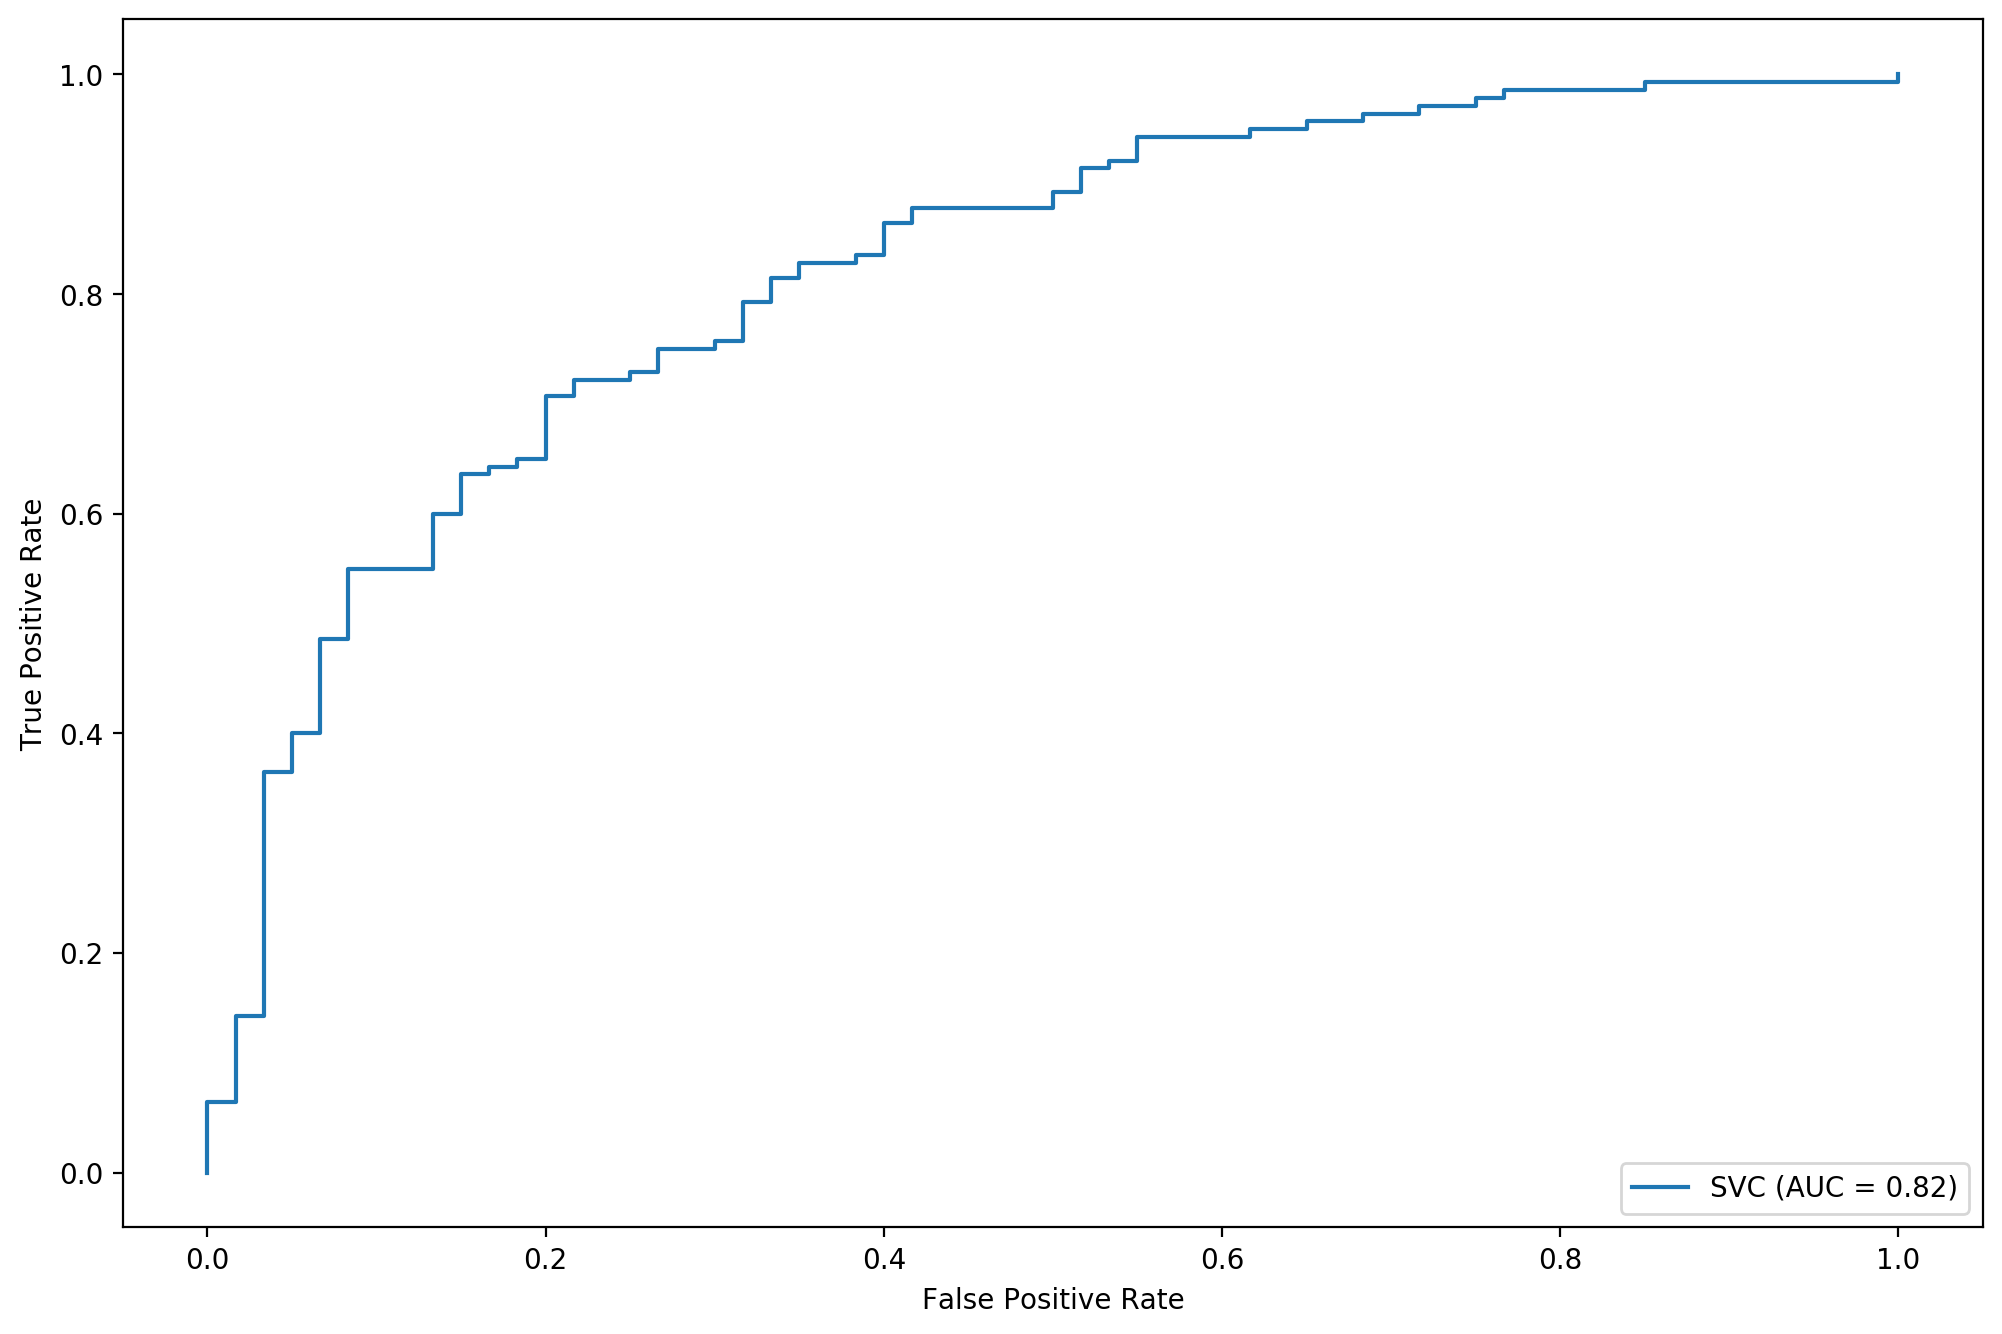

In [376]:
fig,ax = plt.subplots(figsize=(12,8), dpi=200)

plot_roc_curve(svc_model_kf, scaled_X_test, y_test, ax=ax)

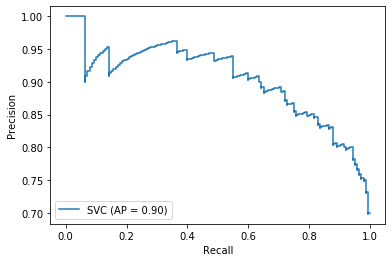

In [377]:
plot_precision_recall_curve(svc_model_kf, scaled_X_test, y_test)

### GridSearch CV

In [9]:
df_eval_grid = df.copy(deep=True)

In [10]:
df_eval_grid.head()

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,altersgruppe,zahlung pro monat
0,1,1,18,4,2,1049,1,2,4,2,...,21,3,1,1,3,1,1,1,Young Adults,58.277778
1,1,1,9,4,0,2799,1,3,2,3,...,36,3,1,2,3,2,1,1,Adults,311.000000
2,1,2,12,2,9,841,2,4,2,2,...,23,3,1,1,2,1,1,1,Young Adults,70.083333
3,1,1,12,4,0,2122,1,3,3,3,...,39,3,1,2,2,2,1,2,Adults,176.833333
4,1,1,12,4,0,2171,1,3,4,3,...,38,1,2,2,2,1,1,2,Adults,180.916667


In [11]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X = df_eval_grid.drop('kredit', axis=1)
y = df_eval_grid['kredit']

In [12]:
categorical_columns = ['laufkont', 'moral', 'verw', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'altersgruppe']

numerical_columns = ['laufzeit', 'hoehe', 'alter', 'zahlung pro monat']

X_cat = df_eval_grid[categorical_columns]
X_num = df_eval_grid[numerical_columns].values

In [13]:
# One Hot Encoder before split

ohe = OneHotEncoder()
ohe.fit(X_cat)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [14]:
X_cat = ohe.transform(X_cat).toarray()

In [15]:
X = np.hstack((X_cat, X_num))

In [16]:
X.shape

(1000, 76)

In [17]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
scaler = StandardScaler()

In [19]:
scaled_X_train = scaler.fit_transform(X_train)

In [20]:
scaled_X_test = scaler.transform(X_test)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report, recall_score, precision_score, plot_roc_curve

#### Logistic Regression 

In [400]:
kFoldCV = KFold(n_splits=5,shuffle=True,random_state=4)

In [401]:
param_test_logit = {'C':np.linspace(0.1,5.0),
             'solver':['newton-cg', 'lbfgs', 'sag', 'saga','liblinear'],
             'penalty':['l1','l2']
             }

In [402]:
logit_grid = LogisticRegression()

In [403]:
grid_model_logit = GridSearchCV(estimator = logit_grid,
                               param_grid = param_test_logit,
                               cv = kFoldCV,
                               scoring = 'accuracy',
                               verbose = 2)

In [404]:
grid_model_logit.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[CV] C=0.1, penalty=l1, solver=newton-cg .............................
[CV] .............. C=0.1, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.1, penalty=l1, solver=newton-cg .............................
[CV] .............. C=0.1, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.1, penalty=l1, solver=newton-cg .............................
[CV] .............. C=0.1, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.1, penalty=l1, solver=newton-cg .............................
[CV] .............. C=0.1, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.1, penalty=l1, solver=newton-cg .............................
[CV] .............. C=0.1, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.1, penalty=l1, solver=lbfgs .................................
[CV] .................. C=0.1, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=0.1, penalty=l1, solver=lbfgs .................................
[CV] ........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solv

[CV] ................... C=0.1, penalty=l1, solver=saga, total=   0.0s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.1, penalty=l2, solver=newton-cg .............................
[CV] .............. C=0.1, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.1, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceW

[CV] ................... C=0.2, penalty=l1, solver=saga, total=   0.0s
[CV] C=0.2, penalty=l1, solver=saga ..................................
[CV] ................... C=0.2, penalty=l1, solver=saga, total=   0.0s
[CV] C=0.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.2, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.



[CV] ................... C=0.2, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.30000000000000004, penalty=l1, solver=newton-cg .............
[CV]  C=0.30000000000000004, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.30000000000000004, penalty=l1, solver=newton-cg .............
[CV]

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ... C=0.30000000000000004, penalty=l1, solver=saga, total=   0.0s
[CV] C=0.30000000000000004, penalty=l1, solver=saga ..................
[CV] ... C=0.30000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.30000000000000004, penalty=l1, solver=saga ..................
[CV] ... C=0.30000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.30000000000000004, penalty=l1, solver=liblinear .............
[CV]  C=0.30000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.30000000000000004, penalty=l1, solver=liblinear .............
[CV]  C=0.30000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.30000000000000004, penalty=l1, solver=liblinear .............
[CV]  C=0.30000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.30000000000000004, penalty=l1, solver=liblinear .............
[CV]  C=0.30000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.30000000000000004, penalty=l1, solver=liblinear ............

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



[CV] C=0.30000000000000004, penalty=l2, solver=lbfgs .................
[CV] .. C=0.30000000000000004, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.30000000000000004, penalty=l2, solver=lbfgs .................
[CV] .. C=0.30000000000000004, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.30000000000000004, penalty=l2, solver=lbfgs .................
[CV] .. C=0.30000000000000004, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.30000000000000004, penalty=l2, solver=lbfgs .................
[CV] .. C=0.30000000000000004, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.30000000000000004, penalty=l2, solver=lbfgs .................
[CV] .. C=0.30000000000000004, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.30000000000000004, penalty=l2, solver=sag ...................
[CV] .... C=0.30000000000000004, penalty=l2, solver=sag, total=   0.0s
[CV] C=0.30000000000000004, penalty=l2, solver=sag ...................
[CV] .... C=0.30000000000000004, penalty=l2, solver=sag, total=   0.0s
[CV] 

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

[CV] ... C=0.30000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.30000000000000004, penalty=l2, solver=saga ..................
[CV] ... C=0.30000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.30000000000000004, penalty=l2, solver=saga ..................
[CV] ... C=0.30000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.30000000000000004, penalty=l2, solver=saga ..................
[CV] ... C=0.30000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.30000000000000004, penalty=l2, solver=liblinear .............
[CV]  C=0.30000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.30000000000000004, penalty=l2, solver=liblinear .............
[CV]  C=0.30000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.30000000000000004, penalty=l2, solver=liblinear .............
[CV]  C=0.30000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.30000000000000004, penalty=l2, solver=liblinear .............


E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", Conver

[CV] ................... C=0.4, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.4, penalty=l1, solver=saga ..................................
[CV] ................... C=0.4, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.4, penalty=l1, solver=saga ..................................
[CV] ................... C=0.4, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.4, penalty=l1, solver=saga ..................................
[CV] ................... C=0.4, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.4, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.4, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.4, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.4, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.4, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.4, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.4, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.4, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.4, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.4, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.4, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.4, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.4, penalty=l2, solver=newton-cg .............................
[CV] .............. C=0.4, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.4, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.4, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.4, penalty=l2, solver=saga ..................................
[CV] ................... C=0.4, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.4, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.4, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.4, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.4, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.4, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.4, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.4, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.4, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.4, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.4, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.5, penalty=l1, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceW

[CV] ................... C=0.5, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.5, penalty=l1, solver=saga ..................................
[CV] ................... C=0.5, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.5, penalty=l1, solver=saga ..................................
[CV] ................... C=0.5, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.5, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.5, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.5, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.5, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.5, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.5, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.5, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.5, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.5, penalty=l1, solver=liblinear .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



[CV] C=0.5, penalty=l2, solver=newton-cg .............................
[CV] .............. C=0.5, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.5, penalty=l2, solver=lbfgs .................................
[CV] .................. C=0.5, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.5, penalty=l2, solver=lbfgs .................................
[CV] .................. C=0.5, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.5, penalty=l2, solver=lbfgs .................................
[CV] .................. C=0.5, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.5, penalty=l2, solver=lbfgs .................................
[CV] .................. C=0.5, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.5, penalty=l2, solver=lbfgs .................................
[CV] .................. C=0.5, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.5, penalty=l2, solver=sag ...................................
[CV] .................... C=0.5, penalty=l2, solver=sag, total=   0.0s
[CV] 

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] ................... C=0.5, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.5, penalty=l2, solver=saga ..................................
[CV] ................... C=0.5, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.5, penalty=l2, solver=saga ..................................
[CV] ................... C=0.5, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.5, penalty=l2, solver=saga ..................................
[CV] ................... C=0.5, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.5, penalty=l2, solver=saga ..................................
[CV] ................... C=0.5, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.5, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.5, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.5, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.5, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.5, penalty=l2, solver=liblinear .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", Conver

[CV] ................... C=0.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.6, penalty=l1, solver=saga ..................................
[CV] ................... C=0.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.6, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] ................... C=0.6, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.6, penalty=l2, solver=saga ..................................
[CV] ................... C=0.6, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.6, penalty=l2, solver=saga ..................................
[CV] ................... C=0.6, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.6, penalty=l2, solver=saga ..................................
[CV] ................... C=0.6, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.6, penalty=l2, solver=saga ..................................
[CV] ................... C=0.6, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.6, penalty=l2, solver=liblinear .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", Conver

[CV] .... C=0.7000000000000001, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.7000000000000001, penalty=l1, solver=saga ...................
[CV] .... C=0.7000000000000001, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.7000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=0.7000000000000001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.7000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=0.7000000000000001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.7000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=0.7000000000000001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.7000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=0.7000000000000001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.7000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=0.7000000000000001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.7000000000000001, penalty=l2, solver=newton-cg ..............
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] .... C=0.7000000000000001, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.7000000000000001, penalty=l2, solver=saga ...................
[CV] .... C=0.7000000000000001, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.7000000000000001, penalty=l2, solver=saga ...................
[CV] .... C=0.7000000000000001, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.7000000000000001, penalty=l2, solver=saga ...................
[CV] .... C=0.7000000000000001, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.7000000000000001, penalty=l2, solver=saga ...................
[CV] .... C=0.7000000000000001, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.7000000000000001, penalty=l2, solver=liblinear ..............
[CV]  C=0.7000000000000001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.7000000000000001, penalty=l2, solver=liblinear ..............
[CV]  C=0.7000000000000001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.7000000000000001, penalty=l2, solver=liblinear ..............
[CV]

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", Conver

[CV] ................... C=0.8, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.8, penalty=l1, solver=saga ..................................
[CV] ................... C=0.8, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.8, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.8, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.8, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.8, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.8, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.8, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.8, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.8, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.8, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.8, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.8, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] ................... C=0.8, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.8, penalty=l2, solver=saga ..................................
[CV] ................... C=0.8, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.8, penalty=l2, solver=saga ..................................
[CV] ................... C=0.8, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.8, penalty=l2, solver=saga ..................................
[CV] ................... C=0.8, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.8, penalty=l2, solver=saga ..................................
[CV] ................... C=0.8, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.8, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.8, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.8, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.8, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.8, penalty=l2, solver=liblinear .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceW

[CV] ................... C=0.9, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.9, penalty=l1, solver=saga ..................................
[CV] ................... C=0.9, penalty=l1, solver=saga, total=   0.1s
[CV] C=0.9, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.9, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.9, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.9, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.9, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.9, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.9, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.9, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.9, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.9, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.9, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.9, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.9, penalty=l2, solver=saga ..................................
[CV] ................... C=0.9, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.9, penalty=l2, solver=saga ..................................
[CV] ................... C=0.9, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.9, penalty=l2, solver=saga ..................................
[CV] ................... C=0.9, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.9, penalty=l2, solver=saga ..................................
[CV] ................... C=0.9, penalty=l2, solver=saga, total=   0.0s
[CV] C=0.9, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.9, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.9, penalty=l2, solver=liblinear .............................
[CV] .............. C=0.9, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.9, penalty=l2, solver=liblinear .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.



[CV] .............. C=1.0, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=1.0, penalty=l1, solver=newton-cg .............................
[CV] .............. C=1.0, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=1.0, penalty=l1, solver=newton-cg .............................
[CV] .............. C=1.0, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=1.0, penalty=l1, solver=newton-cg .............................
[CV] .............. C=1.0, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=1.0, penalty=l1, solver=newton-cg .............................
[CV] .............. C=1.0, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=1.0, penalty=l1, solver=lbfgs .................................
[CV] .................. C=1.0, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=1.0, penalty=l1, solver=lbfgs .................................
[CV] .................. C=1.0, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=1.0, penalty=l1, solver=lbfgs .................................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=1.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.0, penalty=l1, solver=saga ..................................
[CV] ................... C=1.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.0, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] ................... C=1.0, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.0, penalty=l2, solver=saga ..................................
[CV] ................... C=1.0, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.0, penalty=l2, solver=saga ..................................
[CV] ................... C=1.0, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.0, penalty=l2, solver=saga ..................................
[CV] ................... C=1.0, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.0, penalty=l2, solver=saga ..................................
[CV] ................... C=1.0, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=1.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=1.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.0, penalty=l2, solver=liblinear .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceW

[CV] ................... C=1.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.1, penalty=l1, solver=saga ..................................
[CV] ................... C=1.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.1, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=1.1, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.1, penalty=l2, solver=saga ..................................
[CV] ................... C=1.1, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.1, penalty=l2, solver=saga ..................................
[CV] ................... C=1.1, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.1, penalty=l2, solver=saga ..................................
[CV] ................... C=1.1, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.1, penalty=l2, solver=saga ..................................
[CV] ................... C=1.1, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=1.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=1.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.1, penalty=l2, solver=liblinear .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.



[CV] .............. C=1.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.2000000000000002, penalty=l1, solver=newton-cg ..............
[CV]  C=1.2000000000000002, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=1.2000000000000002, penalty=l1, solver=newton-cg ..............
[CV]  C=1.2000000000000002, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=1.2000000000000002, penalty=l1, solver=newton-cg ..............
[CV]  C=1.2000000000000002, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=1.2000000000000002, penalty=l1, solver=newton-cg ..............
[CV]  C=1.2000000000000002, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=1.2000000000000002, penalty=l1, solver=newton-cg ..............
[CV]  C=1.2000000000000002, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=1.2000000000000002, penalty=l1, solver=lbfgs ..................
[CV] ... C=1.2000000000000002, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=1.2000000000000002, penalty=l1, solver=lbfgs ..................
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.2000000000000002, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.2000000000000002, penalty=l1, solver=saga ...................
[CV] .... C=1.2000000000000002, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.2000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.2000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.2000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.2000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.2000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.2000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.2000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.2000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.2000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.2000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.2000000000000002, penalty=l2, solver=newton-cg ..............
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ..... C=1.2000000000000002, penalty=l2, solver=sag, total=   0.0s
[CV] C=1.2000000000000002, penalty=l2, solver=sag ....................
[CV] ..... C=1.2000000000000002, penalty=l2, solver=sag, total=   0.0s
[CV] C=1.2000000000000002, penalty=l2, solver=saga ...................
[CV] .... C=1.2000000000000002, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.2000000000000002, penalty=l2, solver=saga ...................
[CV] .... C=1.2000000000000002, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.2000000000000002, penalty=l2, solver=saga ...................
[CV] .... C=1.2000000000000002, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.2000000000000002, penalty=l2, solver=saga ...................
[CV] .... C=1.2000000000000002, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.2000000000000002, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.



[CV] .... C=1.2000000000000002, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.2000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.2000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.2000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.2000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.2000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.2000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.2000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.2000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.2000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.2000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.3000000000000003, penalty=l1, solver=newton-cg ..............
[CV]  C=1.3000000000000003, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=1.3000000000000003, penalty=l1, solver=newton-cg ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.3000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.3000000000000003, penalty=l1, solver=saga ...................
[CV] .... C=1.3000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=1.3000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=1.3000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=1.3000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=1.3000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=1.3000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.3000000000000003, penalty=l2, solver=newton-cg ..............
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



[CV] C=1.3000000000000003, penalty=l2, solver=sag ....................
[CV] ..... C=1.3000000000000003, penalty=l2, solver=sag, total=   0.0s
[CV] C=1.3000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=1.3000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.3000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=1.3000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.3000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=1.3000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.3000000000000003, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] .... C=1.3000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.3000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=1.3000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=1.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=1.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=1.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=1.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=1.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.4000000000000001, penalty=l1, solver=newton-cg ..............
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.4000000000000001, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.4000000000000001, penalty=l1, solver=saga ...................
[CV] .... C=1.4000000000000001, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.4000000000000001, penalty=l1, solver=saga ...................
[CV] .... C=1.4000000000000001, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.4000000000000001, penalty=l1, solver=saga ...................
[CV] .... C=1.4000000000000001, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.4000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=1.4000000000000001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.4000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=1.4000000000000001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.4000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=1.4000000000000001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.4000000000000001, penalty=l1, solver=liblinear ..............
[CV

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.4000000000000001, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.4000000000000001, penalty=l2, solver=saga ...................
[CV] .... C=1.4000000000000001, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.4000000000000001, penalty=l2, solver=saga ...................
[CV] .... C=1.4000000000000001, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.4000000000000001, penalty=l2, solver=saga ...................
[CV] .... C=1.4000000000000001, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.4000000000000001, penalty=l2, solver=liblinear ..............
[CV]  C=1.4000000000000001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.4000000000000001, penalty=l2, solver=liblinear ..............
[CV]  C=1.4000000000000001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.4000000000000001, penalty=l2, solver=liblinear ..............
[CV]  C=1.4000000000000001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.4000000000000001, penalty=l2, solver=liblinear ..............
[CV

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] .... C=1.5000000000000002, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.5000000000000002, penalty=l1, solver=saga ...................
[CV] .... C=1.5000000000000002, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.5000000000000002, penalty=l1, solver=saga ...................
[CV] .... C=1.5000000000000002, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.5000000000000002, penalty=l1, solver=saga ...................
[CV] .... C=1.5000000000000002, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.5000000000000002, penalty=l1, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.5000000000000002, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.5000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.5000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.5000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.5000000000000002, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=1.5000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.5000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.5000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.5000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.5000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.5000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.5000000000000002, penalty=l2, solver=newton-cg ..............
[CV]  C=1.5000000000000002, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=1.5000000000000002, penalty=l2, solver=newton-cg ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



[CV] C=1.5000000000000002, penalty=l2, solver=sag ....................
[CV] ..... C=1.5000000000000002, penalty=l2, solver=sag, total=   0.0s
[CV] C=1.5000000000000002, penalty=l2, solver=saga ...................
[CV] .... C=1.5000000000000002, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.5000000000000002, penalty=l2, solver=saga ...................
[CV] .... C=1.5000000000000002, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.5000000000000002, penalty=l2, solver=saga ...................
[CV] .... C=1.5000000000000002, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.5000000000000002, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] .... C=1.5000000000000002, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.5000000000000002, penalty=l2, solver=saga ...................
[CV] .... C=1.5000000000000002, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.5000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.5000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.5000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.5000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.5000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.5000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.5000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.5000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.5000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.5000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.6, penalty=l1, solver=newton-cg .............................
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=1.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.6, penalty=l1, solver=saga ..................................
[CV] ................... C=1.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.6, penalty=l1, solver=saga ..................................
[CV] ................... C=1.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.6, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=1.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=1.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.6, penalty=l1, solver=liblinear .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=1.6, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.6, penalty=l2, solver=saga ..................................
[CV] ................... C=1.6, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.6, penalty=l2, solver=saga ..................................
[CV] ................... C=1.6, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.6, penalty=l2, solver=saga ..................................
[CV] ................... C=1.6, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.6, penalty=l2, solver=saga ..................................
[CV] ................... C=1.6, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=1.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=1.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.6, penalty=l2, solver=liblinear .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] .............. C=1.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=1.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.7000000000000002, penalty=l1, solver=newton-cg ..............
[CV]  C=1.7000000000000002, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=1.7000000000000002, penalty=l1, solver=newton-cg ..............
[CV]  C=1.7000000000000002, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=1.7000000000000002, penalty=l1, solver=newton-cg ..............
[CV]  C=1.7000000000000002, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=1.7000000000000002, penalty=l1, solver=newton-cg ..............
[CV]  C=1.7000000000000002, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=1.7000000000000002, penalty=l1, solver=newton-cg ..............
[CV]  C=1.7000000000000002, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=1.7000000000000002, penalty=l1, solver=lbfgs ..................
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.7000000000000002, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.7000000000000002, penalty=l1, solver=saga ...................
[CV] .... C=1.7000000000000002, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.7000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.7000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.7000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.7000000000000002, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=1.7000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.7000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.7000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.7000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.7000000000000002, penalty=l1, solver=liblinear ..............
[CV]  C=1.7000000000000002, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.7000000000000002, penalty=l2, solver=newton-cg ..............
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] ..... C=1.7000000000000002, penalty=l2, solver=sag, total=   0.0s
[CV] C=1.7000000000000002, penalty=l2, solver=sag ....................
[CV] ..... C=1.7000000000000002, penalty=l2, solver=sag, total=   0.0s
[CV] C=1.7000000000000002, penalty=l2, solver=sag ....................
[CV] ..... C=1.7000000000000002, penalty=l2, solver=sag, total=   0.0s
[CV] C=1.7000000000000002, penalty=l2, solver=sag ....................
[CV] ..... C=1.7000000000000002, penalty=l2, solver=sag, total=   0.0s
[CV] C=1.7000000000000002, penalty=l2, solver=saga ...................
[CV] .... C=1.7000000000000002, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.7000000000000002, penalty=l2, solver=saga ...................
[CV] .... C=1.7000000000000002, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.7000000000000002, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] .... C=1.7000000000000002, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.7000000000000002, penalty=l2, solver=saga ...................
[CV] .... C=1.7000000000000002, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.7000000000000002, penalty=l2, solver=saga ...................
[CV] .... C=1.7000000000000002, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.7000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.7000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.7000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.7000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.7000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.7000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.7000000000000002, penalty=l2, solver=liblinear ..............
[CV]  C=1.7000000000000002, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.7000000000000002, penalty=l2, solver=liblinear ..............
[C

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.8000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.8000000000000003, penalty=l1, solver=saga ...................
[CV] .... C=1.8000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.8000000000000003, penalty=l1, solver=saga ...................
[CV] .... C=1.8000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.8000000000000003, penalty=l1, solver=saga ...................
[CV] .... C=1.8000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.8000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=1.8000000000000003, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=1.8000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=1.8000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.8000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=1.8000000000000003, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=1.8000000000000003, penalty=l1, solver=liblinear ..............
[CV

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



[CV] C=1.8000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=1.8000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.8000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=1.8000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.8000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=1.8000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.8000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=1.8000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.8000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=1.8000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.8000000000000003, penalty=l2, solver=liblinear ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV]  C=1.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=1.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=1.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=1.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=1.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.9000000000000001, penalty=l1, solver=newton-cg ..............
[CV]  C=1.9000000000000001, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=1.9000000000000001, penalty=l1, solver=newton-cg ..............
[CV]  C=1.9000000000000001, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=1.9000000000000001, penalty=l1, solver=newton-cg ..............

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=1.9000000000000001, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.9000000000000001, penalty=l1, solver=saga ...................
[CV] .... C=1.9000000000000001, penalty=l1, solver=saga, total=   0.1s
[CV] C=1.9000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=1.9000000000000001, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=1.9000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=1.9000000000000001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.9000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=1.9000000000000001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.9000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=1.9000000000000001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.9000000000000001, penalty=l1, solver=liblinear ..............
[CV]  C=1.9000000000000001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1.9000000000000001, penalty=l2, solver=newton-cg ..............
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] ..... C=1.9000000000000001, penalty=l2, solver=sag, total=   0.0s
[CV] C=1.9000000000000001, penalty=l2, solver=sag ....................
[CV] ..... C=1.9000000000000001, penalty=l2, solver=sag, total=   0.0s
[CV] C=1.9000000000000001, penalty=l2, solver=saga ...................
[CV] .... C=1.9000000000000001, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.9000000000000001, penalty=l2, solver=saga ...................
[CV] .... C=1.9000000000000001, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.9000000000000001, penalty=l2, solver=saga ...................
[CV] .... C=1.9000000000000001, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.9000000000000001, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] .... C=1.9000000000000001, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.9000000000000001, penalty=l2, solver=saga ...................
[CV] .... C=1.9000000000000001, penalty=l2, solver=saga, total=   0.0s
[CV] C=1.9000000000000001, penalty=l2, solver=liblinear ..............
[CV]  C=1.9000000000000001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.9000000000000001, penalty=l2, solver=liblinear ..............
[CV]  C=1.9000000000000001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.9000000000000001, penalty=l2, solver=liblinear ..............
[CV]  C=1.9000000000000001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.9000000000000001, penalty=l2, solver=liblinear ..............
[CV]  C=1.9000000000000001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=1.9000000000000001, penalty=l2, solver=liblinear ..............
[CV]  C=1.9000000000000001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.0, penalty=l1, solver=newton-cg .............................
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=2.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.0, penalty=l1, solver=saga ..................................
[CV] ................... C=2.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.0, penalty=l1, solver=saga ..................................
[CV] ................... C=2.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.0, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=2.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.0, penalty=l1, solver=liblinear .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] ................... C=2.0, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.0, penalty=l2, solver=saga ..................................
[CV] ................... C=2.0, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.0, penalty=l2, solver=saga ..................................
[CV] ................... C=2.0, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.0, penalty=l2, solver=saga ..................................
[CV] ................... C=2.0, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.0, penalty=l2, solver=saga ..................................
[CV] ................... C=2.0, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.0, penalty=l2, solver=liblinear .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] .............. C=2.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.1, penalty=l1, solver=newton-cg .............................
[CV] .............. C=2.1, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=2.1, penalty=l1, solver=newton-cg .............................
[CV] .............. C=2.1, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=2.1, penalty=l1, solver=newton-cg .............................
[CV] .............. C=2.1, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=2.1, penalty=l1, solver=newton-cg .............................
[CV] .............. C=2.1, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=2.1, penalty=l1, solver=newton-cg .............................
[CV] .............. C=2.1, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=2.1, penalty=l1, solver=lbfgs .................................
[CV] .................. C=2.1, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=2.1, penalty=l1, solver=lbfgs .................................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=2.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.1, penalty=l1, solver=saga ..................................
[CV] ................... C=2.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.1, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=2.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.1, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=2.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.1, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] ................... C=2.1, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.1, penalty=l2, solver=saga ..................................
[CV] ................... C=2.1, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.1, penalty=l2, solver=saga ..................................
[CV] ................... C=2.1, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.1, penalty=l2, solver=saga ..................................
[CV] ................... C=2.1, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.1, penalty=l2, solver=liblinear .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] ................... C=2.2, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.2, penalty=l1, solver=saga ..................................
[CV] ................... C=2.2, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.2, penalty=l1, solver=saga ..................................
[CV] ................... C=2.2, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.2, penalty=l1, solver=saga ..................................
[CV] ................... C=2.2, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.2, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=2.2, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.2, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=2.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.2, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=2.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.2, penalty=l2, solver=newton-cg .............................
[CV] .............. C=2.2, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=2.2, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] .................... C=2.2, penalty=l2, solver=sag, total=   0.0s
[CV] C=2.2, penalty=l2, solver=sag ...................................
[CV] .................... C=2.2, penalty=l2, solver=sag, total=   0.0s
[CV] C=2.2, penalty=l2, solver=sag ...................................
[CV] .................... C=2.2, penalty=l2, solver=sag, total=   0.0s
[CV] C=2.2, penalty=l2, solver=saga ..................................
[CV] ................... C=2.2, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.2, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] ................... C=2.2, penalty=l2, solver=saga, total=   0.3s
[CV] C=2.2, penalty=l2, solver=saga ..................................
[CV] ................... C=2.2, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.2, penalty=l2, solver=saga ..................................
[CV] ................... C=2.2, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.2, penalty=l2, solver=saga ..................................
[CV] ................... C=2.2, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.2, penalty=l2, solver=liblinear .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=2.3000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.3000000000000003, penalty=l1, solver=saga ...................
[CV] .... C=2.3000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.3000000000000003, penalty=l1, solver=saga ...................
[CV] .... C=2.3000000000000003, penalty=l1, solver=saga, total=   0.0s
[CV] C=2.3000000000000003, penalty=l1, solver=saga ...................
[CV] .... C=2.3000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.3000000000000003, penalty=l1, solver=liblinear ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.3000000000000003, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=2.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=2.3000000000000003, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=2.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=2.3000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=2.3000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=2.3000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.3000000000000003, penalty=l2, solver=newton-cg ..............
[CV]  C=2.3000000000000003, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=2.3000000000000003, penalty=l2, solver=newton-cg ..............
[CV]  C=2.3000000000000003, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=2.3000000000000003, penalty=l2, solver=newton-cg ..............

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] ..... C=2.3000000000000003, penalty=l2, solver=sag, total=   0.0s
[CV] C=2.3000000000000003, penalty=l2, solver=sag ....................
[CV] ..... C=2.3000000000000003, penalty=l2, solver=sag, total=   0.0s
[CV] C=2.3000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=2.3000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.3000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=2.3000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.3000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=2.3000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.3000000000000003, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] .... C=2.3000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.3000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=2.3000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=2.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=2.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=2.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=2.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=2.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.4000000000000004, penalty=l1, solver=newton-cg ..............
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=2.4000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.4000000000000004, penalty=l1, solver=saga ...................
[CV] .... C=2.4000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.4000000000000004, penalty=l1, solver=saga ...................
[CV] .... C=2.4000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.4000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.4000000000000004, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=2.4000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.4000000000000004, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=2.4000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.4000000000000004, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=2.4000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.4000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.4000000000000004, penalty=l1, solver=liblinear ..............
[C

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] ..... C=2.4000000000000004, penalty=l2, solver=sag, total=   0.0s
[CV] C=2.4000000000000004, penalty=l2, solver=sag ....................
[CV] ..... C=2.4000000000000004, penalty=l2, solver=sag, total=   0.0s
[CV] C=2.4000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=2.4000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.4000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=2.4000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.4000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=2.4000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.4000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=2.4000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.4000000000000004, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] .... C=2.4000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.4000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.4000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.4000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.4000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.4000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.4000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.4000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.4000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.4000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.4000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.5000000000000004, penalty=l1, solver=newton-cg ..............
[CV]  C=2.5000000000000004, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=2.5000000000000004, penalty=l1, solver=newton-cg ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



[CV] .... C=2.5000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.5000000000000004, penalty=l1, solver=saga ...................
[CV] .... C=2.5000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.5000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.5000000000000004, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=2.5000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.5000000000000004, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=2.5000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.5000000000000004, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=2.5000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.5000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.5000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.5000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.5000000000000004, penalty=l2, solver=newton-cg ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] ..... C=2.5000000000000004, penalty=l2, solver=sag, total=   0.0s
[CV] C=2.5000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=2.5000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.5000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=2.5000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.5000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=2.5000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.5000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=2.5000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.5000000000000004, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] .... C=2.5000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.5000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.5000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.5000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.5000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.5000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.5000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.5000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.5000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.5000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.5000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.6, penalty=l1, solver=newton-cg .............................
[CV] .............. C=2.6, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=2.6, penalty=l1, solver=newton-cg .............................
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=2.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.6, penalty=l1, solver=saga ..................................
[CV] ................... C=2.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.6, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=2.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.6, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=2.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.6, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] .................... C=2.6, penalty=l2, solver=sag, total=   0.0s
[CV] C=2.6, penalty=l2, solver=sag ...................................
[CV] .................... C=2.6, penalty=l2, solver=sag, total=   0.0s
[CV] C=2.6, penalty=l2, solver=sag ...................................
[CV] .................... C=2.6, penalty=l2, solver=sag, total=   0.0s
[CV] C=2.6, penalty=l2, solver=sag ...................................
[CV] .................... C=2.6, penalty=l2, solver=sag, total=   0.0s
[CV] C=2.6, penalty=l2, solver=saga ..................................
[CV] ................... C=2.6, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.6, penalty=l2, solver=saga ..................................
[CV] ................... C=2.6, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.6, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] ................... C=2.6, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.6, penalty=l2, solver=saga ..................................
[CV] ................... C=2.6, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.6, penalty=l2, solver=saga ..................................
[CV] ................... C=2.6, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.6, penalty=l2, solver=liblinear .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=2.7, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.7, penalty=l1, solver=saga ..................................
[CV] ................... C=2.7, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.7, penalty=l1, solver=saga ..................................
[CV] ................... C=2.7, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.7, penalty=l1, solver=saga ..................................
[CV] ................... C=2.7, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.7, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.7, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=2.7, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.7, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=2.7, penalty=l1, solver=liblinear .............................
[CV] .............. C=2.7, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=2.7, penalty=l1, solver=liblinear .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] .................... C=2.7, penalty=l2, solver=sag, total=   0.0s
[CV] C=2.7, penalty=l2, solver=sag ...................................
[CV] .................... C=2.7, penalty=l2, solver=sag, total=   0.0s
[CV] C=2.7, penalty=l2, solver=sag ...................................
[CV] .................... C=2.7, penalty=l2, solver=sag, total=   0.0s
[CV] C=2.7, penalty=l2, solver=saga ..................................
[CV] ................... C=2.7, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.7, penalty=l2, solver=saga ..................................
[CV] ................... C=2.7, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.7, penalty=l2, solver=saga ..................................
[CV] ................... C=2.7, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.7, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] ................... C=2.7, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.7, penalty=l2, solver=saga ..................................
[CV] ................... C=2.7, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=2.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.8000000000000003, penalty=l1, solver=newton-cg ..............
[CV]  

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=2.8000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.8000000000000003, penalty=l1, solver=saga ...................
[CV] .... C=2.8000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.8000000000000003, penalty=l1, solver=saga ...................
[CV] .... C=2.8000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.8000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=2.8000000000000003, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=2.8000000000000003, penalty=l1, solver=liblinear ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2.8000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.8000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=2.8000000000000003, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=2.8000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=2.8000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.8000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=2.8000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.8000000000000003, penalty=l2, solver=newton-cg ..............
[CV]  C=2.8000000000000003, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=2.8000000000000003, penalty=l2, solver=newton-cg ..............
[CV]  C=2.8000000000000003, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=2.8000000000000003, penalty=l2, solver=newton-cg ..............
[CV]  C=2.8000000000000003, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=2.8000000000000003, penalty=l2, solver=newton-cg ..............

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] ..... C=2.8000000000000003, penalty=l2, solver=sag, total=   0.0s
[CV] C=2.8000000000000003, penalty=l2, solver=sag ....................
[CV] ..... C=2.8000000000000003, penalty=l2, solver=sag, total=   0.0s
[CV] C=2.8000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=2.8000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.8000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=2.8000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.8000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=2.8000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.8000000000000003, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] .... C=2.8000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.8000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=2.8000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=2.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=2.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=2.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=2.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=2.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.9000000000000004, penalty=l1, solver=newton-cg ..............
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=2.9000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.9000000000000004, penalty=l1, solver=saga ...................
[CV] .... C=2.9000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.9000000000000004, penalty=l1, solver=saga ...................
[CV] .... C=2.9000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=2.9000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.9000000000000004, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=2.9000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.9000000000000004, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=2.9000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.9000000000000004, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=2.9000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=2.9000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=2.9000000000000004, penalty=l1, solver=liblinear ..............
[C

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] ..... C=2.9000000000000004, penalty=l2, solver=sag, total=   0.0s
[CV] C=2.9000000000000004, penalty=l2, solver=sag ....................
[CV] ..... C=2.9000000000000004, penalty=l2, solver=sag, total=   0.0s
[CV] C=2.9000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=2.9000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.9000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=2.9000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.9000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=2.9000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.9000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=2.9000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.9000000000000004, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] .... C=2.9000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=2.9000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.9000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.9000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.9000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.9000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.9000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.9000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.9000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=2.9000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=2.9000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.0000000000000004, penalty=l1, solver=newton-cg ..............
[CV]  C=3.0000000000000004, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=3.0000000000000004, penalty=l1, solver=newton-cg ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.0000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.0000000000000004, penalty=l1, solver=saga ...................
[CV] .... C=3.0000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.0000000000000004, penalty=l1, solver=saga ...................
[CV] .... C=3.0000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.0000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.0000000000000004, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=3.0000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.0000000000000004, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=3.0000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.0000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.0000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.0000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.0000000000000004, penalty=l1, solver=liblinear ..............
[C

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] ..... C=3.0000000000000004, penalty=l2, solver=sag, total=   0.0s
[CV] C=3.0000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=3.0000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.0000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=3.0000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.0000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=3.0000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.0000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=3.0000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.0000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=3.0000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.0000000000000004, penalty=l2, solver=liblinear ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV]  C=3.0000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.0000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.0000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.0000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.0000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.0000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.0000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.0000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.0000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.1, penalty=l1, solver=newton-cg .............................
[CV] .............. C=3.1, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=3.1, penalty=l1, solver=newton-cg .............................
[CV] .............. C=3.1, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=3.1, penalty=l1, solver=newton-cg .............................
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=3.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.1, penalty=l1, solver=saga ..................................
[CV] ................... C=3.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.1, penalty=l1, solver=saga ..................................
[CV] ................... C=3.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.1, penalty=l1, solver=liblinear .............................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .............. C=3.1, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=3.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.1, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=3.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.1, penalty=l2, solver=newton-cg .............................
[CV] .............. C=3.1, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=3.1, penalty=l2, solver=newton-cg .............................
[CV] .............. C=3.1, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=3.1, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] .................... C=3.1, penalty=l2, solver=sag, total=   0.0s
[CV] C=3.1, penalty=l2, solver=sag ...................................
[CV] .................... C=3.1, penalty=l2, solver=sag, total=   0.0s
[CV] C=3.1, penalty=l2, solver=saga ..................................
[CV] ................... C=3.1, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.1, penalty=l2, solver=saga ..................................
[CV] ................... C=3.1, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.1, penalty=l2, solver=saga ..................................
[CV] ................... C=3.1, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.1, penalty=l2, solver=saga ..................................
[CV] ................... C=3.1, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.1, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] ................... C=3.1, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.2, penalty=l1, solver=newton-cg .............................
[CV] .............. C=3.2, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=3.2, penalty=l1, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=3.2, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.2, penalty=l1, solver=saga ..................................
[CV] ................... C=3.2, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.2, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=3.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.2, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=3.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.2, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=3.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.2, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=3.2, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] .................... C=3.2, penalty=l2, solver=sag, total=   0.0s
[CV] C=3.2, penalty=l2, solver=saga ..................................
[CV] ................... C=3.2, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.2, penalty=l2, solver=saga ..................................
[CV] ................... C=3.2, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.2, penalty=l2, solver=saga ..................................
[CV] ................... C=3.2, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.2, penalty=l2, solver=saga ..................................
[CV] ................... C=3.2, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.2, penalty=l2, solver=saga ..................................
[CV] ................... C=3.2, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.2, penalty=l2, solver=liblinear .............................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] .............. C=3.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.3000000000000003, penalty=l1, solver=newton-cg ..............
[CV]  C=3.3000000000000003, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=3.3000000000000003, penalty=l1, solver=newton-cg ..............
[CV]  C=3.3000000000000003, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=3.3000000000000003, penalty=l1, solver=newton-cg ..............
[CV]

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.3000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.3000000000000003, penalty=l1, solver=saga ...................
[CV] .... C=3.3000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=3.3000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=3.3000000000000003, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=3.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=3.3000000000000003, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=3.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=3.3000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.3000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=3.3000000000000003, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=3.3000000000000003, penalty=l2, solver=newton-cg ..............
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] ..... C=3.3000000000000003, penalty=l2, solver=sag, total=   0.0s
[CV] C=3.3000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=3.3000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.3000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=3.3000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.3000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=3.3000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.3000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=3.3000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.3000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=3.3000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.3000000000000003, penalty=l2, solver=liblinear ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV]  C=3.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=3.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=3.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=3.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.3000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=3.3000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.4000000000000004, penalty=l1, solver=newton-cg ..............
[CV]  C=3.4000000000000004, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=3.4000000000000004, penalty=l1, solver=newton-cg ..............
[CV]  C=3.4000000000000004, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=3.4000000000000004, penalty=l1, solver=newton-cg ..............

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.4000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.4000000000000004, penalty=l1, solver=saga ...................
[CV] .... C=3.4000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.4000000000000004, penalty=l1, solver=saga ...................
[CV] .... C=3.4000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.4000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.4000000000000004, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=3.4000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.4000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.4000000000000004, penalty=l1, solver=liblinear ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=3.4000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.4000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.4000000000000004, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=3.4000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.4000000000000004, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=3.4000000000000004, penalty=l2, solver=newton-cg ..............
[CV]  C=3.4000000000000004, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=3.4000000000000004, penalty=l2, solver=newton-cg ..............
[CV]  C=3.4000000000000004, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=3.4000000000000004, penalty=l2, solver=newton-cg ..............
[CV]  C=3.4000000000000004, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=3.4000000000000004, penalty=l2, solver=newton-cg ..............
[CV]  C=3.4000000000000004, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=3.4000000000000004, penalty=l2, solver=newton-cg ..............

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] ..... C=3.4000000000000004, penalty=l2, solver=sag, total=   0.0s
[CV] C=3.4000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=3.4000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.4000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=3.4000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.4000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=3.4000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.4000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=3.4000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.4000000000000004, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] .... C=3.4000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.4000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.4000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.4000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.4000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.4000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.4000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.4000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.4000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.4000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.4000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.5000000000000004, penalty=l1, solver=newton-cg ..............
[CV]  C=3.5000000000000004, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=3.5000000000000004, penalty=l1, solver=newton-cg ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.5000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.5000000000000004, penalty=l1, solver=saga ...................
[CV] .... C=3.5000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.5000000000000004, penalty=l1, solver=saga ...................
[CV] .... C=3.5000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.5000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.5000000000000004, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=3.5000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.5000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.5000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.5000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.5000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.5000000000000004, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=3.5000000000000004, penalty=l1, solver=liblinear ..............
[C

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] ..... C=3.5000000000000004, penalty=l2, solver=sag, total=   0.0s
[CV] C=3.5000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=3.5000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.5000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=3.5000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.5000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=3.5000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.5000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=3.5000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.5000000000000004, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] .... C=3.5000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.5000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.5000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.5000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.5000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.5000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.5000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.5000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.5000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.5000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.5000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.6, penalty=l1, solver=newton-cg .............................
[CV] .............. C=3.6, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=3.6, penalty=l1, solver=newton-cg .............................
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=3.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.6, penalty=l1, solver=saga ..................................
[CV] ................... C=3.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.6, penalty=l1, solver=saga ..................................
[CV] ................... C=3.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.6, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=3.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.6, penalty=l1, solver=liblinear .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] .................... C=3.6, penalty=l2, solver=sag, total=   0.0s
[CV] C=3.6, penalty=l2, solver=saga ..................................
[CV] ................... C=3.6, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.6, penalty=l2, solver=saga ..................................
[CV] ................... C=3.6, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.6, penalty=l2, solver=saga ..................................
[CV] ................... C=3.6, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.6, penalty=l2, solver=saga ..................................
[CV] ................... C=3.6, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.6, penalty=l2, solver=saga ..................................
[CV] ................... C=3.6, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.6, penalty=l2, solver=liblinear .............................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] .............. C=3.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.7, penalty=l1, solver=newton-cg .............................
[CV] .............. C=3.7, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=3.7, penalty=l1, solver=newton-cg .............................
[CV] .............. C=3.7, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=3.7, penalty=l1, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=3.7, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.7, penalty=l1, solver=saga ..................................
[CV] ................... C=3.7, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.7, penalty=l1, solver=saga ..................................
[CV] ................... C=3.7, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.7, penalty=l1, solver=liblinear .............................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .............. C=3.7, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=3.7, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.7, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.7, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.7, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.7, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.7, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.7, penalty=l1, solver=liblinear .............................
[CV] .............. C=3.7, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=3.7, penalty=l2, solver=newton-cg .............................
[CV] .............. C=3.7, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=3.7, penalty=l2, solver=newton-cg .............................
[CV] .............. C=3.7, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=3.7, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] .................... C=3.7, penalty=l2, solver=sag, total=   0.0s
[CV] C=3.7, penalty=l2, solver=sag ...................................
[CV] .................... C=3.7, penalty=l2, solver=sag, total=   0.0s
[CV] C=3.7, penalty=l2, solver=saga ..................................
[CV] ................... C=3.7, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.7, penalty=l2, solver=saga ..................................
[CV] ................... C=3.7, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.7, penalty=l2, solver=saga ..................................
[CV] ................... C=3.7, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.7, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] ................... C=3.7, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.7, penalty=l2, solver=saga ..................................
[CV] ................... C=3.7, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=3.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.8000000000000003, penalty=l1, solver=newton-cg ..............
[CV]  

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.8000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.8000000000000003, penalty=l1, solver=saga ...................
[CV] .... C=3.8000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.8000000000000003, penalty=l1, solver=saga ...................
[CV] .... C=3.8000000000000003, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.8000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=3.8000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.8000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=3.8000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.8000000000000003, penalty=l1, solver=liblinear ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=3.8000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.8000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=3.8000000000000003, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.8000000000000003, penalty=l1, solver=liblinear ..............
[CV]  C=3.8000000000000003, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=3.8000000000000003, penalty=l2, solver=newton-cg ..............
[CV]  C=3.8000000000000003, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=3.8000000000000003, penalty=l2, solver=newton-cg ..............
[CV]  C=3.8000000000000003, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=3.8000000000000003, penalty=l2, solver=newton-cg ..............
[CV]  C=3.8000000000000003, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=3.8000000000000003, penalty=l2, solver=newton-cg ..............
[CV]  C=3.8000000000000003, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=3.8000000000000003, penalty=l2, solver=newton-cg ..............

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] ..... C=3.8000000000000003, penalty=l2, solver=sag, total=   0.0s
[CV] C=3.8000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=3.8000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.8000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=3.8000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.8000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=3.8000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.8000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=3.8000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.8000000000000003, penalty=l2, solver=saga ...................
[CV] .... C=3.8000000000000003, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.8000000000000003, penalty=l2, solver=liblinear ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV]  C=3.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=3.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=3.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=3.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.8000000000000003, penalty=l2, solver=liblinear ..............
[CV]  C=3.8000000000000003, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.9000000000000004, penalty=l1, solver=newton-cg ..............
[CV]  C=3.9000000000000004, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=3.9000000000000004, penalty=l1, solver=newton-cg ..............
[CV]  C=3.9000000000000004, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=3.9000000000000004, penalty=l1, solver=newton-cg ..............

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=3.9000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.9000000000000004, penalty=l1, solver=saga ...................
[CV] .... C=3.9000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.9000000000000004, penalty=l1, solver=saga ...................
[CV] .... C=3.9000000000000004, penalty=l1, solver=saga, total=   0.1s
[CV] C=3.9000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.9000000000000004, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=3.9000000000000004, penalty=l1, solver=liblinear ..............


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=3.9000000000000004, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=3.9000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.9000000000000004, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=3.9000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.9000000000000004, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=3.9000000000000004, penalty=l1, solver=liblinear ..............
[CV]  C=3.9000000000000004, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=3.9000000000000004, penalty=l2, solver=newton-cg ..............
[CV]  C=3.9000000000000004, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=3.9000000000000004, penalty=l2, solver=newton-cg ..............
[CV]  C=3.9000000000000004, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=3.9000000000000004, penalty=l2, solver=newton-cg ..............
[CV]  C=3.9000000000000004, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=3.9000000000000004, penalty=l2, solver=newton-cg ..............

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] ..... C=3.9000000000000004, penalty=l2, solver=sag, total=   0.0s
[CV] C=3.9000000000000004, penalty=l2, solver=sag ....................
[CV] ..... C=3.9000000000000004, penalty=l2, solver=sag, total=   0.0s
[CV] C=3.9000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=3.9000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.9000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=3.9000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.9000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=3.9000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.9000000000000004, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

[CV] .... C=3.9000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.9000000000000004, penalty=l2, solver=saga ...................
[CV] .... C=3.9000000000000004, penalty=l2, solver=saga, total=   0.0s
[CV] C=3.9000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.9000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.9000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.9000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.9000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.9000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.9000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.9000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=3.9000000000000004, penalty=l2, solver=liblinear ..............
[CV]  C=3.9000000000000004, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.0, penalty=l1, solver=newton-cg .............................
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.0, penalty=l1, solver=saga ..................................
[CV] ................... C=4.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.0, penalty=l1, solver=saga ..................................
[CV] ................... C=4.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.0, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.0, penalty=l1, solver=liblinear .............................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .............. C=4.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.0, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.0, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.0, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.0, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.0, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.0, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.0, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.0, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.0, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] .................... C=4.0, penalty=l2, solver=sag, total=   0.0s
[CV] C=4.0, penalty=l2, solver=sag ...................................
[CV] .................... C=4.0, penalty=l2, solver=sag, total=   0.0s
[CV] C=4.0, penalty=l2, solver=saga ..................................
[CV] ................... C=4.0, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.0, penalty=l2, solver=saga ..................................
[CV] ................... C=4.0, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.0, penalty=l2, solver=saga ..................................
[CV] ................... C=4.0, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.0, penalty=l2, solver=saga ..................................
[CV] ................... C=4.0, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.0, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] ................... C=4.0, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.0, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.0, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.1, penalty=l1, solver=newton-cg .............................
[CV] .............. C=4.1, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=4.1, penalty=l1, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.1, penalty=l1, solver=saga ..................................
[CV] ................... C=4.1, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.1, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.1, penalty=l1, solver=liblinear .............................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .............. C=4.1, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.1, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.1, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.1, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.1, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.1, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.1, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.1, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.1, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.1, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.1, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.1, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] .................... C=4.1, penalty=l2, solver=sag, total=   0.0s
[CV] C=4.1, penalty=l2, solver=saga ..................................
[CV] ................... C=4.1, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.1, penalty=l2, solver=saga ..................................
[CV] ................... C=4.1, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.1, penalty=l2, solver=saga ..................................
[CV] ................... C=4.1, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.1, penalty=l2, solver=saga ..................................
[CV] ................... C=4.1, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.1, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] ................... C=4.1, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.1, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.1, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.2, penalty=l1, solver=newton-cg .............................
[CV] .............. C=4.2, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=4.2, penalty=l1, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.2, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.2, penalty=l1, solver=saga ..................................
[CV] ................... C=4.2, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.2, penalty=l1, solver=saga ..................................
[CV] ................... C=4.2, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.2, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.2, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.2, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.2, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.2, penalty=l1, solver=liblinear .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] .................... C=4.2, penalty=l2, solver=sag, total=   0.0s
[CV] C=4.2, penalty=l2, solver=sag ...................................
[CV] .................... C=4.2, penalty=l2, solver=sag, total=   0.0s
[CV] C=4.2, penalty=l2, solver=sag ...................................
[CV] .................... C=4.2, penalty=l2, solver=sag, total=   0.0s
[CV] C=4.2, penalty=l2, solver=saga ..................................
[CV] ................... C=4.2, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.2, penalty=l2, solver=saga ..................................
[CV] ................... C=4.2, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.2, penalty=l2, solver=saga ..................................
[CV] ................... C=4.2, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.2, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

[CV] ................... C=4.2, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.2, penalty=l2, solver=saga ..................................
[CV] ................... C=4.2, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.2, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.2, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.3, penalty=l1, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.3, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.3, penalty=l1, solver=saga ..................................
[CV] ................... C=4.3, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.3, penalty=l1, solver=saga ..................................
[CV] ................... C=4.3, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.3, penalty=l1, solver=saga ..................................
[CV] ................... C=4.3, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.3, penalty=l1, solver=liblinear .............................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .............. C=4.3, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.3, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.3, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.3, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.3, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.3, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.3, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.3, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.3, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.3, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.3, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.3, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.3, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.3, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] .................... C=4.3, penalty=l2, solver=sag, total=   0.0s
[CV] C=4.3, penalty=l2, solver=sag ...................................
[CV] .................... C=4.3, penalty=l2, solver=sag, total=   0.0s
[CV] C=4.3, penalty=l2, solver=saga ..................................
[CV] ................... C=4.3, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.3, penalty=l2, solver=saga ..................................
[CV] ................... C=4.3, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.3, penalty=l2, solver=saga ..................................
[CV] ................... C=4.3, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.3, penalty=l2, solver=saga ..................................
[CV] ................... C=4.3, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.3, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] ................... C=4.3, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.3, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.3, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.3, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.3, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.3, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.3, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.3, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.3, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.3, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.3, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.3999999999999995, penalty=l1, solver=newton-cg ..............
[CV]  C=4.3999999999999995, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=4.3999999999999995, penalty=l1, solver=newton-cg ..............
[CV] 

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=4.3999999999999995, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.3999999999999995, penalty=l1, solver=saga ...................
[CV] .... C=4.3999999999999995, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.3999999999999995, penalty=l1, solver=saga ...................
[CV] .... C=4.3999999999999995, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.3999999999999995, penalty=l1, solver=liblinear ..............
[CV]  C=4.3999999999999995, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.3999999999999995, penalty=l1, solver=liblinear ..............
[CV]  C=4.3999999999999995, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.3999999999999995, penalty=l1, solver=liblinear ..............
[CV]  C=4.3999999999999995, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.3999999999999995, penalty=l1, solver=liblinear ..............
[CV]  C=4.3999999999999995, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.3999999999999995, penalty=l1, solver=liblinear ..............
[C

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] ..... C=4.3999999999999995, penalty=l2, solver=sag, total=   0.0s
[CV] C=4.3999999999999995, penalty=l2, solver=sag ....................
[CV] ..... C=4.3999999999999995, penalty=l2, solver=sag, total=   0.0s
[CV] C=4.3999999999999995, penalty=l2, solver=saga ...................
[CV] .... C=4.3999999999999995, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.3999999999999995, penalty=l2, solver=saga ...................
[CV] .... C=4.3999999999999995, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.3999999999999995, penalty=l2, solver=saga ...................
[CV] .... C=4.3999999999999995, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.3999999999999995, penalty=l2, solver=saga ...................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] .... C=4.3999999999999995, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.3999999999999995, penalty=l2, solver=saga ...................
[CV] .... C=4.3999999999999995, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.3999999999999995, penalty=l2, solver=liblinear ..............
[CV]  C=4.3999999999999995, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.3999999999999995, penalty=l2, solver=liblinear ..............
[CV]  C=4.3999999999999995, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.3999999999999995, penalty=l2, solver=liblinear ..............
[CV]  C=4.3999999999999995, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.3999999999999995, penalty=l2, solver=liblinear ..............
[CV]  C=4.3999999999999995, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.3999999999999995, penalty=l2, solver=liblinear ..............
[CV]  C=4.3999999999999995, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.5, penalty=l1, solver=newton-cg .............................
[

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.5, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.5, penalty=l1, solver=saga ..................................
[CV] ................... C=4.5, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.5, penalty=l1, solver=saga ..................................
[CV] ................... C=4.5, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.5, penalty=l1, solver=saga ..................................
[CV] ................... C=4.5, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.5, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.5, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.5, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.5, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.5, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.5, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.5, penalty=l1, solver=liblinear .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] ................... C=4.5, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.5, penalty=l2, solver=saga ..................................
[CV] ................... C=4.5, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.5, penalty=l2, solver=saga ..................................
[CV] ................... C=4.5, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.5, penalty=l2, solver=saga ..................................
[CV] ................... C=4.5, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.5, penalty=l2, solver=saga ..................................
[CV] ................... C=4.5, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.5, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.5, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.5, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.5, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.5, penalty=l2, solver=liblinear .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] .............. C=4.5, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.5, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.5, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.6, penalty=l1, solver=newton-cg .............................
[CV] .............. C=4.6, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=4.6, penalty=l1, solver=newton-cg .............................
[CV] .............. C=4.6, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=4.6, penalty=l1, solver=newton-cg .............................
[CV] .............. C=4.6, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=4.6, penalty=l1, solver=newton-cg .............................
[CV] .............. C=4.6, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=4.6, penalty=l1, solver=newton-cg .............................
[CV] .............. C=4.6, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=4.6, penalty=l1, solver=lbfgs .................................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.6, penalty=l1, solver=saga ..................................
[CV] ................... C=4.6, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.6, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.6, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.6, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.6, penalty=l1, solver=liblinear .............................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .............. C=4.6, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.6, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.6, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.6, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.6, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.6, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.6, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.6, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.6, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.6, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.6, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.6, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.6, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.6, penalty=l2, solver=lbfgs .................................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] .................... C=4.6, penalty=l2, solver=sag, total=   0.0s
[CV] C=4.6, penalty=l2, solver=sag ...................................
[CV] .................... C=4.6, penalty=l2, solver=sag, total=   0.0s
[CV] C=4.6, penalty=l2, solver=sag ...................................
[CV] .................... C=4.6, penalty=l2, solver=sag, total=   0.0s
[CV] C=4.6, penalty=l2, solver=sag ...................................
[CV] .................... C=4.6, penalty=l2, solver=sag, total=   0.0s
[CV] C=4.6, penalty=l2, solver=saga ..................................
[CV] ................... C=4.6, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.6, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] ................... C=4.6, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.6, penalty=l2, solver=saga ..................................
[CV] ................... C=4.6, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.6, penalty=l2, solver=saga ..................................
[CV] ................... C=4.6, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.6, penalty=l2, solver=saga ..................................
[CV] ................... C=4.6, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.6, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.6, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.6, penalty=l2, solver=liblinear .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.7, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.7, penalty=l1, solver=saga ..................................
[CV] ................... C=4.7, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.7, penalty=l1, solver=saga ..................................
[CV] ................... C=4.7, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.7, penalty=l1, solver=saga ..................................
[CV] ................... C=4.7, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.7, penalty=l1, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.7, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.7, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.7, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.7, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.7, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.7, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.7, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.7, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.7, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.7, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.7, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.7, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.7, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.7, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn


[CV] C=4.7, penalty=l2, solver=sag ...................................
[CV] .................... C=4.7, penalty=l2, solver=sag, total=   0.0s
[CV] C=4.7, penalty=l2, solver=saga ..................................
[CV] ................... C=4.7, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.7, penalty=l2, solver=saga ..................................
[CV] ................... C=4.7, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.7, penalty=l2, solver=saga ..................................
[CV] ................... C=4.7, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.7, penalty=l2, solver=saga ..................................
[CV] ................... C=4.7, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.7, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] ................... C=4.7, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.7, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.7, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.8, penalty=l1, solver=newton-cg .............................
[CV] .............. C=4.8, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=4.8, penalty=l1, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.8, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.8, penalty=l1, solver=saga ..................................
[CV] ................... C=4.8, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.8, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.8, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.8, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.8, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.8, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.8, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.8, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.8, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.8, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.8, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.8, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] .................... C=4.8, penalty=l2, solver=sag, total=   0.0s
[CV] C=4.8, penalty=l2, solver=saga ..................................
[CV] ................... C=4.8, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.8, penalty=l2, solver=saga ..................................
[CV] ................... C=4.8, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.8, penalty=l2, solver=saga ..................................
[CV] ................... C=4.8, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.8, penalty=l2, solver=saga ..................................
[CV] ................... C=4.8, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.8, penalty=l2, solver=saga ..................................
[CV] ................... C=4.8, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.8, penalty=l2, solver=liblinear .............................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] .............. C=4.8, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.8, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.8, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.8, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.8, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.8, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.8, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.8, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.8, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.9, penalty=l1, solver=newton-cg .............................
[CV] .............. C=4.9, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=4.9, penalty=l1, solver=newton-cg .............................
[CV] .............. C=4.9, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=4.9, penalty=l1, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=4.9, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.9, penalty=l1, solver=saga ..................................
[CV] ................... C=4.9, penalty=l1, solver=saga, total=   0.1s
[CV] C=4.9, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.9, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.9, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.9, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=4.9, penalty=l1, solver=liblinear .............................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .............. C=4.9, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.9, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.9, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.9, penalty=l1, solver=liblinear .............................
[CV] .............. C=4.9, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=4.9, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.9, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.9, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.9, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.9, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.9, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.9, penalty=l2, solver=newton-cg .............................
[CV] .............. C=4.9, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=4.9, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] .................... C=4.9, penalty=l2, solver=sag, total=   0.0s
[CV] C=4.9, penalty=l2, solver=sag ...................................
[CV] .................... C=4.9, penalty=l2, solver=sag, total=   0.0s
[CV] C=4.9, penalty=l2, solver=saga ..................................
[CV] ................... C=4.9, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.9, penalty=l2, solver=saga ..................................
[CV] ................... C=4.9, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.9, penalty=l2, solver=saga ..................................
[CV] ................... C=4.9, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.9, penalty=l2, solver=saga ..................................
[CV] ................... C=4.9, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.9, penalty=l2, solver=saga ..................................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWa

[CV] ................... C=4.9, penalty=l2, solver=saga, total=   0.0s
[CV] C=4.9, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.9, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.9, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.9, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.9, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.9, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.9, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.9, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=4.9, penalty=l2, solver=liblinear .............................
[CV] .............. C=4.9, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=5.0, penalty=l1, solver=newton-cg .............................
[CV] .............. C=5.0, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=5.0, penalty=l1, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=5.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=5.0, penalty=l1, solver=saga ..................................
[CV] ................... C=5.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=5.0, penalty=l1, solver=saga ..................................
[CV] ................... C=5.0, penalty=l1, solver=saga, total=   0.1s
[CV] C=5.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=5.0, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=5.0, penalty=l1, solver=liblinear .............................


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .............. C=5.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=5.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=5.0, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=5.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=5.0, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=5.0, penalty=l1, solver=liblinear .............................
[CV] .............. C=5.0, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=5.0, penalty=l2, solver=newton-cg .............................
[CV] .............. C=5.0, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=5.0, penalty=l2, solver=newton-cg .............................
[CV] .............. C=5.0, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=5.0, penalty=l2, solver=newton-cg .............................
[CV] .............. C=5.0, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=5.0, penalty=l2, solver=newton-cg .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarn

[CV] .................... C=5.0, penalty=l2, solver=sag, total=   0.0s
[CV] C=5.0, penalty=l2, solver=sag ...................................
[CV] .................... C=5.0, penalty=l2, solver=sag, total=   0.0s
[CV] C=5.0, penalty=l2, solver=saga ..................................
[CV] ................... C=5.0, penalty=l2, solver=saga, total=   0.0s
[CV] C=5.0, penalty=l2, solver=saga ..................................
[CV] ................... C=5.0, penalty=l2, solver=saga, total=   0.0s
[CV] C=5.0, penalty=l2, solver=saga ..................................
[CV] ................... C=5.0, penalty=l2, solver=saga, total=   0.0s
[CV] C=5.0, penalty=l2, solver=saga ..................................
[CV] ................... C=5.0, penalty=l2, solver=saga, total=   0.0s
[CV] C=5.0, penalty=l2, solver=saga ..................................
[CV] ................... C=5.0, penalty=l2, solver=saga, total=   0.0s
[CV] C=5.0, penalty=l2, solver=liblinear .............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:   48.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 

In [406]:
grid_model_logit.best_estimator_

LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [407]:
grid_model_logit.best_params_, grid_model_logit.best_score_

({'C': 0.2, 'penalty': 'l1', 'solver': 'liblinear'}, 0.74875)

In [408]:
pd.DataFrame(grid_model_logit.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000598,0.000488,0.000000,0.000000,0.1,l1,newton-cg,"{'C': 0.1, 'penalty': 'l1', 'solver': 'newton-...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,500
1,0.000200,0.000399,0.000000,0.000000,0.1,l1,lbfgs,"{'C': 0.1, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,388
2,0.000000,0.000000,0.000000,0.000000,0.1,l1,sag,"{'C': 0.1, 'penalty': 'l1', 'solver': 'sag'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,387
3,0.038018,0.007653,0.000402,0.000493,0.1,l1,saga,"{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}",0.7375,0.73750,0.74375,0.74375,0.77500,0.74750,0.014031,3
4,0.003010,0.000018,0.000000,0.000000,0.1,l1,liblinear,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.7375,0.72500,0.75625,0.73750,0.76250,0.74375,0.013693,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.009774,0.001716,0.000199,0.000399,5,l2,newton-cg,"{'C': 5.0, 'penalty': 'l2', 'solver': 'newton-...",0.7500,0.72500,0.75000,0.73750,0.73125,0.73875,0.010000,162
496,0.005984,0.000892,0.000199,0.000399,5,l2,lbfgs,"{'C': 5.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.7500,0.72500,0.75000,0.73750,0.73125,0.73875,0.010000,162
497,0.033311,0.000489,0.000200,0.000399,5,l2,sag,"{'C': 5.0, 'penalty': 'l2', 'solver': 'sag'}",0.7500,0.72500,0.75000,0.73750,0.73125,0.73875,0.010000,162
498,0.038707,0.000757,0.000594,0.000485,5,l2,saga,"{'C': 5.0, 'penalty': 'l2', 'solver': 'saga'}",0.7500,0.73125,0.75000,0.73750,0.73125,0.74000,0.008478,53


In [410]:
y_pred_grid_logit = grid_model_logit.predict(scaled_X_test)

In [411]:
accuracy_score(y_test, y_pred_grid_logit)

0.79

In [412]:
clf_grid_logit = LogisticRegression(
    **grid_model_logit.best_params_,
    max_iter=1000
)

In [413]:
clf_grid_logit.fit(scaled_X_train, y_train)

LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [414]:
y_pred_grid_logit_final = grid_model_logit.predict(scaled_X_test)

In [415]:
accuracy_score(y_test, y_pred_grid_logit_final)

0.79

In [417]:
print(classification_report(y_test, y_pred_grid_logit_final))

              precision    recall  f1-score   support

           0       0.70      0.53      0.60        60
           1       0.82      0.90      0.86       140

    accuracy                           0.79       200
   macro avg       0.76      0.72      0.73       200
weighted avg       0.78      0.79      0.78       200



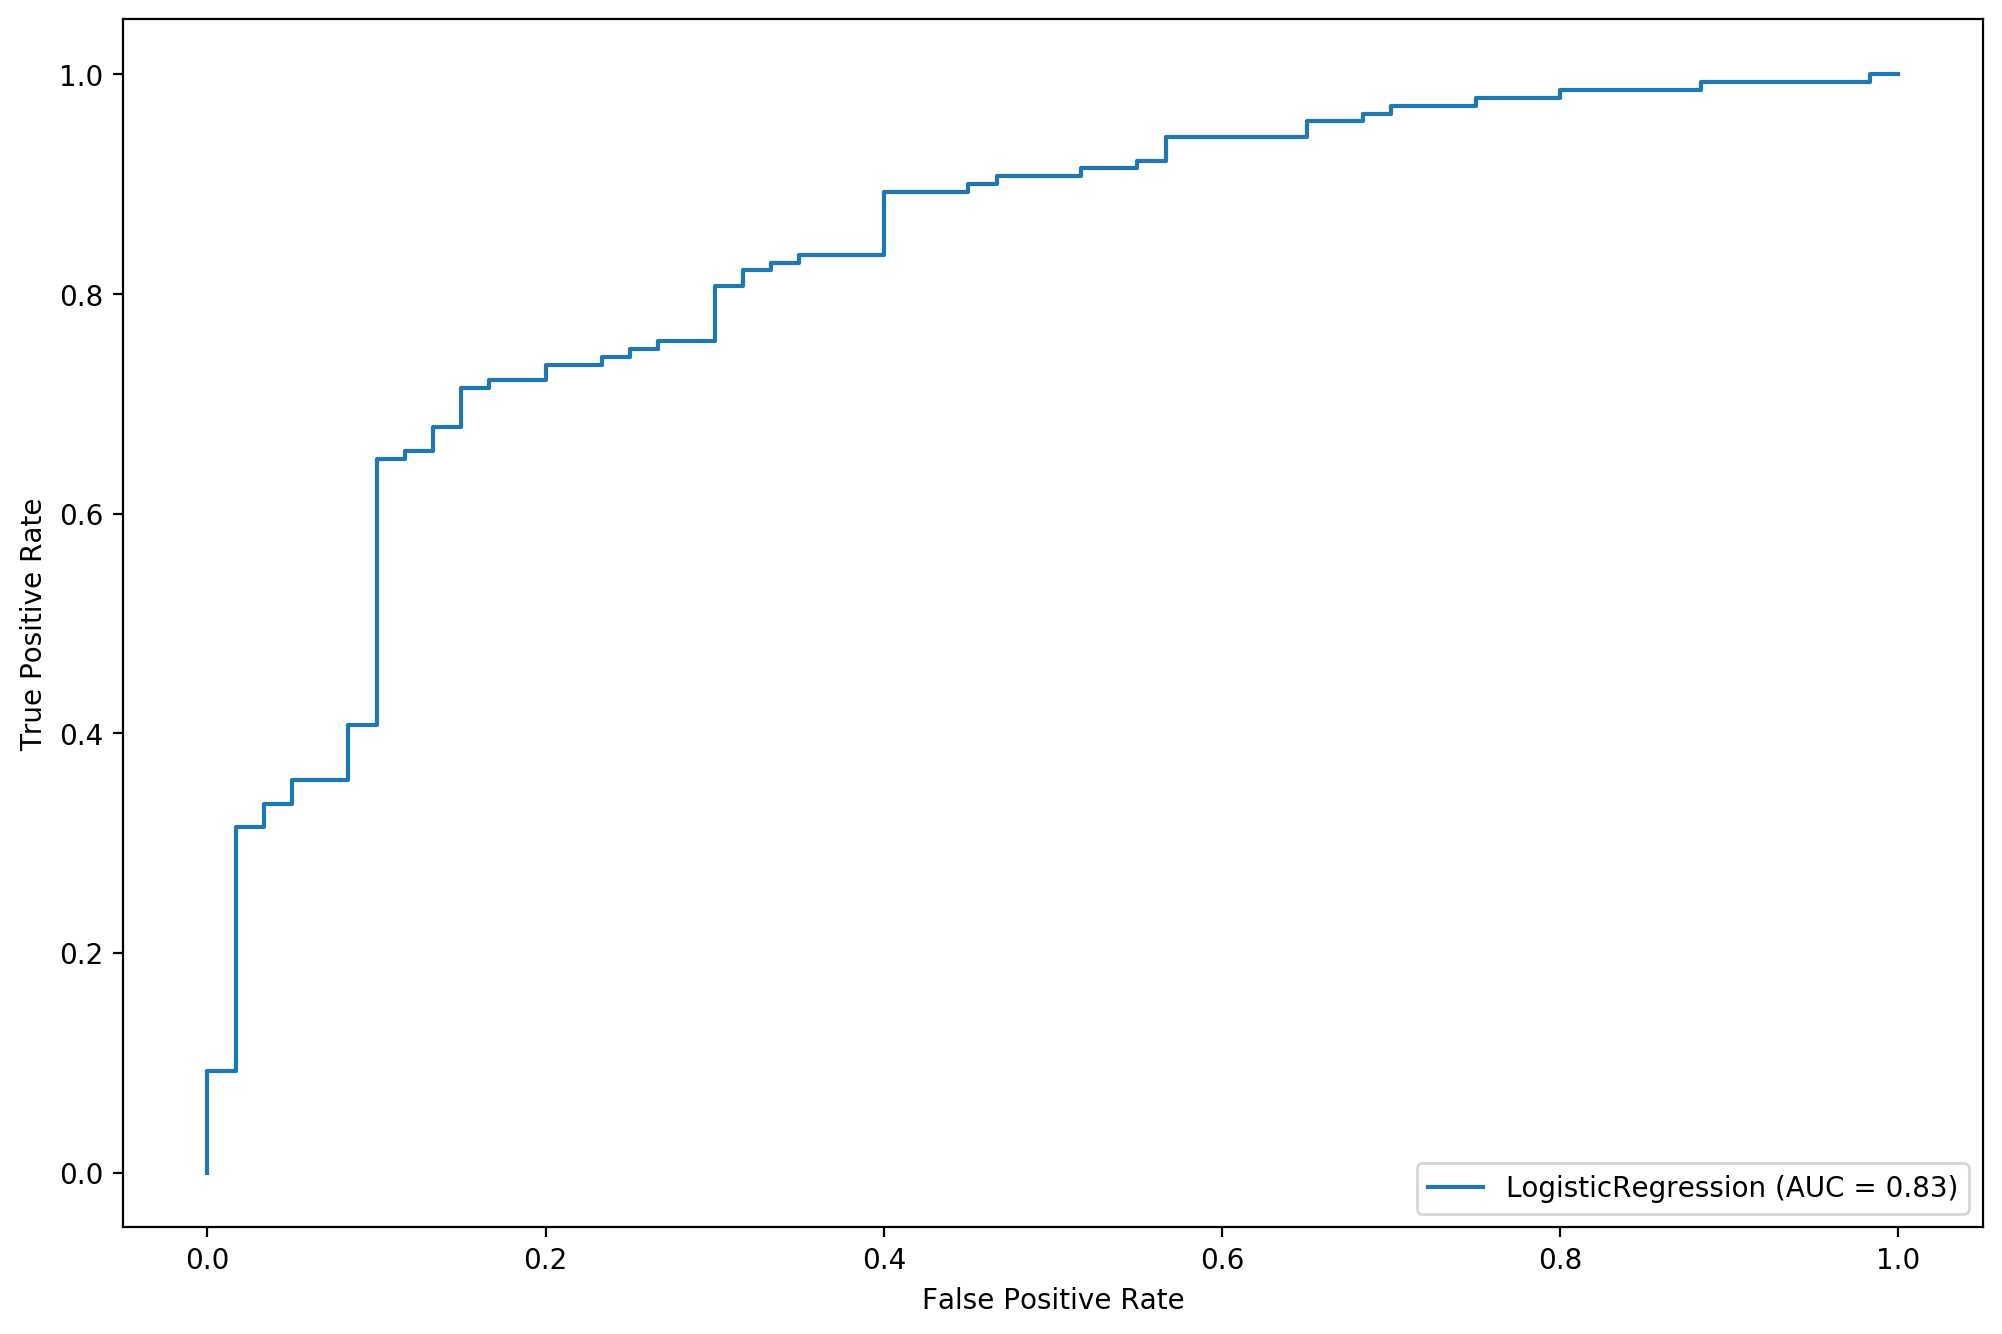

In [418]:
fig,ax = plt.subplots(figsize=(12,8), dpi=200)

plot_roc_curve(clf_grid_logit, scaled_X_test, y_test, ax=ax)

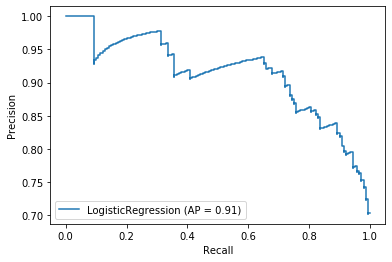

In [419]:
plot_precision_recall_curve(clf_grid_logit, scaled_X_test, y_test)

#### K-NN

In [422]:
kFoldCV = KFold(n_splits=5,shuffle=True,random_state=4)

In [420]:
param_test_knn = {
    'n_neighbors' : [3,5,7,9],
    'weights' : ['uniform','distance'],
    'p' : [1,2],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

In [421]:
knn_grid = KNeighborsClassifier()

In [423]:
grid_model_knn = GridSearchCV(estimator = knn_grid,
                             param_grid = param_test_knn,
                             cv = kFoldCV,
                             scoring= 'accuracy',
                             verbose = 2)

In [424]:
grid_model_knn.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] metric=euclidean, n_neighbors=3, p=1, weights=uniform ...........
[CV]  metric=euclidean, n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, p=1, weights=uniform ...........
[CV]  metric=euclidean, n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, p=1, weights=uniform ...........
[CV]  metric=euclidean, n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, p=1, weights=uniform ...........
[CV]  metric=euclidean, n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, p=1, weights=uniform ...........
[CV]  metric=euclidean, n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, p=1, weights=distance ..........
[CV]  metric=euclidean, n_neighbors=3, p=1, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, p=1, weights=distance .

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  metric=euclidean, n_neighbors=3, p=2, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, p=2, weights=uniform ...........
[CV]  metric=euclidean, n_neighbors=3, p=2, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, p=2, weights=uniform ...........
[CV]  metric=euclidean, n_neighbors=3, p=2, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, p=2, weights=uniform ...........
[CV]  metric=euclidean, n_neighbors=3, p=2, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, p=2, weights=uniform ...........
[CV]  metric=euclidean, n_neighbors=3, p=2, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, p=2, weights=distance ..........
[CV]  metric=euclidean, n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, p=2, weights=distance ..........
[CV]  metric=euclidean, n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, p=2, weig

[CV]  metric=euclidean, n_neighbors=9, p=2, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=9, p=2, weights=uniform ...........
[CV]  metric=euclidean, n_neighbors=9, p=2, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=9, p=2, weights=uniform ...........
[CV]  metric=euclidean, n_neighbors=9, p=2, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=9, p=2, weights=uniform ...........
[CV]  metric=euclidean, n_neighbors=9, p=2, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=9, p=2, weights=distance ..........
[CV]  metric=euclidean, n_neighbors=9, p=2, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=9, p=2, weights=distance ..........
[CV]  metric=euclidean, n_neighbors=9, p=2, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=9, p=2, weights=distance ..........
[CV]  metric=euclidean, n_neighbors=9, p=2, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=9, p=2, wei

[CV]  metric=manhattan, n_neighbors=7, p=2, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=7, p=2, weights=uniform ...........
[CV]  metric=manhattan, n_neighbors=7, p=2, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=7, p=2, weights=distance ..........
[CV]  metric=manhattan, n_neighbors=7, p=2, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=7, p=2, weights=distance ..........
[CV]  metric=manhattan, n_neighbors=7, p=2, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=7, p=2, weights=distance ..........
[CV]  metric=manhattan, n_neighbors=7, p=2, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=7, p=2, weights=distance ..........
[CV]  metric=manhattan, n_neighbors=7, p=2, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=7, p=2, weights=distance ..........
[CV]  metric=manhattan, n_neighbors=7, p=2, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=9, p=1, w

[CV]  metric=minkowski, n_neighbors=5, p=2, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=5, p=2, weights=distance ..........
[CV]  metric=minkowski, n_neighbors=5, p=2, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=7, p=1, weights=uniform ...........
[CV]  metric=minkowski, n_neighbors=7, p=1, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=7, p=1, weights=uniform ...........
[CV]  metric=minkowski, n_neighbors=7, p=1, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=7, p=1, weights=uniform ...........
[CV]  metric=minkowski, n_neighbors=7, p=1, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=7, p=1, weights=uniform ...........
[CV]  metric=minkowski, n_neighbors=7, p=1, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=7, p=1, weights=uniform ...........
[CV]  metric=minkowski, n_neighbors=7, p=1, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=7, p=1, weig

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    3.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=2)

In [425]:
grid_model_knn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='distance')

In [426]:
grid_model_knn.best_params_, grid_model_knn.best_score_

({'metric': 'euclidean', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'},
 0.72)

In [427]:
pd.DataFrame(grid_model_knn.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007892,0.005057,0.012570,0.000796,euclidean,3,1,uniform,"{'metric': 'euclidean', 'n_neighbors': 3, 'p':...",0.65000,0.62500,0.73125,0.71250,0.66875,0.67750,0.039251,46
1,0.005385,0.000487,0.009375,0.000490,euclidean,3,1,distance,"{'metric': 'euclidean', 'n_neighbors': 3, 'p':...",0.65000,0.62500,0.73750,0.71250,0.66875,0.67875,0.041003,43
2,0.005388,0.000497,0.012363,0.000482,euclidean,3,2,uniform,"{'metric': 'euclidean', 'n_neighbors': 3, 'p':...",0.65000,0.62500,0.73125,0.71250,0.66875,0.67750,0.039251,46
3,0.005380,0.000482,0.009165,0.000405,euclidean,3,2,distance,"{'metric': 'euclidean', 'n_neighbors': 3, 'p':...",0.65000,0.62500,0.73750,0.71250,0.66875,0.67875,0.041003,43
4,0.005589,0.000486,0.011767,0.000400,euclidean,5,1,uniform,"{'metric': 'euclidean', 'n_neighbors': 5, 'p':...",0.69375,0.70000,0.73125,0.71250,0.75625,0.71875,0.022707,7
5,0.005388,0.000487,0.008775,0.000398,euclidean,5,1,distance,"{'metric': 'euclidean', 'n_neighbors': 5, 'p':...",0.70000,0.70000,0.73750,0.71250,0.75000,0.72000,0.020310,1
6,0.004986,0.000003,0.011968,0.000002,euclidean,5,2,uniform,"{'metric': 'euclidean', 'n_neighbors': 5, 'p':...",0.69375,0.70000,0.73125,0.71250,0.75625,0.71875,0.022707,7
7,0.004988,0.000004,0.009574,0.000799,euclidean,5,2,distance,"{'metric': 'euclidean', 'n_neighbors': 5, 'p':...",0.70000,0.70000,0.73750,0.71250,0.75000,0.72000,0.020310,1
8,0.005186,0.000401,0.011971,0.000002,euclidean,7,1,uniform,"{'metric': 'euclidean', 'n_neighbors': 7, 'p':...",0.68125,0.73125,0.71875,0.72500,0.73125,0.71750,0.018708,10
9,0.005583,0.000490,0.009175,0.000401,euclidean,7,1,distance,"{'metric': 'euclidean', 'n_neighbors': 7, 'p':...",0.68750,0.73125,0.72500,0.72500,0.73125,0.72000,0.016489,1


In [428]:
y_pred_grid_knn = grid_model_knn.predict(scaled_X_test)

In [429]:
accuracy_score(y_test, y_pred_grid_knn)

0.735

In [432]:
clf_grid_knn = KNeighborsClassifier(
    **grid_model_knn.best_params_
)

In [433]:
clf_grid_knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='distance')

In [434]:
y_pred_grid_knn_final = grid_model_knn.predict(scaled_X_test)

In [435]:
accuracy_score(y_test, y_pred_grid_knn_final)

0.735

In [436]:
print(classification_report(y_test, y_pred_grid_knn_final))

              precision    recall  f1-score   support

           0       0.60      0.35      0.44        60
           1       0.76      0.90      0.83       140

    accuracy                           0.73       200
   macro avg       0.68      0.62      0.63       200
weighted avg       0.71      0.73      0.71       200



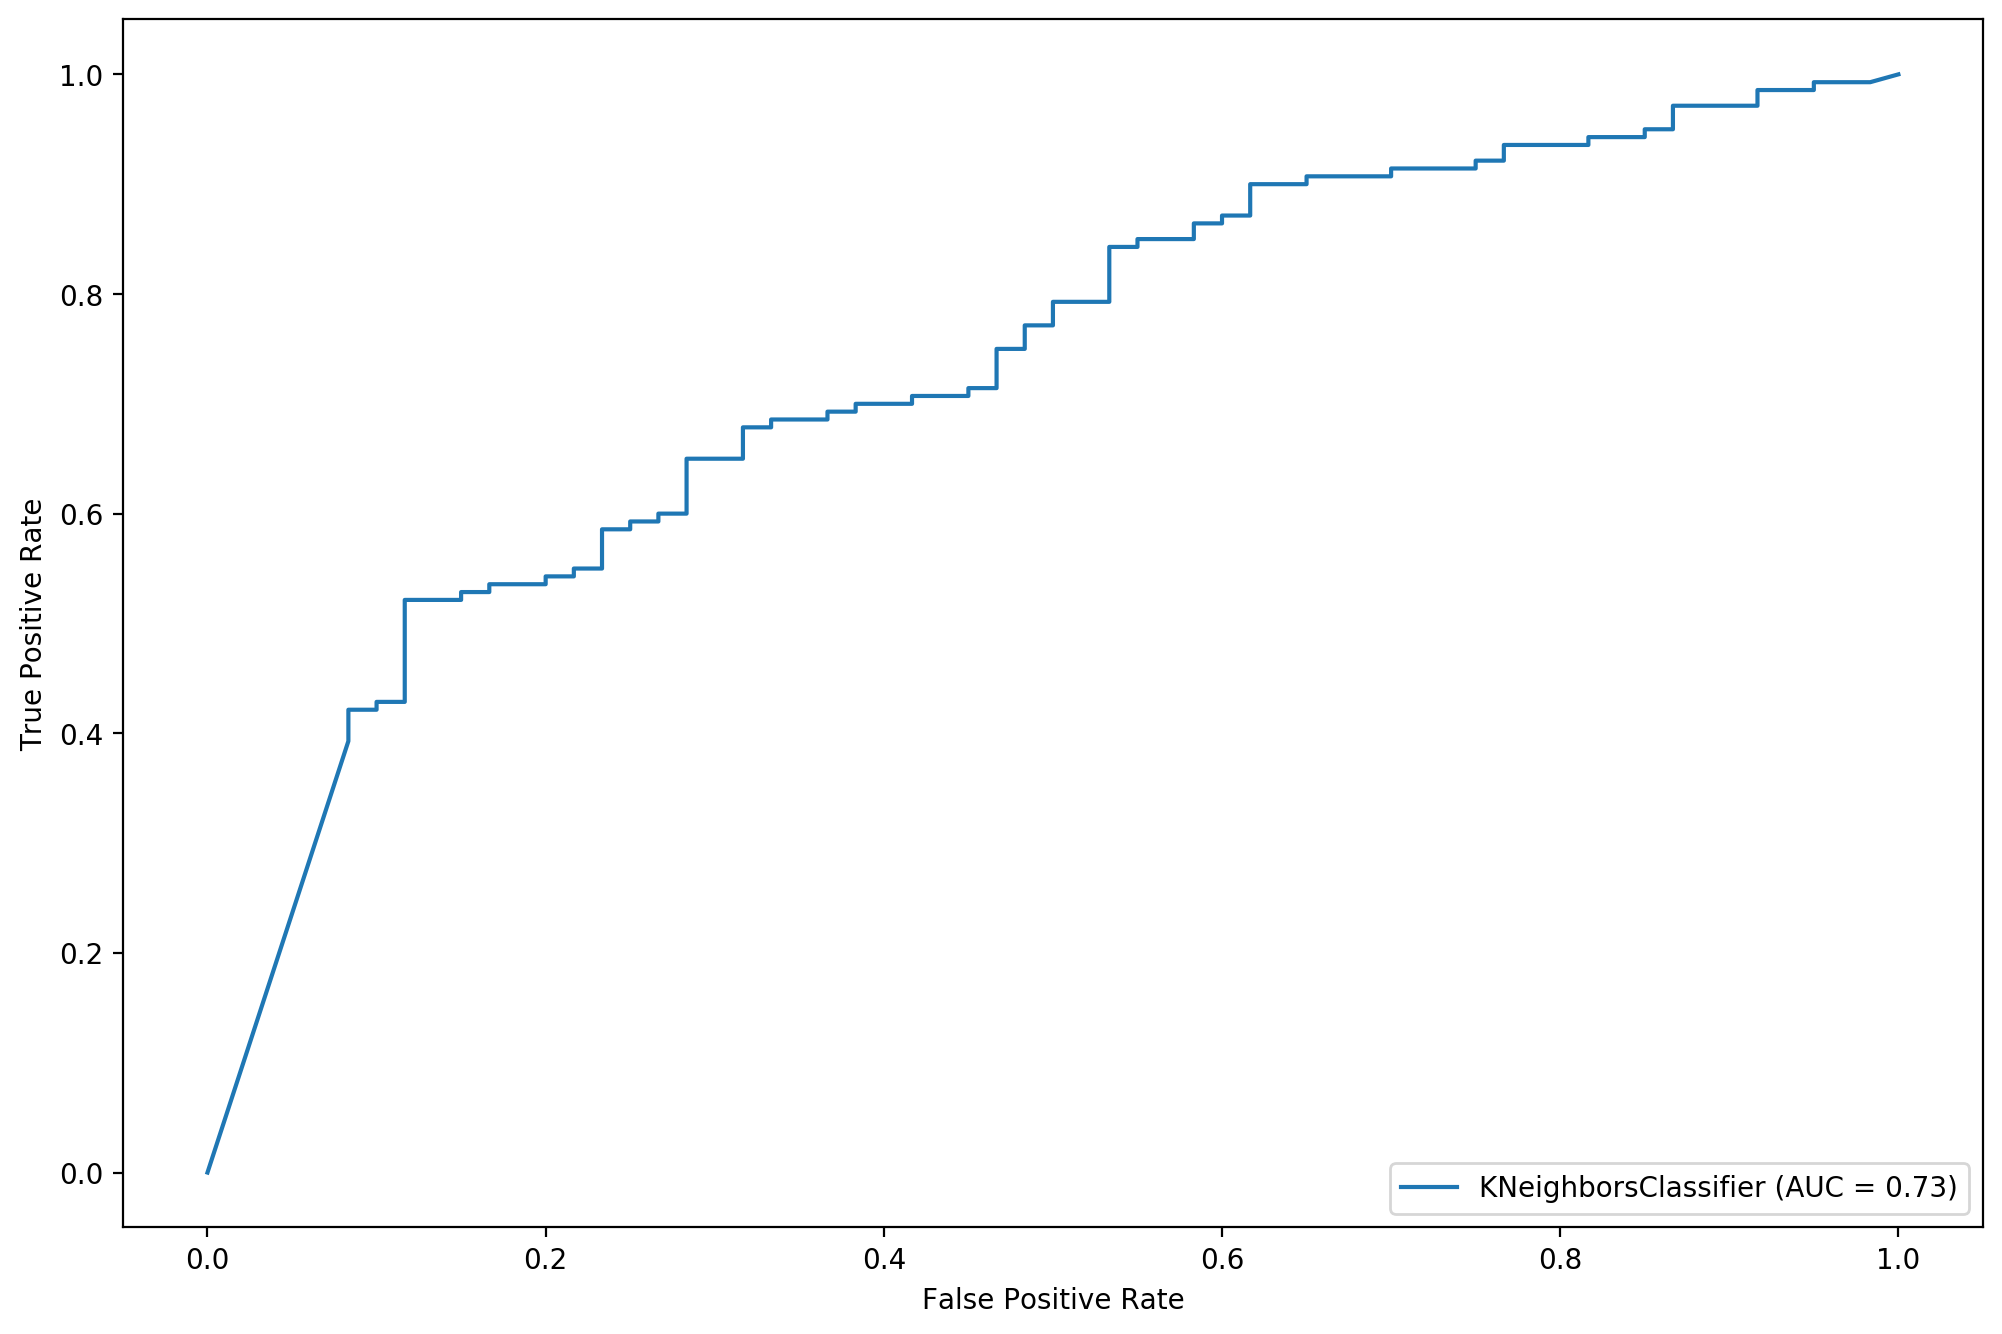

In [437]:
fig,ax = plt.subplots(figsize=(12,8), dpi=200)

plot_roc_curve(clf_grid_knn, scaled_X_test, y_test, ax=ax)

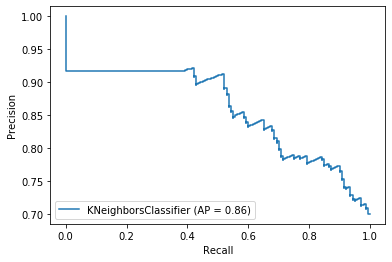

In [438]:
plot_precision_recall_curve(clf_grid_knn, scaled_X_test, y_test)

#### SVC

In [48]:
kFoldCV = KFold(n_splits=5,shuffle=True,random_state=4)

In [49]:
param_test_svc = {
    'kernel' : ['linear','rbf'],
    'C' : [1,10,100,1000],
    'gamma' : [1,0.1,0.001,0.0001]
}

In [50]:
from sklearn.svm import SVC

In [51]:
svc_grid = SVC(probability = True, max_iter = 2000)

In [52]:
grid_model_svc = GridSearchCV(estimator= svc_grid,
                             param_grid= param_test_svc,
                             cv= kFoldCV,
                             scoring= 'accuracy',
                             verbose= 2
                            
                             )

In [53]:
grid_model_svc.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.1s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.1s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.1s
[CV] C=1, gamma=1, kernel=linear .....................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.1s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.2s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.2s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.2s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.2s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=1, gamma=0.1, kernel=linear ...................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=1, gamma=0.001, kernel=linear .................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=1, gamma=0.001, kernel=linear .................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=linear ................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=linear ................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.2s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.2s
[CV] C=10, gamma=1, kernel=rbf .......................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.2s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.2s
[CV] C=10, gamma=1, kernel=rbf .......................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=10, gamma=0.1, kernel=linear ..................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=10, gamma=0.1, kernel=linear ..................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=10, gamma=0.001, kernel=linear ................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=linear ...............................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=linear ...............................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] .................... C=100, gamma=1, kernel=linear, total=   0.1s
[CV] C=100, gamma=1, kernel=linear ...................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... C=100, gamma=1, kernel=linear, total=   0.1s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] .................... C=100, gamma=1, kernel=linear, total=   0.1s
[CV] C=100, gamma=1, kernel=linear ...................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... C=100, gamma=1, kernel=linear, total=   0.1s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] .................... C=100, gamma=1, kernel=linear, total=   0.1s
[CV] C=100, gamma=1, kernel=rbf ......................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=1, kernel=rbf ......................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=1, kernel=rbf ......................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.1, kernel=linear .................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.1, kernel=linear .................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.001, kernel=linear ...............................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=linear ..............................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=linear ..............................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=1, kernel=linear ..................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=1, kernel=linear ..................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.2s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=linear ................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=linear ................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .

E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ............... C=1000, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] ............... C=1000, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=linear ..............................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ............... C=1000, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] ............... C=1000, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=linear .............................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=linear .............................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   22.0s finished


[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.1s


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=2000,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=2)

In [54]:
grid_model_svc.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=2000, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
grid_model_svc.best_params_, grid_model_svc.best_score_

({'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}, 0.7625)

In [56]:
pd.DataFrame(grid_model_svc.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.121282,0.001027,0.004581,4.828871e-04,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.66875,0.65000,0.68125,0.62500,0.65625,0.65625,0.018957,17
1,0.164034,0.001338,0.006981,5.560829e-07,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.69375,0.70000,0.73125,0.68750,0.70000,0.70250,0.015104,6
2,0.122084,0.000794,0.004180,3.876331e-04,1,0.1,linear,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}",0.66875,0.65000,0.68125,0.62500,0.65625,0.65625,0.018957,17
3,0.162440,0.001054,0.006982,1.642149e-06,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.69375,0.70000,0.73125,0.68750,0.70000,0.70250,0.015104,6
4,0.122051,0.001538,0.004376,4.851440e-04,1,0.001,linear,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}",0.66875,0.65000,0.68125,0.62500,0.65625,0.65625,0.018957,17
5,0.105122,0.000879,0.004786,3.986538e-04,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.68750,0.70000,0.72500,0.68750,0.70000,0.70000,0.013693,15
6,0.122674,0.001414,0.004602,4.938621e-04,1,0.0001,linear,"{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}",0.66875,0.65000,0.68125,0.62500,0.65625,0.65625,0.018957,17
7,0.104615,0.001206,0.004987,4.862804e-07,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.68750,0.70000,0.72500,0.68750,0.70000,0.70000,0.013693,15
8,0.123974,0.001159,0.004987,1.395105e-06,10,1,linear,"{'C': 10, 'gamma': 1, 'kernel': 'linear'}",0.53750,0.55000,0.68125,0.65000,0.64375,0.61250,0.057690,21
9,0.169943,0.001797,0.006977,2.379862e-05,10,1,rbf,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}",0.69375,0.70000,0.73125,0.68750,0.70000,0.70250,0.015104,6
